In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import rpy2.robjects as robjects

In [2]:
pd.set_option('display.precision', 1)
data = pd.read_csv("data/combined_data.csv")

In [3]:
data.head()

Unnamed: 0  household_size  empl_agriculture  empl_professional  \
0           0             2.6               1.1               11.2   
1           1             3.1              14.8                7.4   
2           2             3.3              16.0               10.1   
3           3             2.4               1.3               16.4   
4           4             2.6               1.1                9.4   

   empl_social  empl_services  empl_manufacturing  empl_retail  employed  \
0         19.4            8.3                22.2         10.2     53742   
1         21.6            8.9                 7.1          9.3     52644   
2         19.7           10.9                 6.5          9.0    190707   
3         20.7           11.5                 3.5         10.6     44505   
4         25.5           11.5                 4.4         12.9     69649   

   prc_fam_poverty  ...  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20 4/16/20  \
0              9.9  ...        0        0        0      0.0        0       0   
1             15.6  ...        0        1        1      1.0        1       1   
2             10.5  ...        3        3        3      3.0        3       3   
3              5.1  ...        1        1        1      1.0        1       1   
4              9.5  ...        3        3        3      3.0        3       3   

  cases_march1  cases_march15  cases_april1  ten plus cases  
0            0              0            19         3/28/20  
1            0              0             4         4/12/20  
2            0              0            42         3/21/20  
3            0              0            26         3/28/20  
4            0              1             7          4/3/20  

[5 rows x 113 columns]

In [4]:
data[(data["county"] == "New York County") | (data["county"] == "Alameda County")].iloc[:,[1,2,3,4,5,6,7, 9,10, 11, 12, 13, 14, 15, 95, 105, 106, 107, 108]]

household_size  empl_agriculture  empl_professional  empl_social  \
336             2.8           5.0e-01               20.4         21.8   
822             2.6           8.6e-02               14.1         26.9   

     empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
336            8.2                 9.7          8.6              5.1   
822           10.7                 3.0          8.9             14.2   

     avg_income  prc_public_transp  population  pop_65_plus  health_ins  \
336     48595.0               15.7     1666753         13.8        99.5   
822     39588.7               55.9     8398748         14.8        99.2   

              county  4/3/20  4/13/20  4/14/20  4/15/20  4/16/20  
336   Alameda County      12       23     23.0       36       39  
822  New York County    2243     7349   7905.0     8455    11477

In [5]:
data.columns.values

array(['Unnamed: 0', 'household_size', 'empl_agriculture',
       'empl_professional', 'empl_social', 'empl_services',
       'empl_manufacturing', 'empl_retail', 'employed', 'prc_fam_poverty',
       'avg_income', 'prc_public_transp', 'population', 'pop_65_plus',
       'health_ins', 'county', 'state', 'FIPS', 'area', 'prc_obese',
       'domestic_passengers', 'intl_passengers', 'order started',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12

### transform the data

+ convert "ten plus cases" into days since 10+ cases detected
+ convert "order started" into days since order started
+ add population density

In [6]:
last_date = ""
date_re = re.compile("\d+/\d+/\d\d")
for label in data.columns.values:
    match = date_re.match(label)
    if match:
        last_date = label
last_date    

'4/16/20'

In [7]:
days_elapsed = list()

for x in range(data.shape[0]):
    # use days elapsed between the day ten+ cases confirmed and the last date of the deaths data
    dt = datetime.datetime.strptime(data.iloc[x]["ten plus cases"], "%m/%d/%y")
    last_day = datetime.datetime.strptime(last_date, "%m/%d/%y")
    days_elapsed.append((last_day.date()- dt.date()).days)

In [8]:
data["days since 10+"] = days_elapsed

In [9]:
data["days since 10+"].describe()

count    823.0
mean      20.7
std        7.9
min        0.0
25%       16.0
50%       21.0
75%       26.0
max       45.0
Name: days since 10+, dtype: float64

In [10]:
data = data.drop(["Unnamed: 0", "ten plus cases"], axis=1)

In [11]:
data.head()

household_size  empl_agriculture  empl_professional  empl_social  \
0             2.6               1.1               11.2         19.4   
1             3.1              14.8                7.4         21.6   
2             3.3              16.0               10.1         19.7   
3             2.4               1.3               16.4         20.7   
4             2.6               1.1                9.4         25.5   

   empl_services  empl_manufacturing  empl_retail  employed  prc_fam_poverty  \
0            8.3                22.2         10.2     53742              9.9   
1            8.9                 7.1          9.3     52644             15.6   
2           10.9                 6.5          9.0    190707             10.5   
3           11.5                 3.5         10.6     44505              5.1   
4           11.5                 4.4         12.9     69649              9.5   

   avg_income  ...  4/11/20  4/12/20  4/13/20  4/14/20 4/15/20 4/16/20  \
0     27742.0  ...        0        0        0      0.0       0       0   
1     22628.0  ...        0        1        1      1.0       1       1   
2     30674.0  ...        3        3        3      3.0       3       3   
3     37645.0  ...        1        1        1      1.0       1       1   
4     28144.0  ...        3        3        3      3.0       3       3   

   cases_march1  cases_march15  cases_april1  days since 10+  
0             0              0            19              19  
1             0              0             4               4  
2             0              0            42              26  
3             0              0            26              19  
4             0              1             7              13  

[5 rows x 112 columns]

In [12]:
days_elapsed = list()

for x in range(data.shape[0]):
    order = data.iloc[x]["order started"]
    if type(order) == str:
        dt = datetime.datetime.strptime(order, "%m/%d/%y")
        days_elapsed.append((datetime.date.today() - dt.date()).days)
    else:
        days_elapsed.append(0)

In [13]:
data["days since order"] = days_elapsed

In [14]:
data.describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           823.0             823.0              823.0        823.0   
mean              2.6               1.9               10.1         23.9   
std               0.2               2.7                3.6          4.8   
min               1.9               0.0                0.0          0.0   
25%               2.4               0.5                7.7         20.9   
50%               2.5               1.0                9.6         23.2   
75%               2.7               2.3               11.9         26.4   
max               4.1              25.7               30.1         46.2   

       empl_services  empl_manufacturing  empl_retail  employed  \
count          823.0               823.0        823.0   8.2e+02   
mean             9.7                11.1         11.5   1.6e+05   
std              2.8                 5.8          2.0   3.2e+05   
min              0.0                 0.0          0.0   1.8e+04   
25%              8.0                 6.8         10.3   4.4e+04   
50%              9.3                10.1         11.4   7.5e+04   
75%             10.9                14.3         12.6   1.6e+05   
max             32.0                43.9         21.3   5.0e+06   

       prc_fam_poverty  avg_income  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
count            823.0       823.0  ...    823.0    823.0    823.0    823.0   
mean               9.0     31988.1  ...     25.3     27.0     29.6     32.6   
std                4.2      7742.2  ...    247.8    264.1    284.5    304.7   
min                1.3     14605.0  ...      0.0      0.0      0.0      0.0   
25%                5.9     26839.5  ...      0.0      0.0      1.0      1.0   
50%                8.4     30605.0  ...      2.0      2.0      3.0      3.0   
75%               11.4     35698.0  ...      9.0      9.0     10.0     11.0   
max               29.4     71606.0  ...   6898.0   7349.0   7905.0   8455.0   

       4/16/20  cases_march1  cases_march15  cases_april1  days since 10+  \
count    823.0       8.2e+02          823.0         823.0           823.0   
mean      38.1       3.4e-02            3.4         239.9            20.7   
std      408.4       3.8e-01           19.6        1789.2             7.9   
min        0.0       0.0e+00            0.0           0.0             0.0   
25%        1.0       0.0e+00            0.0          12.0            16.0   
50%        3.0       0.0e+00            0.0          32.0            21.0   
75%       13.0       0.0e+00            2.0         101.5            26.0   
max    11477.0       9.0e+00          387.0       47439.0            45.0   

       days since order  
count             823.0  
mean               22.9  
std                 7.6  
min                 0.0  
25%                19.0  
50%                22.0  
75%                29.0  
max                35.0  

[8 rows x 110 columns]

In [15]:
data = data.drop(["order started"], axis=1)

In [16]:
data["pop density"] = data["population"] / data["area"]

In [17]:
data.describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           823.0             823.0              823.0        823.0   
mean              2.6               1.9               10.1         23.9   
std               0.2               2.7                3.6          4.8   
min               1.9               0.0                0.0          0.0   
25%               2.4               0.5                7.7         20.9   
50%               2.5               1.0                9.6         23.2   
75%               2.7               2.3               11.9         26.4   
max               4.1              25.7               30.1         46.2   

       empl_services  empl_manufacturing  empl_retail  employed  \
count          823.0               823.0        823.0   8.2e+02   
mean             9.7                11.1         11.5   1.6e+05   
std              2.8                 5.8          2.0   3.2e+05   
min              0.0                 0.0          0.0   1.8e+04   
25%              8.0                 6.8         10.3   4.4e+04   
50%              9.3                10.1         11.4   7.5e+04   
75%             10.9                14.3         12.6   1.6e+05   
max             32.0                43.9         21.3   5.0e+06   

       prc_fam_poverty  avg_income  ...  4/13/20  4/14/20  4/15/20  4/16/20  \
count            823.0       823.0  ...    823.0    823.0    823.0    823.0   
mean               9.0     31988.1  ...     27.0     29.6     32.6     38.1   
std                4.2      7742.2  ...    264.1    284.5    304.7    408.4   
min                1.3     14605.0  ...      0.0      0.0      0.0      0.0   
25%                5.9     26839.5  ...      0.0      1.0      1.0      1.0   
50%                8.4     30605.0  ...      2.0      3.0      3.0      3.0   
75%               11.4     35698.0  ...      9.0     10.0     11.0     13.0   
max               29.4     71606.0  ...   7349.0   7905.0   8455.0  11477.0   

       cases_march1  cases_march15  cases_april1  days since 10+  \
count       8.2e+02          823.0         823.0           823.0   
mean        3.4e-02            3.4         239.9            20.7   
std         3.8e-01           19.6        1789.2             7.9   
min         0.0e+00            0.0           0.0             0.0   
25%         0.0e+00            0.0          12.0            16.0   
50%         0.0e+00            0.0          32.0            21.0   
75%         0.0e+00            2.0         101.5            26.0   
max         9.0e+00          387.0       47439.0            45.0   

       days since order  pop density  
count             823.0        823.0  
mean               22.9        680.4  
std                 7.6       1702.4  
min                 0.0          4.4  
25%                19.0        140.2  
50%                22.0        271.5  
75%                29.0        557.8  
max                35.0      27750.7  

[8 rows x 111 columns]

### Examine Data

In [18]:
data.loc[data["days since 10+"] > 40, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "prc_obese", 
                                       "days since 10+", "days since order"]]

county  4/16/20  household_size  pop density  \
113  Santa Clara County       69             3.0       1501.9   
217         King County      312             2.5       1055.6   
235  Los Angeles County      457             3.0       2490.3   
686  Westchester County      668             2.7       2247.6   
817    Snohomish County       86             2.7        390.4   
822     New York County    11477             2.6      27750.7   

     prc_fam_poverty  avg_income  prc_public_transp  population  pop_65_plus  \
113              4.1     58588.0                4.1     1937570         13.5   
217              5.5     52804.0               14.6     2233163         13.2   
235             10.5     34115.0                5.7    10105518         13.6   
686              5.3     56893.0               22.8      967612         17.1   
817              5.2     39500.0                5.9      814901         13.5   
822             14.2     39588.7               55.9     8398748         14.8   

     health_ins    area  domestic_passengers  intl_passengers  prc_obese  \
113        99.5  1290.1             33736000          7714000       19.2   
217        99.4  2115.6             21381000          2595600       21.9   
235        99.3  4057.9             42057000         12570600       21.4   
686        98.7   430.5             28929000         17743200       20.3   
817        98.8  2087.3                    0                0       28.6   
822        99.2   302.6             44647000         24424000       22.5   

     days since 10+  days since order  
113              44                35  
217              45                29  
235              42                33  
686              43                30  
817              42                29  
822              41                30

In [19]:
data.loc[data["4/16/20"] > 700, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "prc_obese", 
                                       "days since 10+", "days since order"]]

county  4/16/20  household_size  pop density  prc_fam_poverty  \
286    Nassau County     1109             3.0       4770.8              4.1   
356      Cook County      722             2.6       5480.1             10.2   
572     Wayne County      884             2.5       2865.5             16.6   
822  New York County    11477             2.6      27750.7             14.2   

     avg_income  prc_public_transp  population  pop_65_plus  health_ins  \
286     50397.0               17.3     1358343         17.8        99.3   
356     37538.0               19.1     5180493         14.6        99.1   
572     26988.0                2.5     1753893         15.4        99.3   
822     39588.7               55.9     8398748         14.8        99.2   

      area  domestic_passengers  intl_passengers  prc_obese  days since 10+  \
286  284.7             28745000         17574400       23.0              38   
356  945.3             43405000          7100700       27.7              37   
572  612.1             15550999          1861100       34.4              31   
822  302.6             44647000         24424000       22.5              41   

     days since order  
286                30  
356                31  
572                28  
822                30

In [20]:
data.loc[data["4/16/20"] < 200, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "prc_obese",
                                       "days since 10+", "days since order"]]

county  4/16/20  household_size  pop density  prc_fam_poverty  \
0       Morgan County        0             2.6        205.6              9.9   
1        Kings County        1             3.1        108.9             15.6   
2     Monterey County        3             3.3        132.8             10.5   
3       Nevada County        1             2.4        104.1              5.1   
4       Shasta County        3             2.6         47.7              9.5   
..                ...      ...             ...          ...              ...   
817  Snohomish County       86             2.7        390.4              5.2   
818  Jefferson County        0             2.5        153.0              6.4   
819  Milwaukee County      114             2.4       3927.9             14.1   
820  Outagamie County        2             2.5        293.9              5.4   
821     Racine County        6             2.5        591.2              8.5   

     avg_income  prc_public_transp  population  pop_65_plus  health_ins  \
0       27742.0                0.4      119089         17.2        98.8   
1       22628.0                0.5      151366         10.2        90.1   
2       30674.0                1.3      435594         13.7        96.3   
3       37645.0                0.1       99696         27.8        98.8   
4       28144.0                0.8      180040         20.6        99.2   
..          ...                ...         ...          ...         ...   
817     39500.0                5.9      814901         13.5        98.8   
818     33545.0                0.1       85129         17.2        99.3   
819     28641.0                4.2      948201         13.6        99.0   
820     32489.0                0.5      187365         14.7        99.3   
821     29897.0                1.6      196584         16.5        97.4   

       area  domestic_passengers  intl_passengers  prc_obese  days since 10+  \
0     579.3               580000                0       32.1              19   
1    1389.4                    0                0       29.4               4   
2    3280.6               186000                0       27.6              26   
3     957.8                    0                0       21.5              19   
4    3775.4                    0                0       23.3              13   
..      ...                  ...              ...        ...             ...   
817  2087.3                    0                0       28.6              42   
818   556.5              1034000                0       29.5              17   
819   241.4              3421000                0       32.0              31   
820   637.5               654000                0       33.1              16   
821   332.5              3421000                0       36.1              19   

     days since order  
0                  17  
1                  33  
2                  33  
3                  33  
4                  33  
..                ...  
817                29  
818                27  
819                27  
820                27  
821                27  

[797 rows x 16 columns]

In [21]:
%load_ext rpy2.ipython

/home/anna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:63: UserWarning: Error while trying to convert the column "county". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))
/home/anna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:63: UserWarning: Error while trying to convert the column "state". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))
R[write to console]: corrplot 0.84 loaded



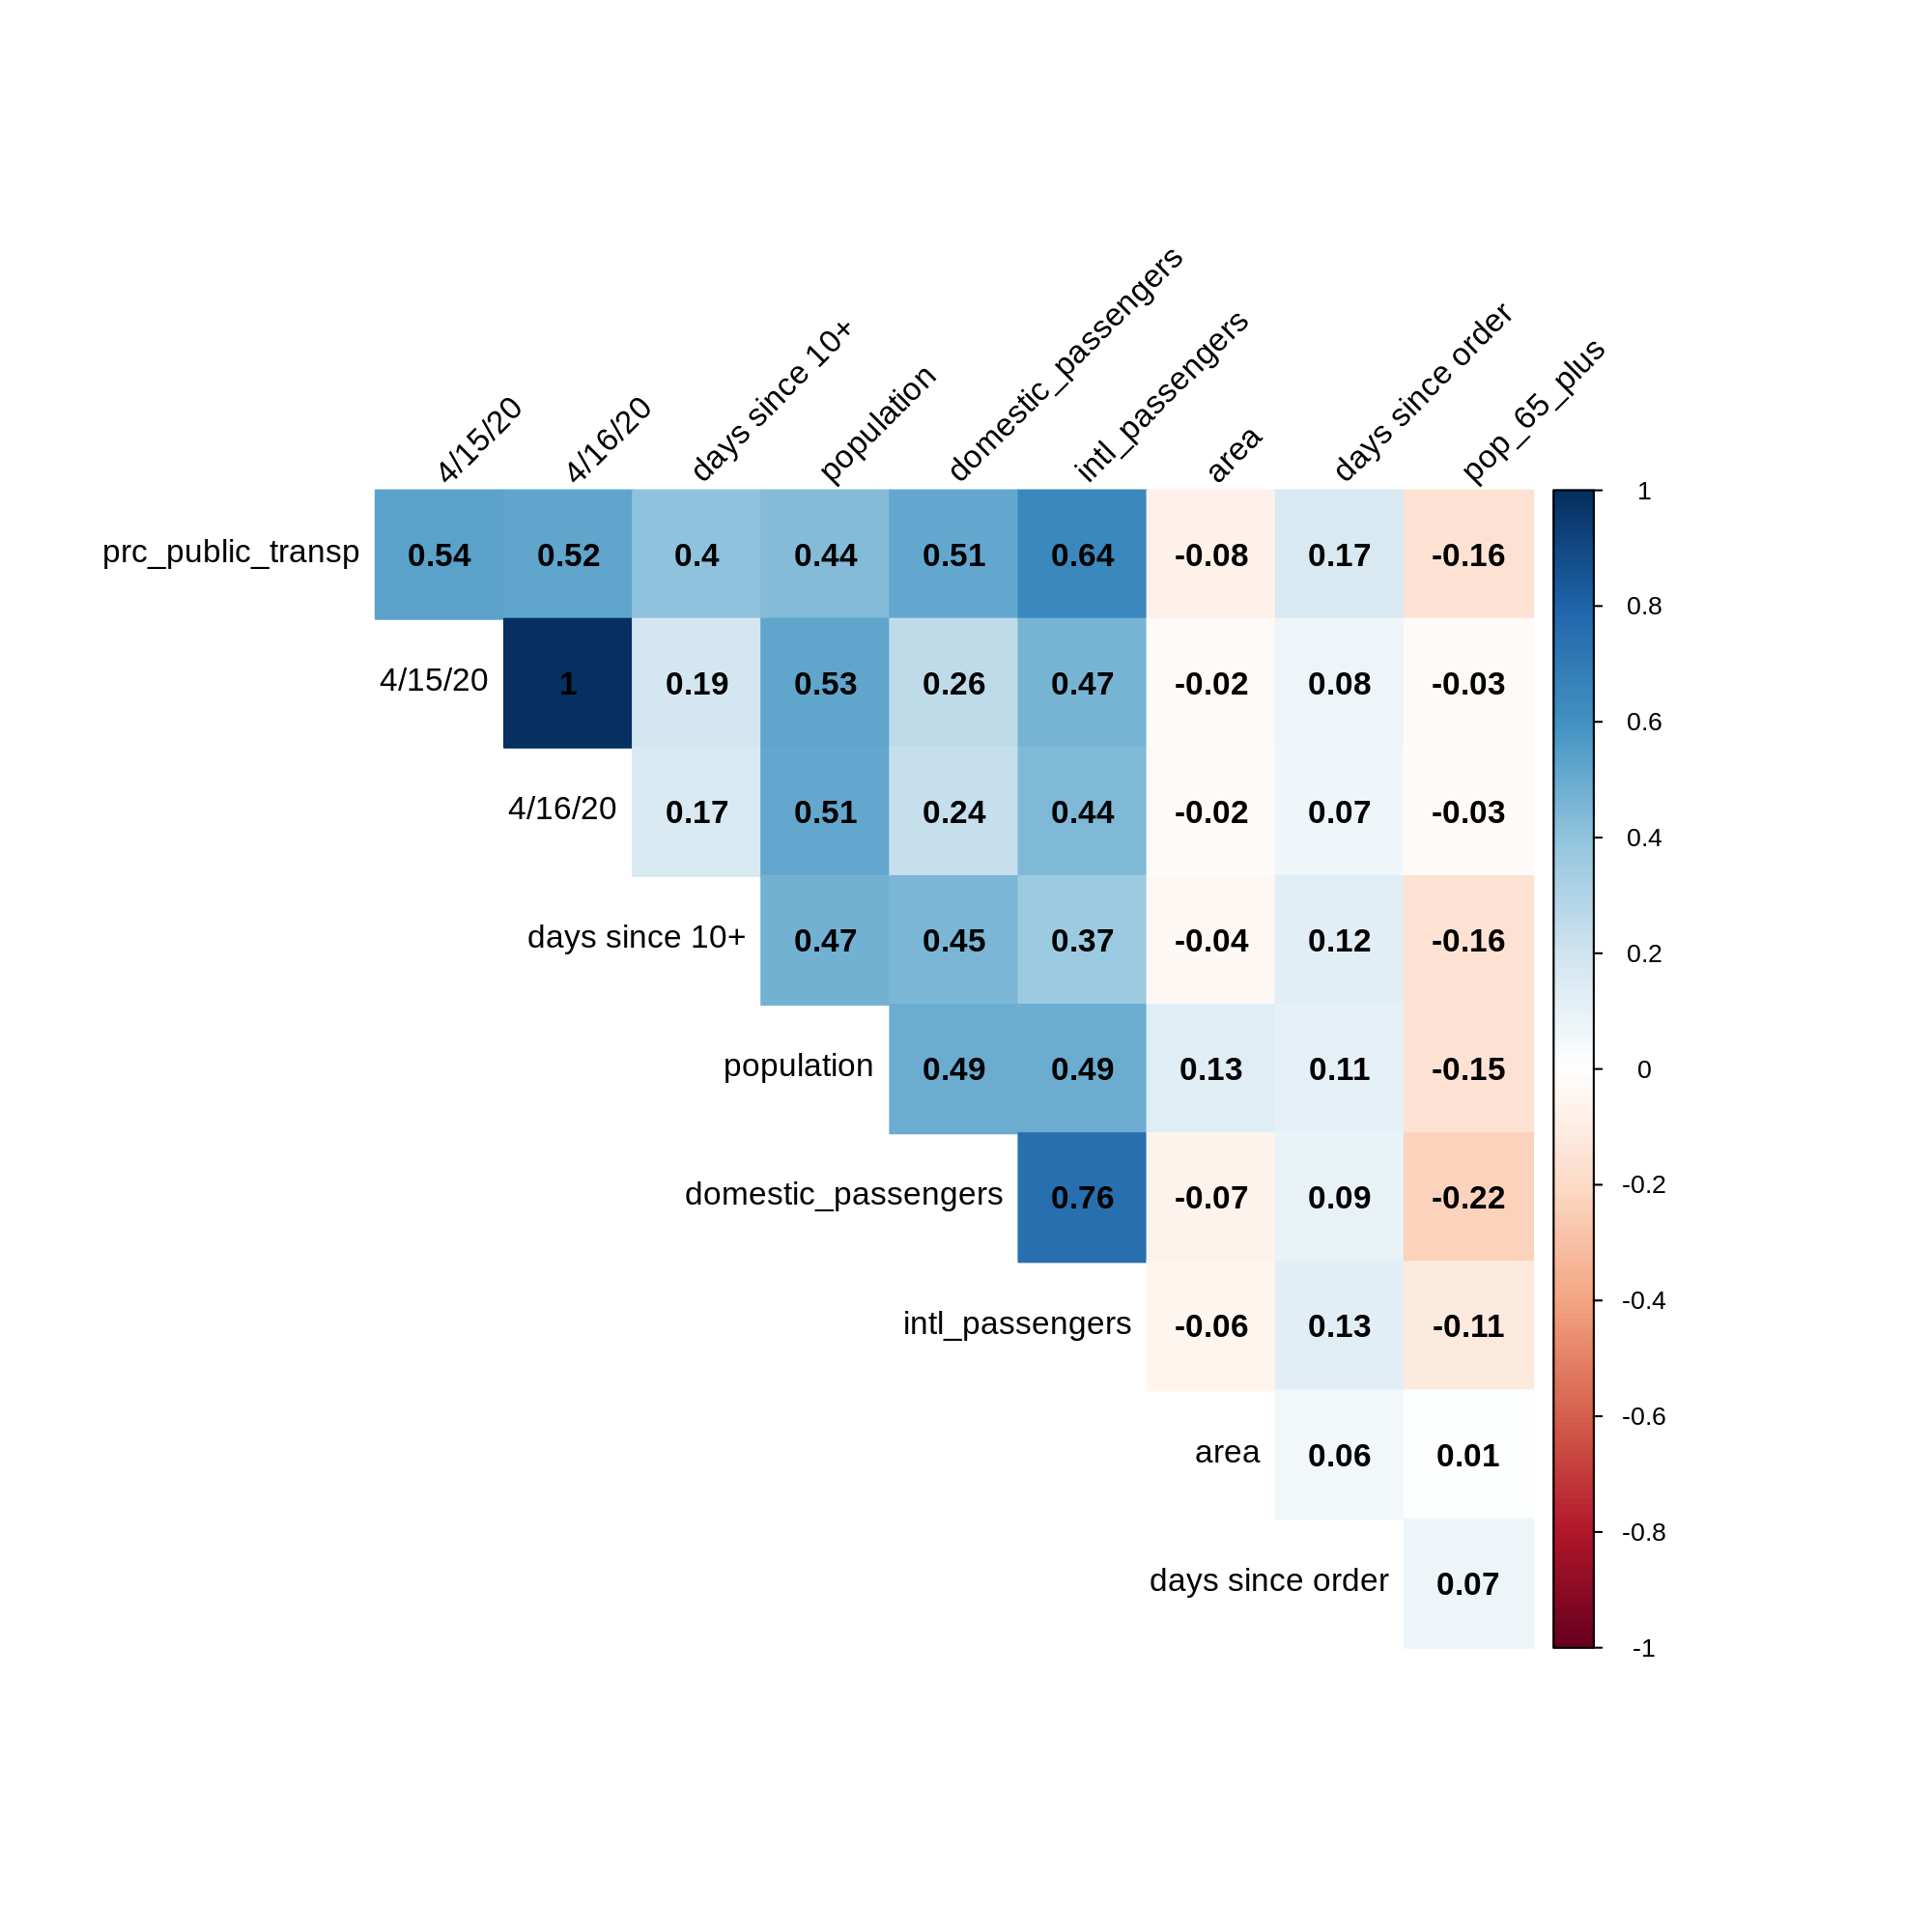

In [22]:
%%R -i data -w 10 -h 10 --units in -r 200

library(corrplot)
corr = cor(data[c("days since 10+", "days since order", "population", "pop_65_plus", "domestic_passengers", "intl_passengers", "prc_public_transp", "4/15/20", "4/16/20", "area")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

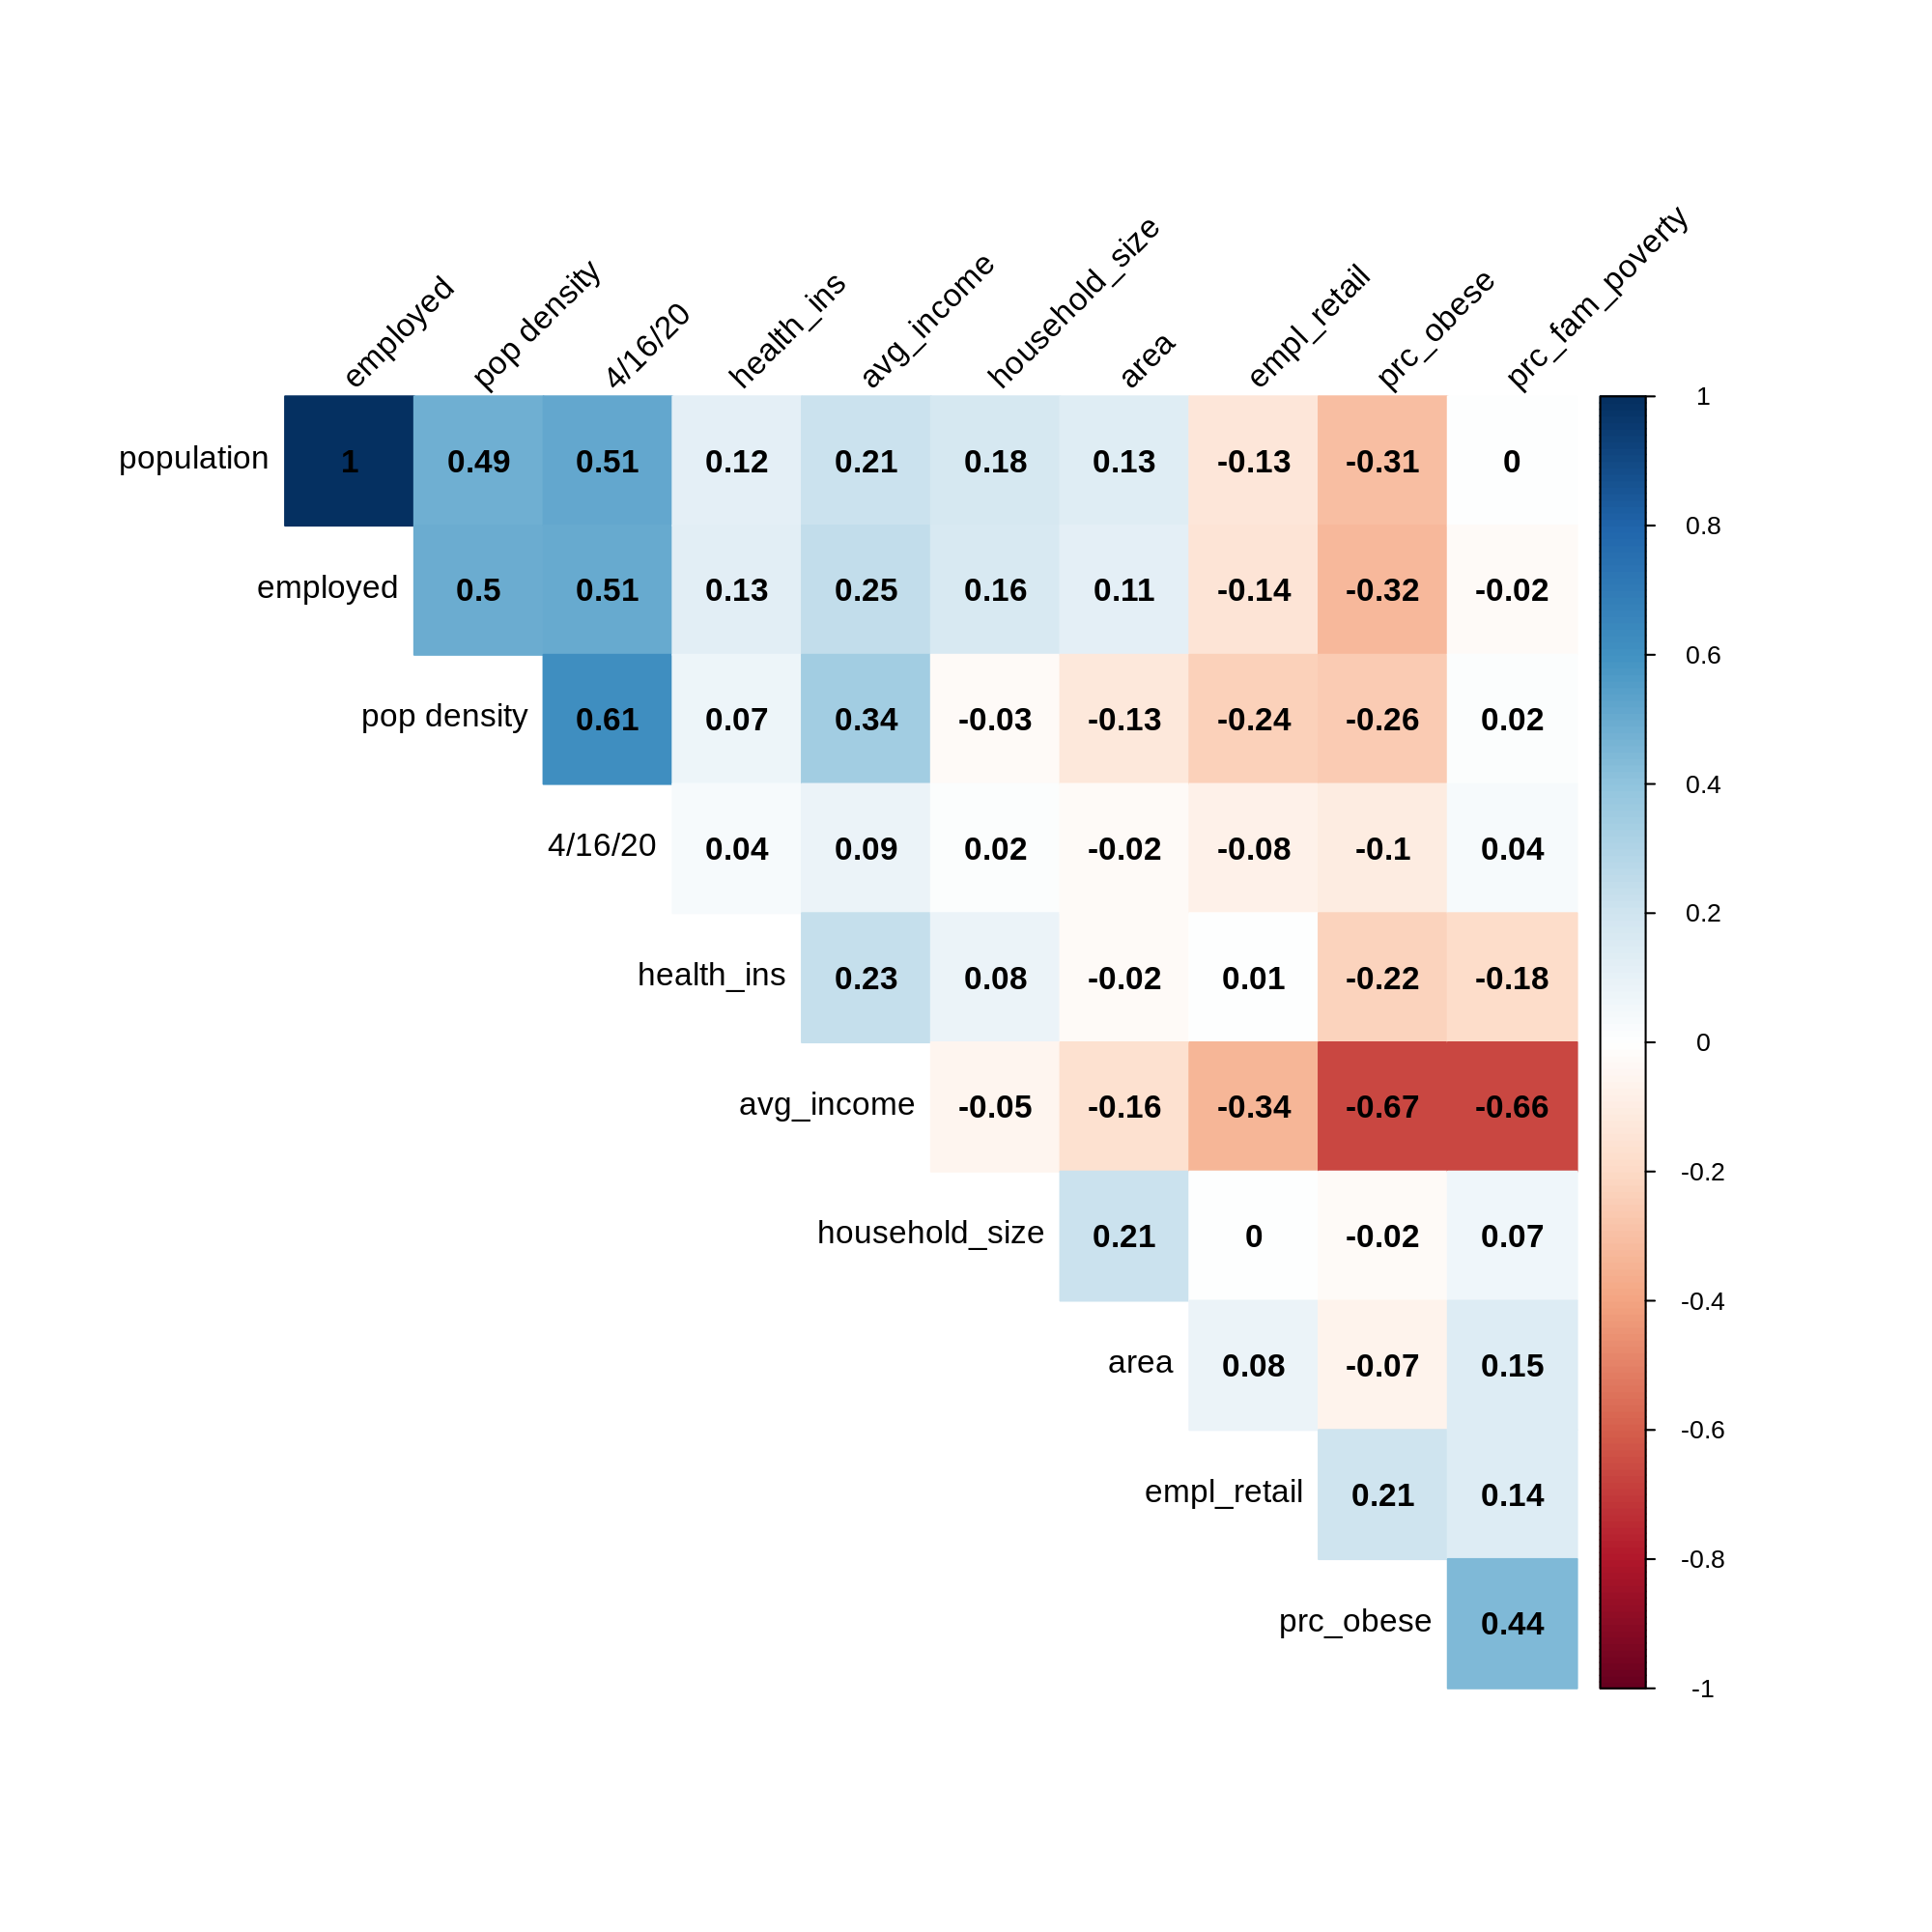

In [23]:
%%R -w 10 -h 10 --units in -r 200

corr = cor(data[c('household_size', "pop density", "area", "population", "health_ins",
       'empl_retail', 'employed', 'prc_obese', 'prc_fam_poverty', 'avg_income', "4/16/20")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", 
         tl.col="black", tl.srt=45, 
         diag=FALSE 
         )

# populations denisty correlates very much (positively) with # deaths

In [24]:
%%R

library(ggplot2)

In [25]:
data.columns.values

array(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing',
       'empl_retail', 'employed', 'prc_fam_poverty', 'avg_income',
       'prc_public_transp', 'population', 'pop_65_plus', 'health_ins',
       'county', 'state', 'FIPS', 'area', 'prc_obese',
       'domestic_passengers', 'intl_passengers', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20',
       '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20',
       '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20',
       '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20',
       '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/

In [26]:
abbrev = data.drop(['1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15/20', "employed", "FIPS"], axis=1)

In [27]:
print(data.shape)
print(abbrev.shape)

(823, 113)
(823, 26)


In [28]:
abbrev.head()

household_size  empl_agriculture  empl_professional  empl_social  \
0             2.6               1.1               11.2         19.4   
1             3.1              14.8                7.4         21.6   
2             3.3              16.0               10.1         19.7   
3             2.4               1.3               16.4         20.7   
4             2.6               1.1                9.4         25.5   

   empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
0            8.3                22.2         10.2              9.9   
1            8.9                 7.1          9.3             15.6   
2           10.9                 6.5          9.0             10.5   
3           11.5                 3.5         10.6              5.1   
4           11.5                 4.4         12.9              9.5   

   avg_income  prc_public_transp  ...  prc_obese  domestic_passengers  \
0     27742.0                0.4  ...       32.1               580000   
1     22628.0                0.5  ...       29.4                    0   
2     30674.0                1.3  ...       27.6               186000   
3     37645.0                0.1  ...       21.5                    0   
4     28144.0                0.8  ...       23.3                    0   

   intl_passengers 4/16/20 cases_march1  cases_march15  cases_april1  \
0                0       0            0              0            19   
1                0       1            0              0             4   
2                0       3            0              0            42   
3                0       1            0              0            26   
4                0       3            0              1             7   

   days since 10+  days since order  pop density  
0              19                17        205.6  
1               4                33        108.9  
2              26                33        132.8  
3              19                33        104.1  
4              13                33         47.7  

[5 rows x 26 columns]

In [29]:
abbrev.describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           823.0             823.0              823.0        823.0   
mean              2.6               1.9               10.1         23.9   
std               0.2               2.7                3.6          4.8   
min               1.9               0.0                0.0          0.0   
25%               2.4               0.5                7.7         20.9   
50%               2.5               1.0                9.6         23.2   
75%               2.7               2.3               11.9         26.4   
max               4.1              25.7               30.1         46.2   

       empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
count          823.0               823.0        823.0            823.0   
mean             9.7                11.1         11.5              9.0   
std              2.8                 5.8          2.0              4.2   
min              0.0                 0.0          0.0              1.3   
25%              8.0                 6.8         10.3              5.9   
50%              9.3                10.1         11.4              8.4   
75%             10.9                14.3         12.6             11.4   
max             32.0                43.9         21.3             29.4   

       avg_income  prc_public_transp  ...  prc_obese  domestic_passengers  \
count       823.0              823.0  ...      823.0              8.2e+02   
mean      31988.1                1.9  ...       31.1              4.0e+06   
std        7742.2                4.3  ...        5.3              8.9e+06   
min       14605.0                0.0  ...       14.2              0.0e+00   
25%       26839.5                0.3  ...       27.7              0.0e+00   
50%       30605.0                0.7  ...       31.5              3.0e+05   
75%       35698.0                1.8  ...       34.8              2.2e+06   
max       71606.0               55.9  ...       47.7              4.6e+07   

       intl_passengers  4/16/20  cases_march1  cases_march15  cases_april1  \
count          8.2e+02    823.0       8.2e+02          823.0         823.0   
mean           6.4e+05     38.1       3.4e-02            3.4         239.9   
std            2.4e+06    408.4       3.8e-01           19.6        1789.2   
min            0.0e+00      0.0       0.0e+00            0.0           0.0   
25%            0.0e+00      1.0       0.0e+00            0.0          12.0   
50%            0.0e+00      3.0       0.0e+00            0.0          32.0   
75%            0.0e+00     13.0       0.0e+00            2.0         101.5   
max            2.4e+07  11477.0       9.0e+00          387.0       47439.0   

       days since 10+  days since order  pop density  
count           823.0             823.0        823.0  
mean             20.7              22.9        680.4  
std               7.9               7.6       1702.4  
min               0.0               0.0          4.4  
25%              16.0              19.0        140.2  
50%              21.0              22.0        271.5  
75%              26.0              29.0        557.8  
max              45.0              35.0      27750.7  

[8 rows x 24 columns]

### Plots

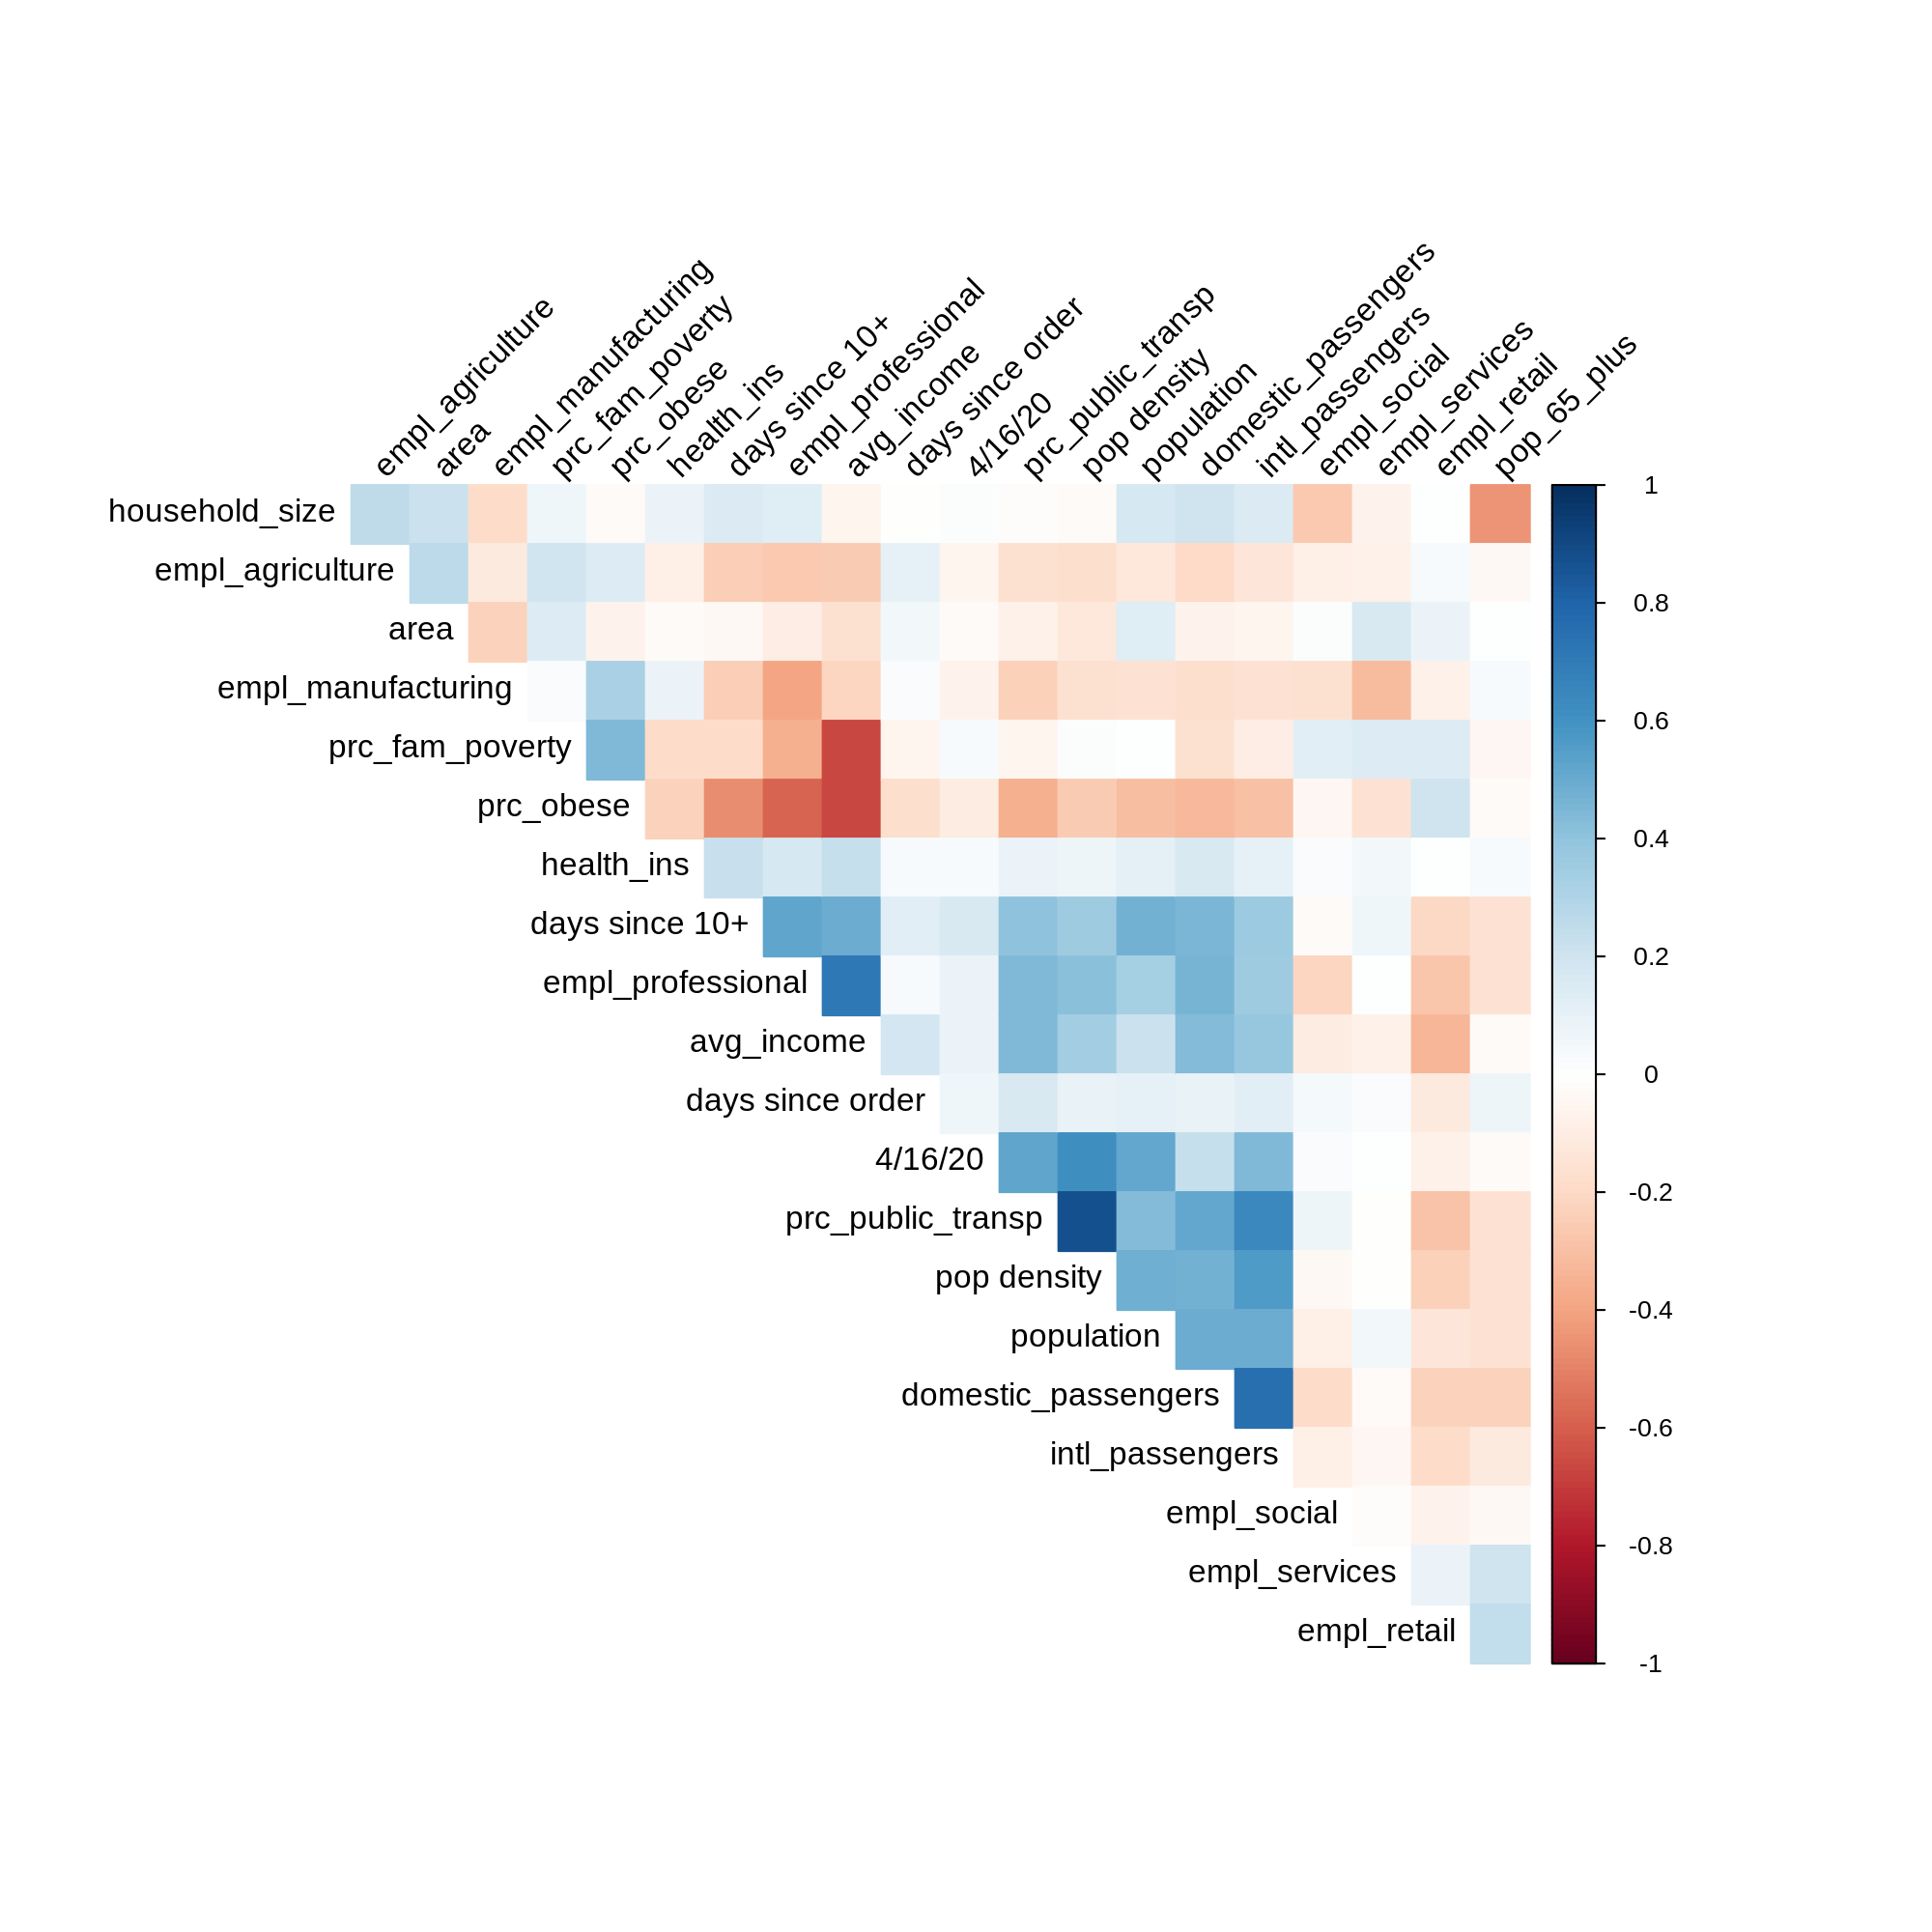

In [30]:
%%R -i abbrev -w 10 -h 10 --units in -r 200
library(corrplot)
corr = cor(abbrev[ c('household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'area', 'prc_obese',
       'domestic_passengers', 'intl_passengers', '4/16/20', 'days since 10+',
       'days since order', 'pop density')])
corrplot(corr, method="color", type="upper", order="hclust", 
         #addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

# looks like greatest correlation between # deaths on 4/16/20 is pop density, avg_income, days since 10+, population, domestic_passengers, and intl_passengers

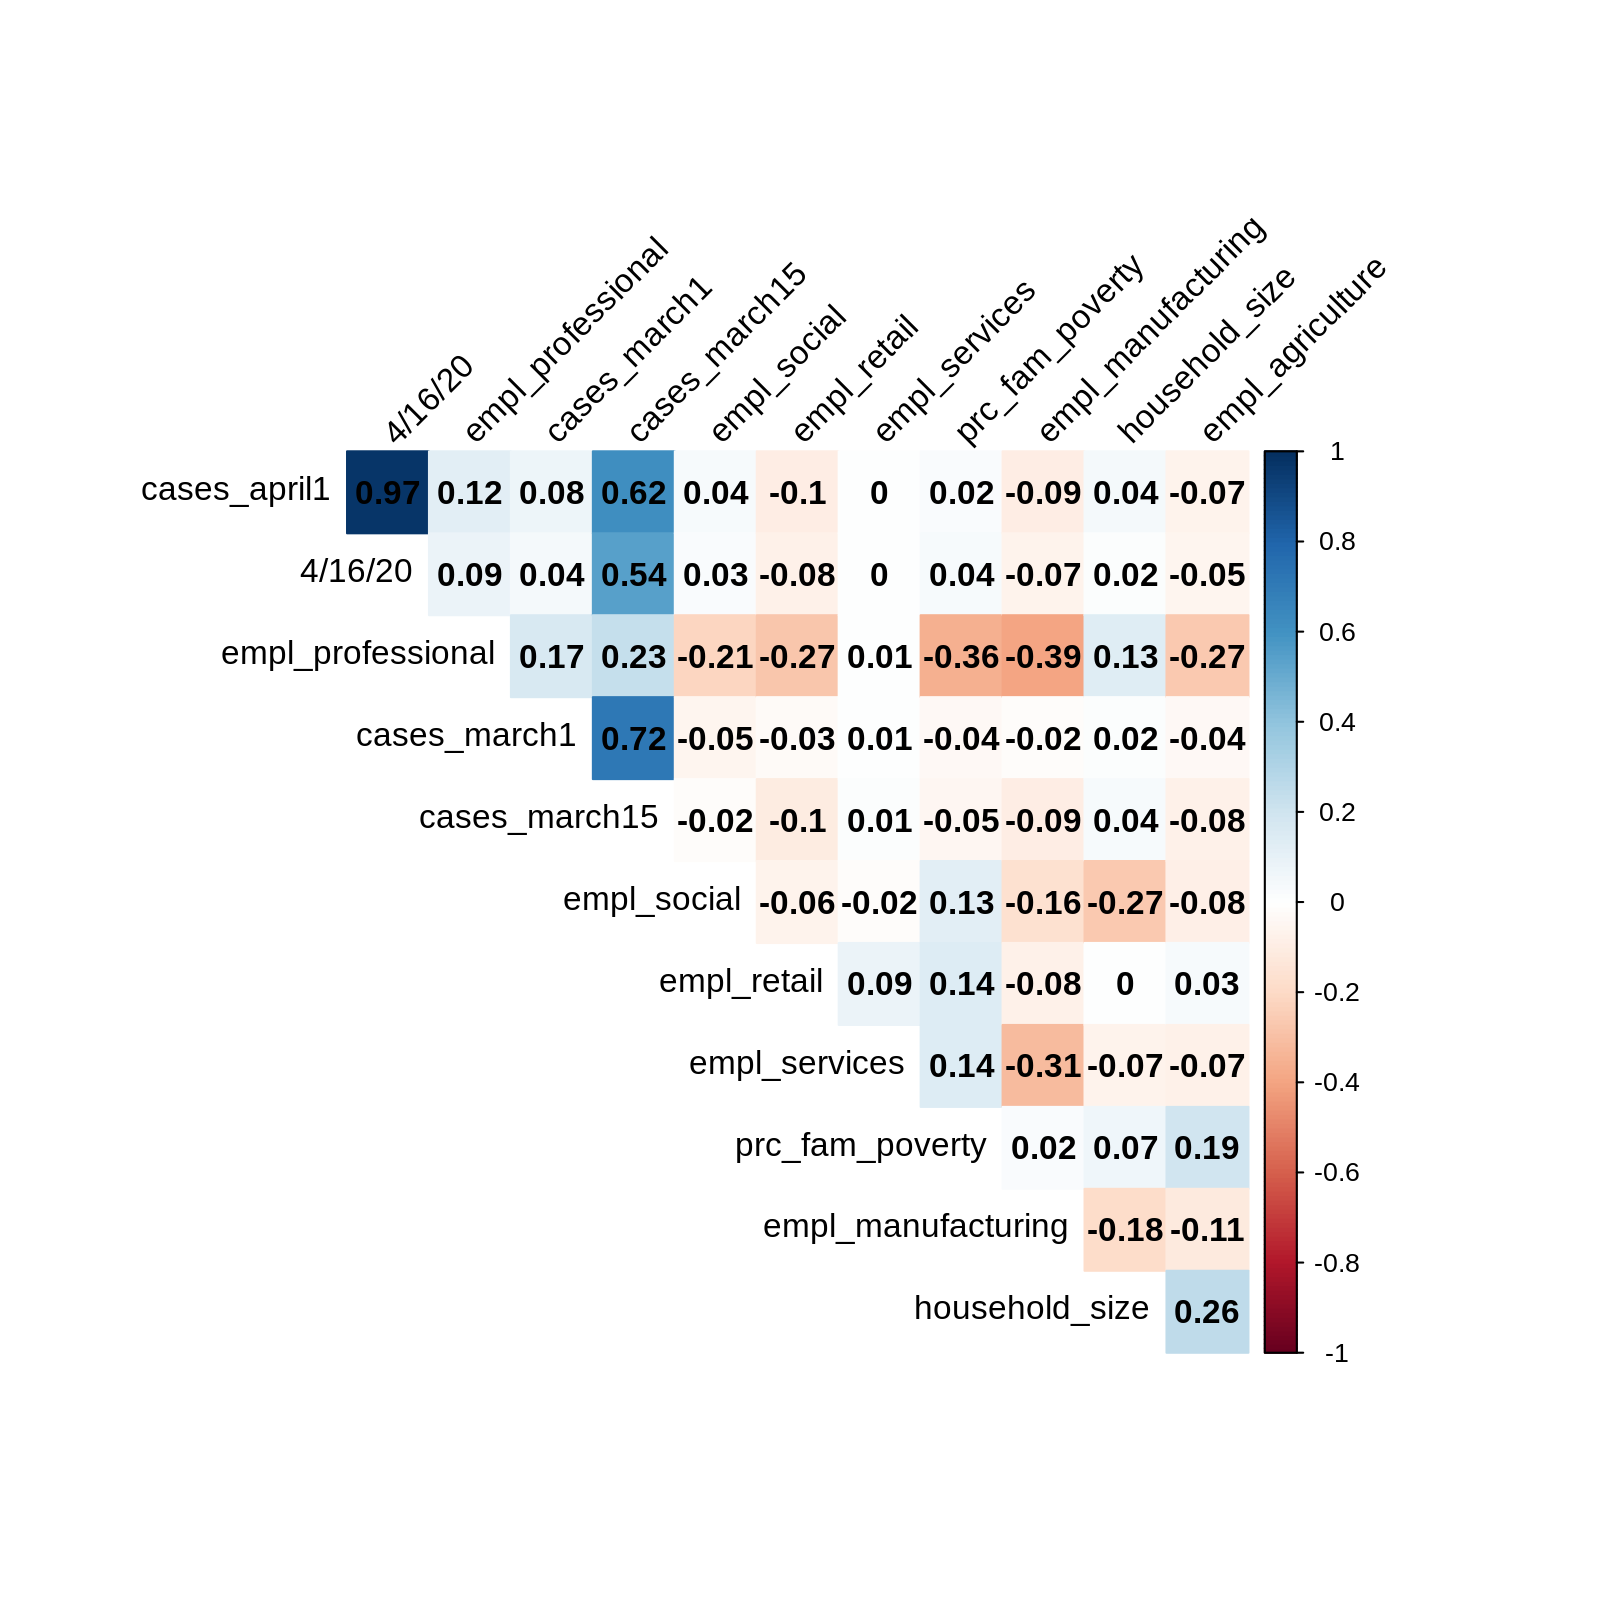

In [31]:
%%R -i abbrev -w 8 -h 8 --units in -r 200

corr = cor(abbrev[c('household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'cases_march1', 'cases_march15', 'cases_april1', '4/16/20')])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE )

# number of cases 16 days previous (4/1/20) is almost perfectly correlated with the death count (4/16/20)
# case numbers b/n march15 and april1 aren't nearly as strongly correlated, and same w/ march1 & march15

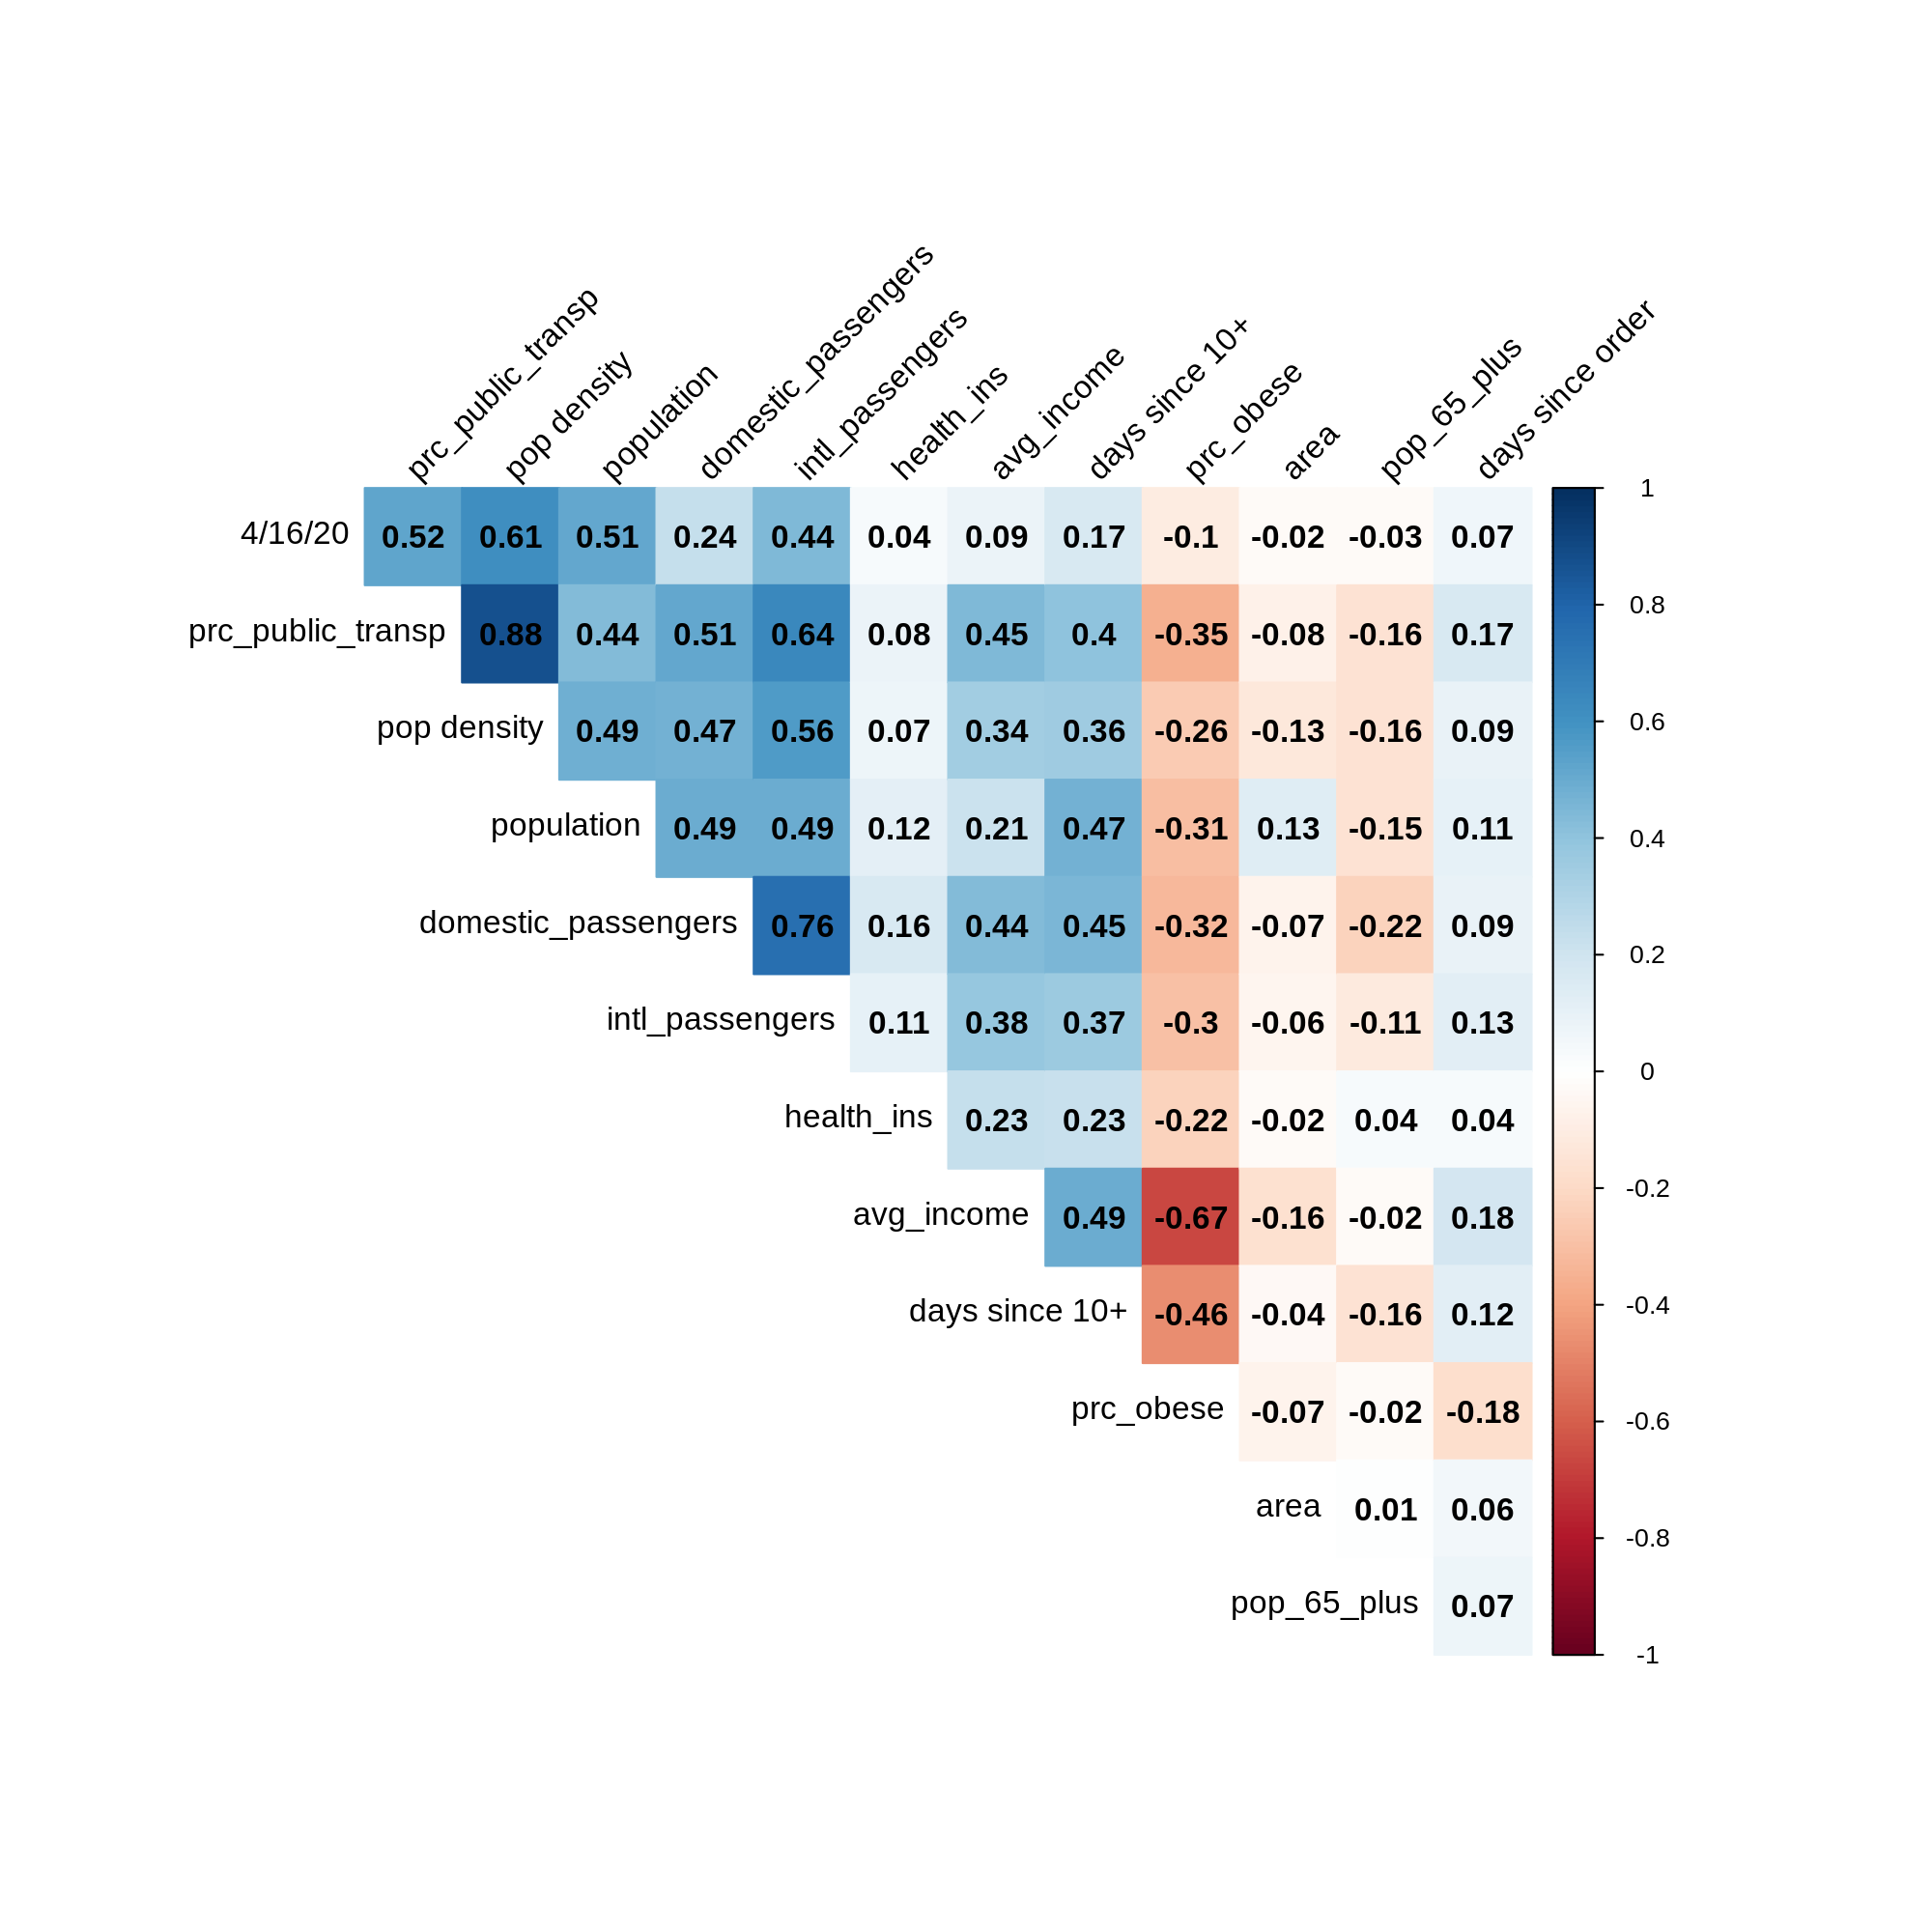

In [32]:
%%R -i abbrev -w 10 -h 10 --units in -r 200

corr = cor(abbrev[ c('avg_income', 'prc_public_transp', 'population','pop_65_plus', 'health_ins', 'area',
       'domestic_passengers', 'intl_passengers', 'prc_obese', '4/16/20', 'days since 10+',
        'days since order', 'pop density')])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE )

# most of these have some degree of correlation with deaths

In [33]:
abbrev.columns

Index(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'county', 'state', 'area', 'prc_obese',
       'domestic_passengers', 'intl_passengers', '4/16/20', 'cases_march1',
       'cases_march15', 'cases_april1', 'days since 10+', 'days since order',
       'pop density'],
      dtype='object')

In [34]:
# rename columns in abbrev
abbrev.columns = ['household_size', 'empl_agriculture', 'empl_professional',
                  'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
                  'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
                  'pop_65_plus', 'health_ins', 'county', 'state', 'area', 'prc_obese',
                  'domestic_passengers', 'intl_passengers', "deaths", "cases_march1", 
                  "cases_march15", "cases_april1", "ten_plus", "order", "density"]

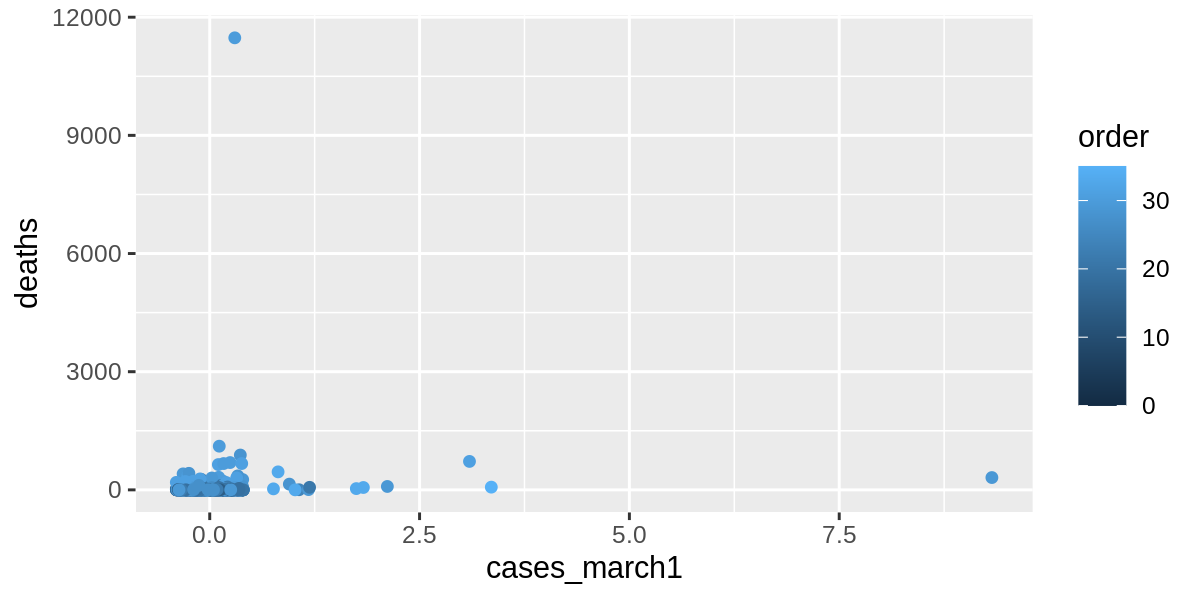

In [35]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(cases_march1, deaths, color=order))

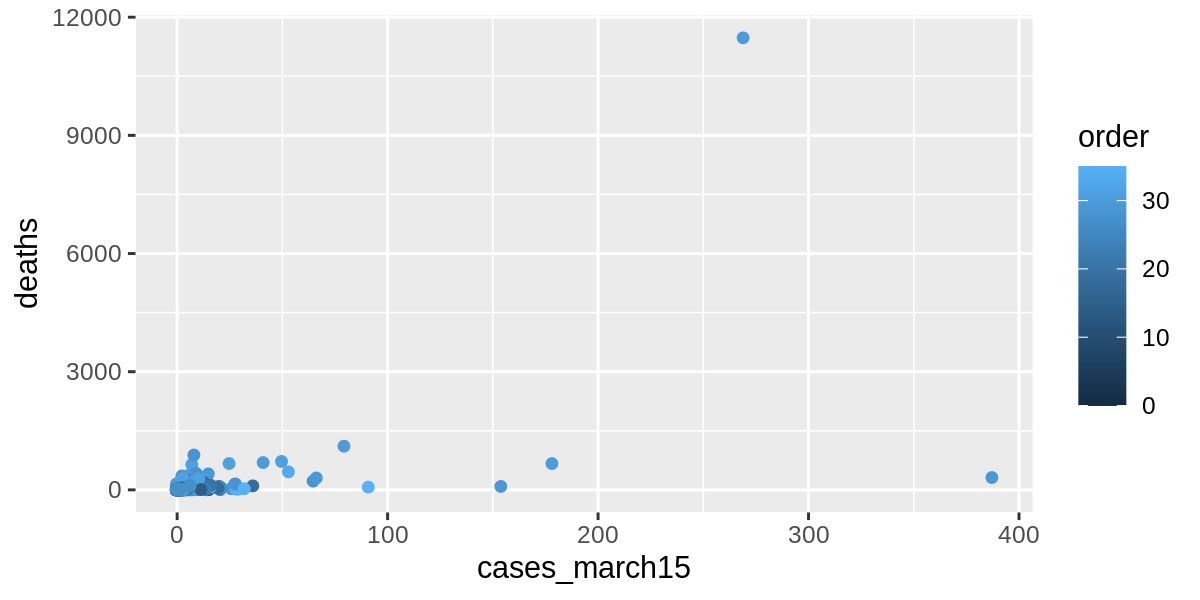

In [36]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(cases_march15, deaths, color=order))

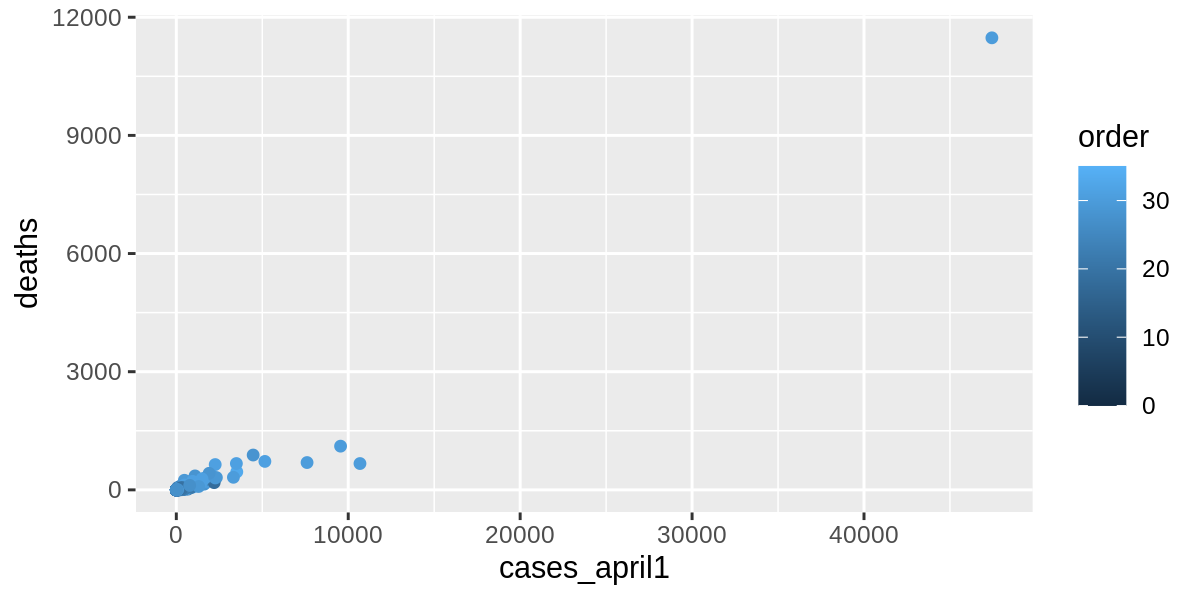

In [37]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(cases_april1, deaths, color=order))

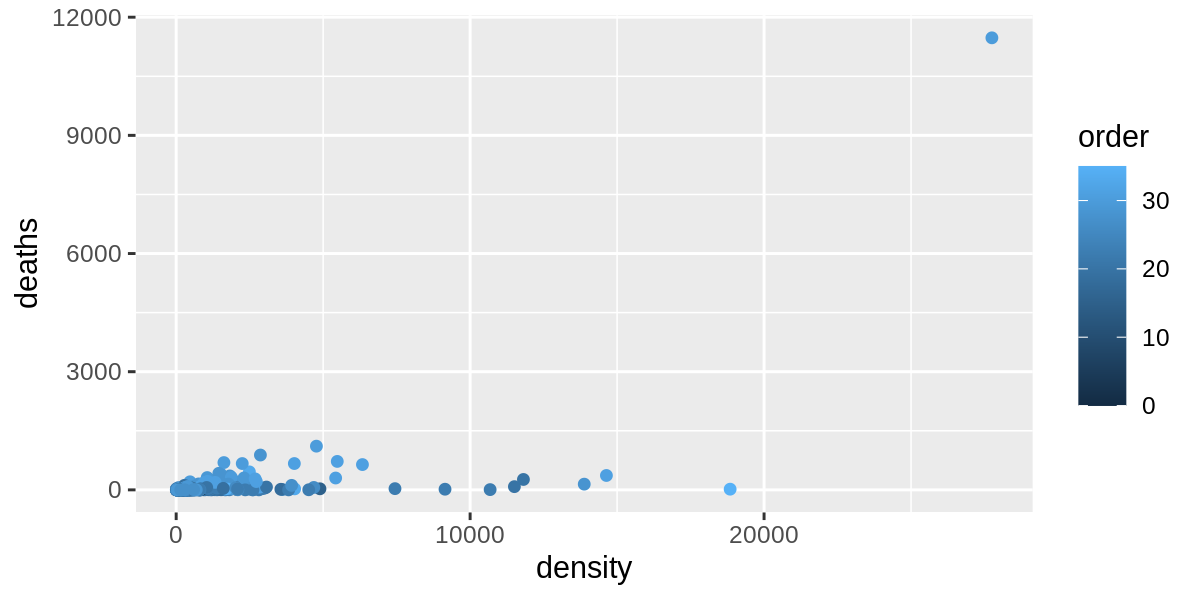

In [38]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(density, deaths, color=order))

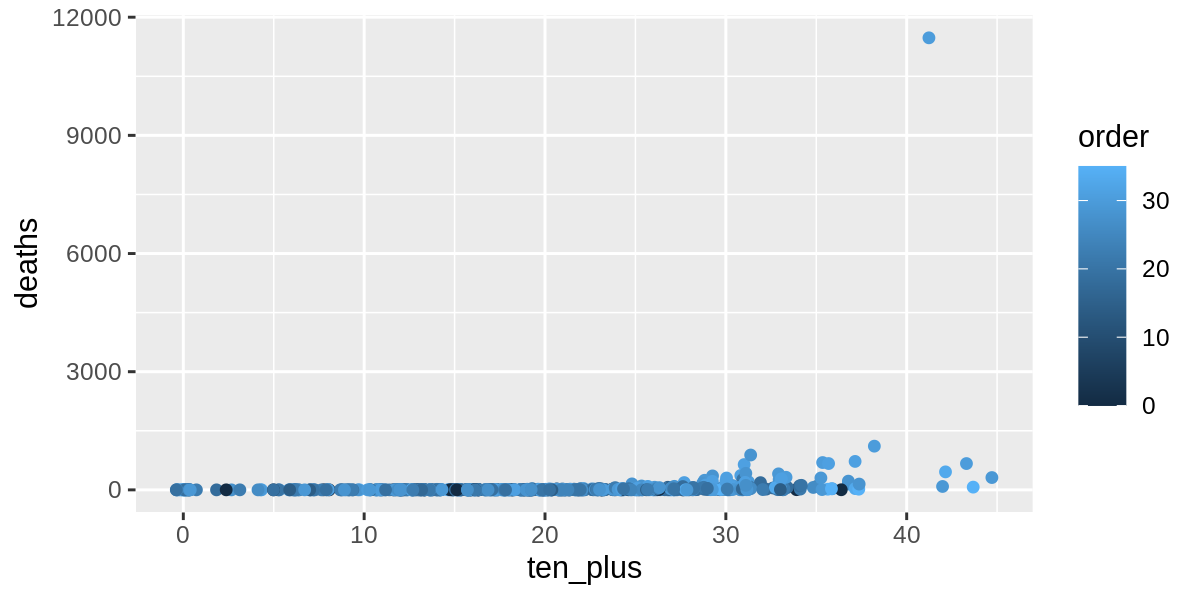

In [39]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(ten_plus, deaths, color=order))

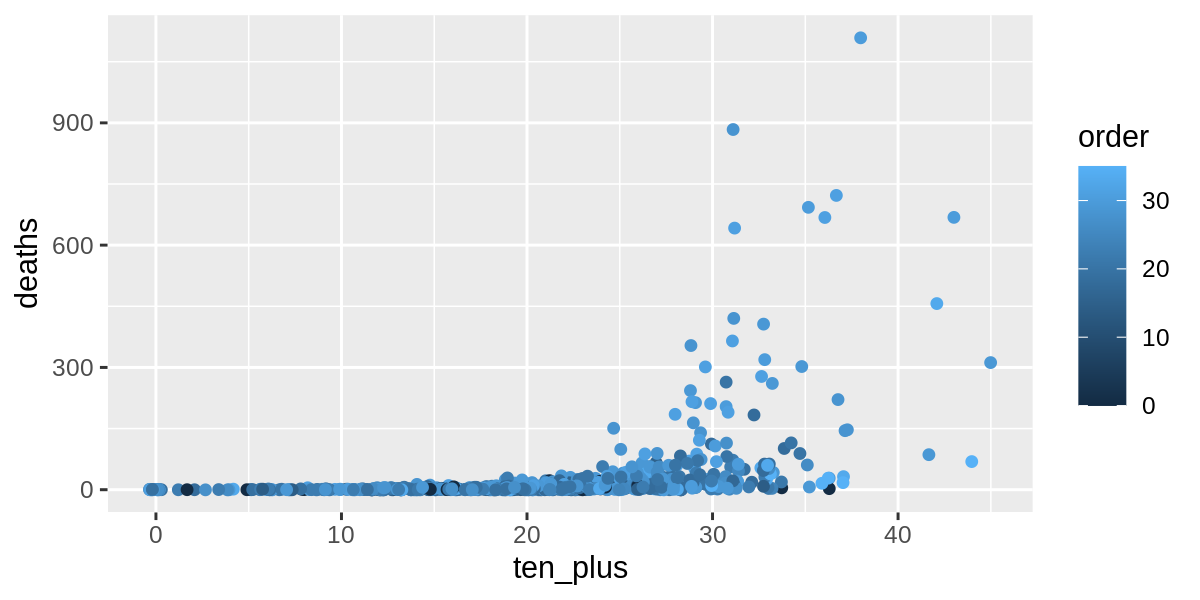

In [40]:
%%R -w 6 -h 3 --units in -r 200

# without NYC
ggplot(abbrev[which(abbrev$deaths < 9000), ]) + geom_jitter(aes(ten_plus, deaths, color=order))

# looking more closely at data points that aren't NYC, it looks like 
# deaths really start to vary/increase at 20 days or so after 10+ cases detected

In [41]:
abbrev[abbrev["deaths"] >= 9000]

household_size  empl_agriculture  empl_professional  empl_social  \
822             2.6           8.6e-02               14.1         26.9   

     empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
822           10.7                 3.0          8.9             14.2   

     avg_income  prc_public_transp  ...  prc_obese  domestic_passengers  \
822     39588.7               55.9  ...       22.5             44647000   

     intl_passengers deaths cases_march1  cases_march15  cases_april1  \
822         24424000  11477            0            269         47439   

     ten_plus  order  density  
822        41     30  27750.7  

[1 rows x 26 columns]

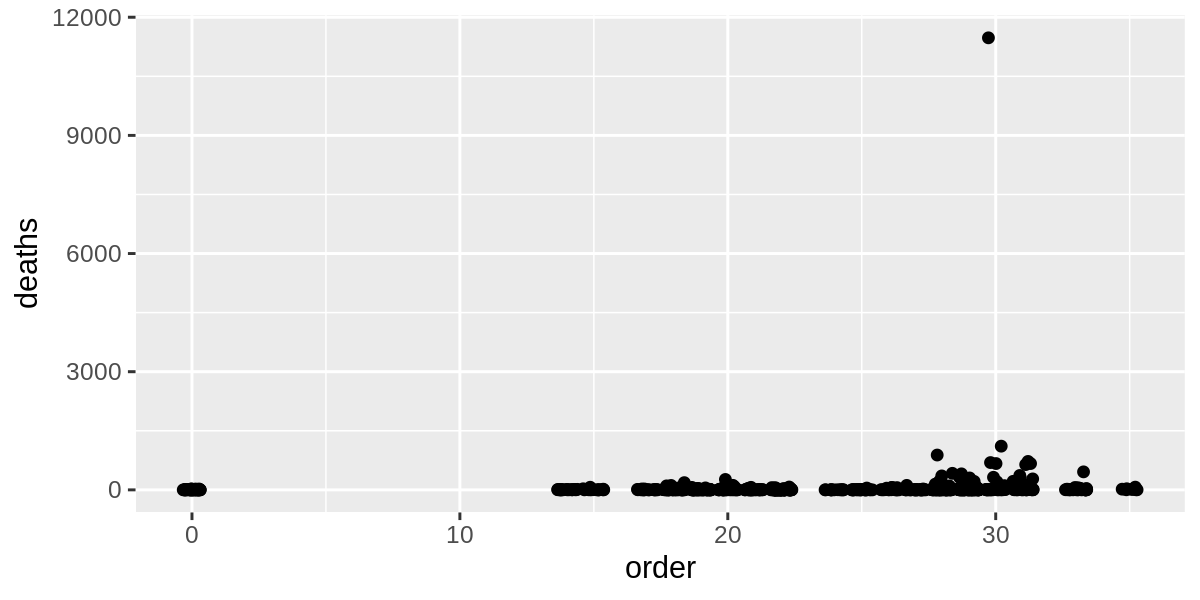

In [42]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, deaths))

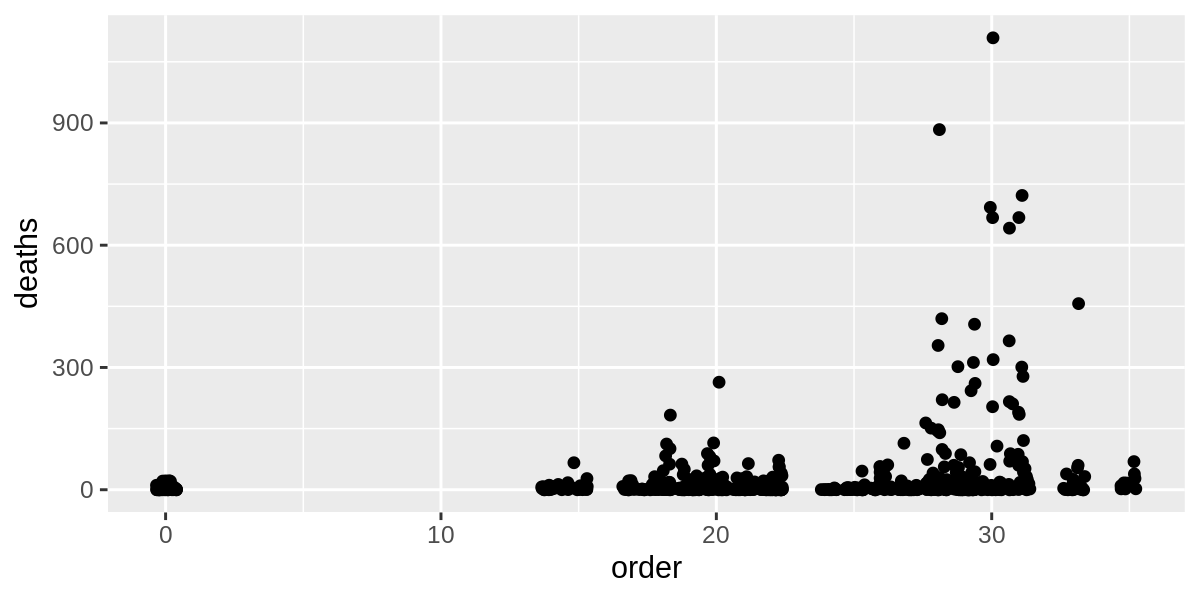

In [43]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(order, deaths))

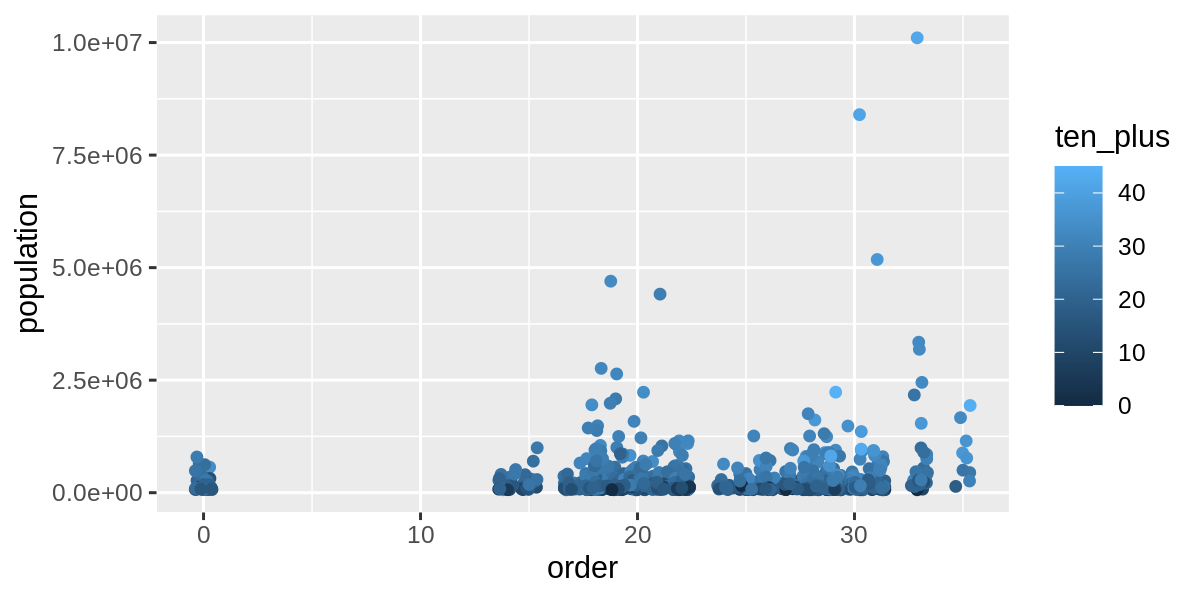

In [44]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, population, color=ten_plus))
# did more populous places enact shelter in place sooner?  did those with earlier 10+ confirmed cases?

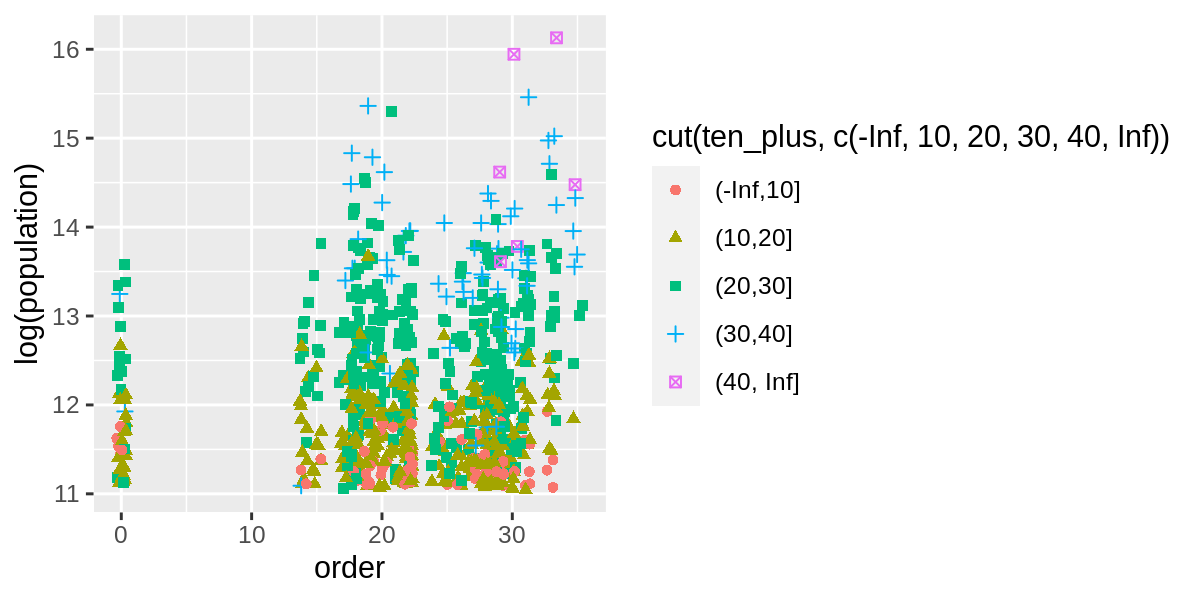

In [45]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, log(population), shape=cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), 
                                color=cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf))))
# did more populous places enact shelter in place sooner?  did those with earlier 10+ confirmed cases?

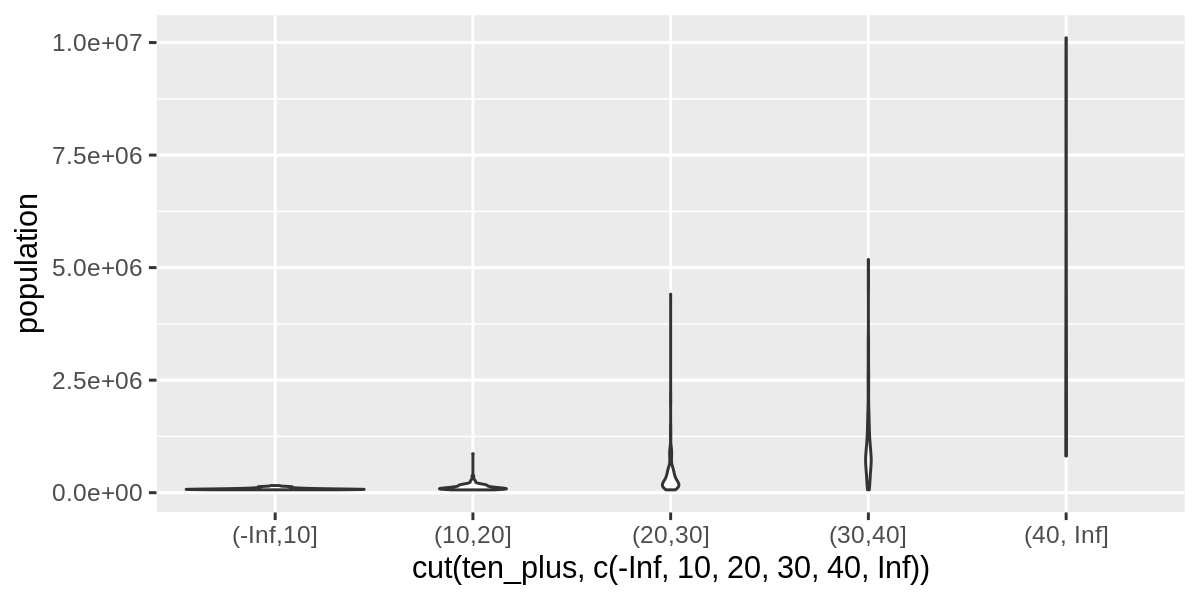

In [46]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) +  geom_violin(aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), population))

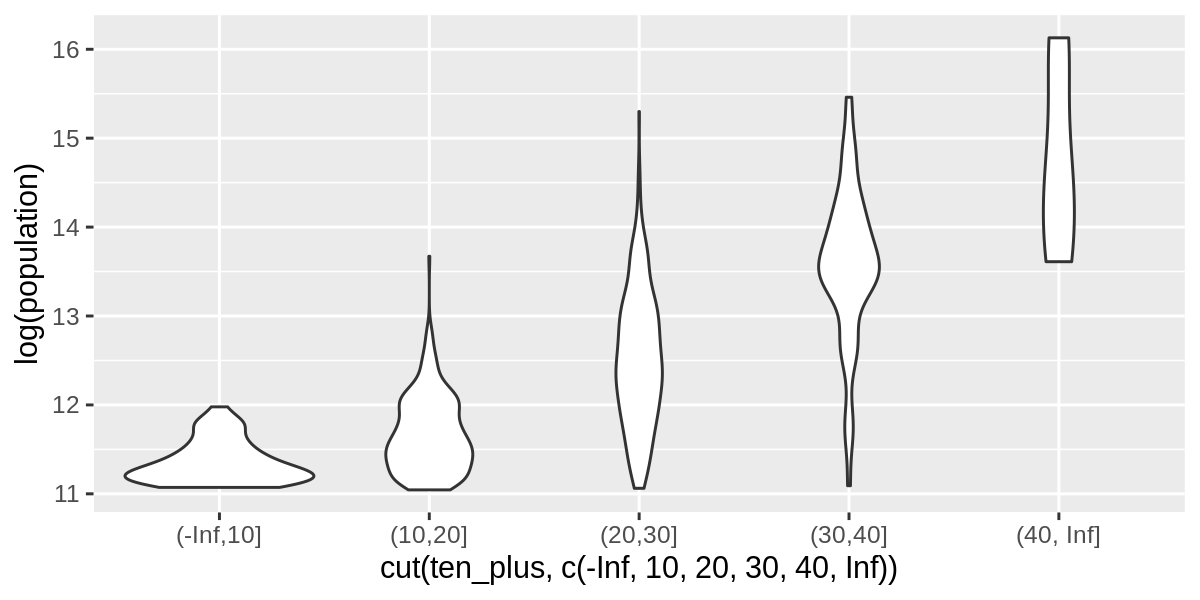

In [47]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) +  geom_violin(aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), log(population)))
# there is some variation within groups, but in general it seems like larger populations saw their
# first 10+ confirmed cases longer (more days) ago

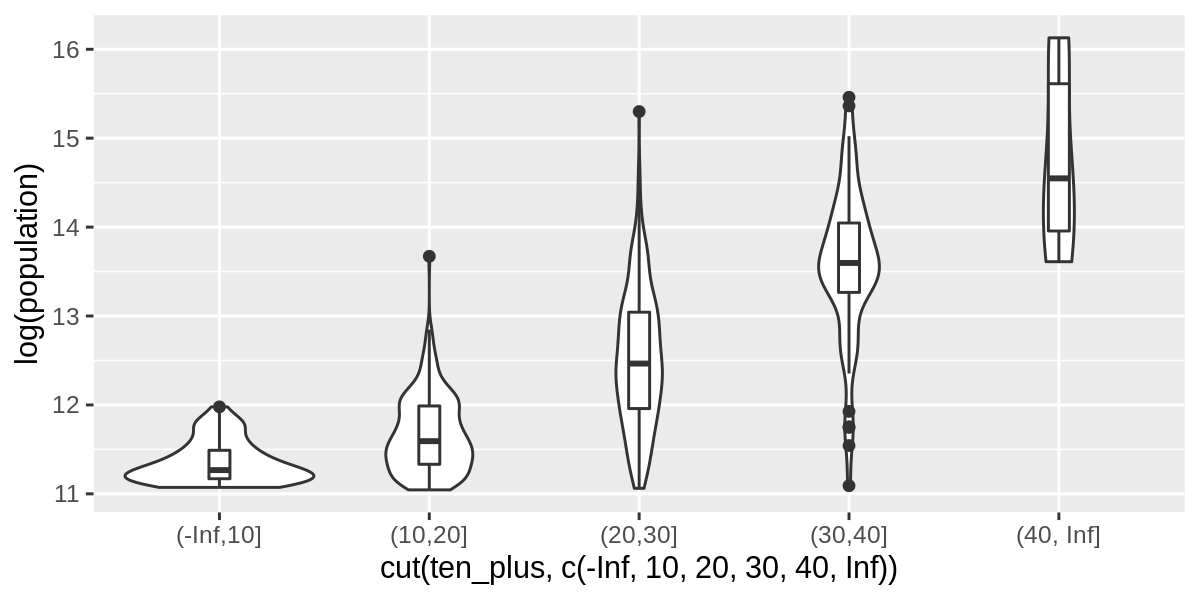

In [48]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), log(population))) +  
geom_violin() + 
geom_boxplot(width=0.1)

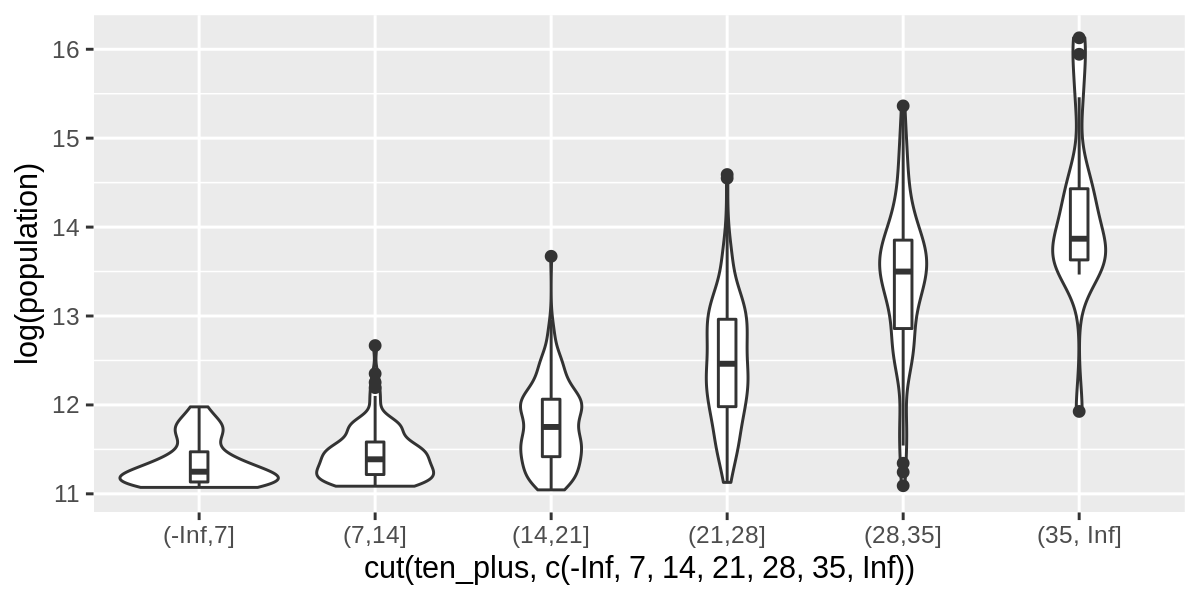

In [49]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf)), log(population))) +  
geom_violin() + 
geom_boxplot(width=0.1)

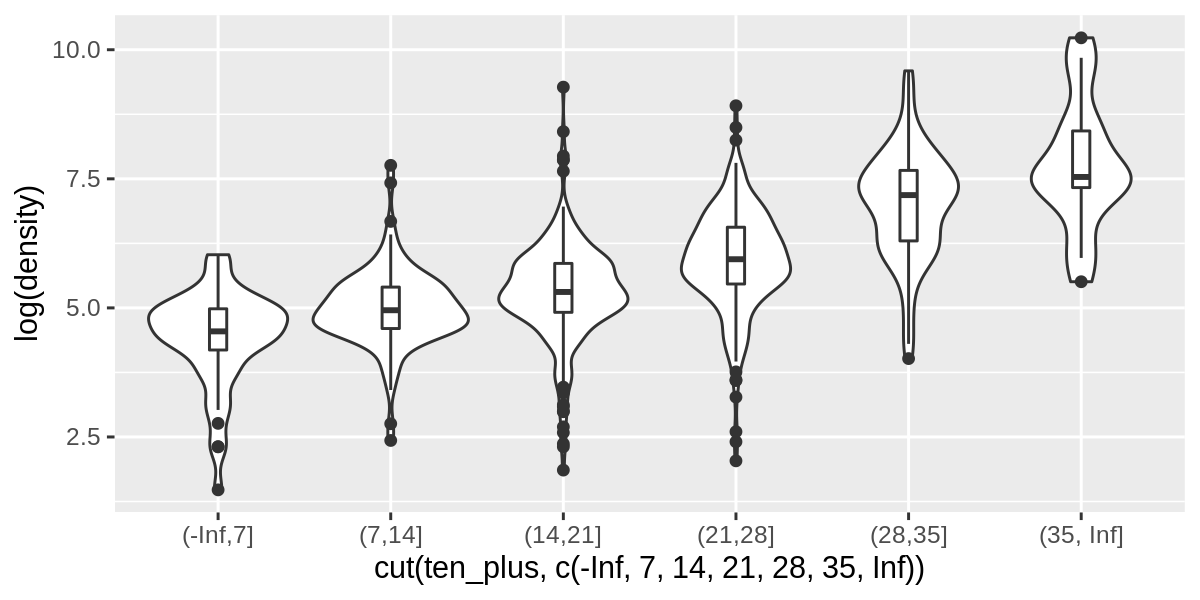

In [50]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf)), log(density))) +  
geom_violin() + 
geom_boxplot(width=0.1)

In [51]:
abbrev["domestic_passengers"].describe()

count    8.2e+02
mean     4.0e+06
std      8.9e+06
min      0.0e+00
25%      0.0e+00
50%      3.0e+05
75%      2.2e+06
max      4.6e+07
Name: domestic_passengers, dtype: float64

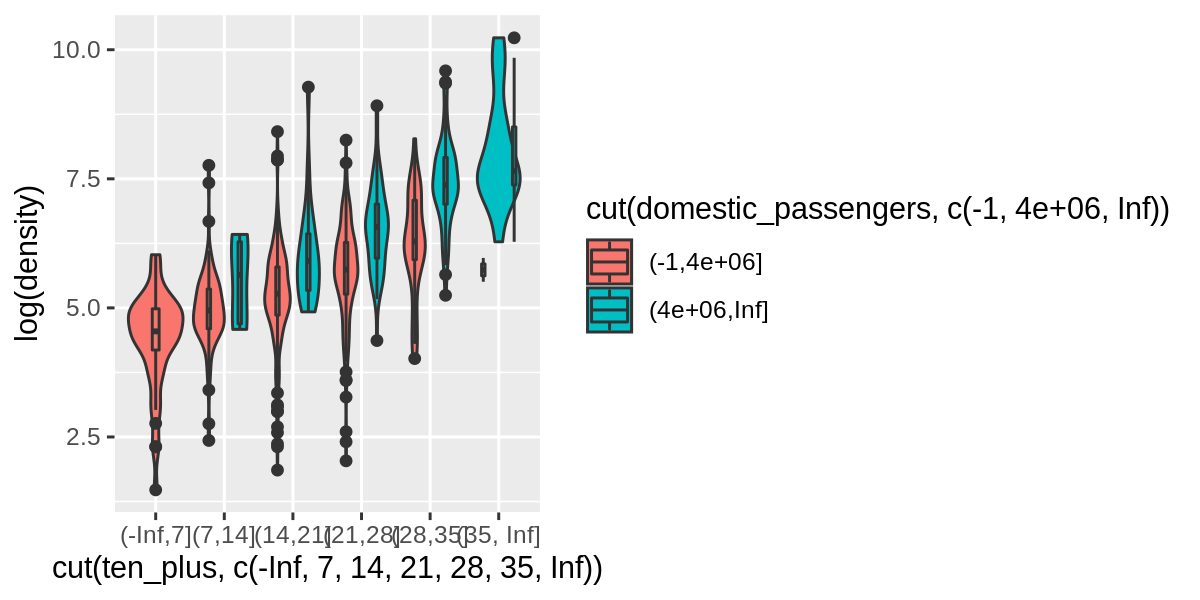

In [52]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf)), log(density), fill=cut(domestic_passengers, c(-1, 4000000, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

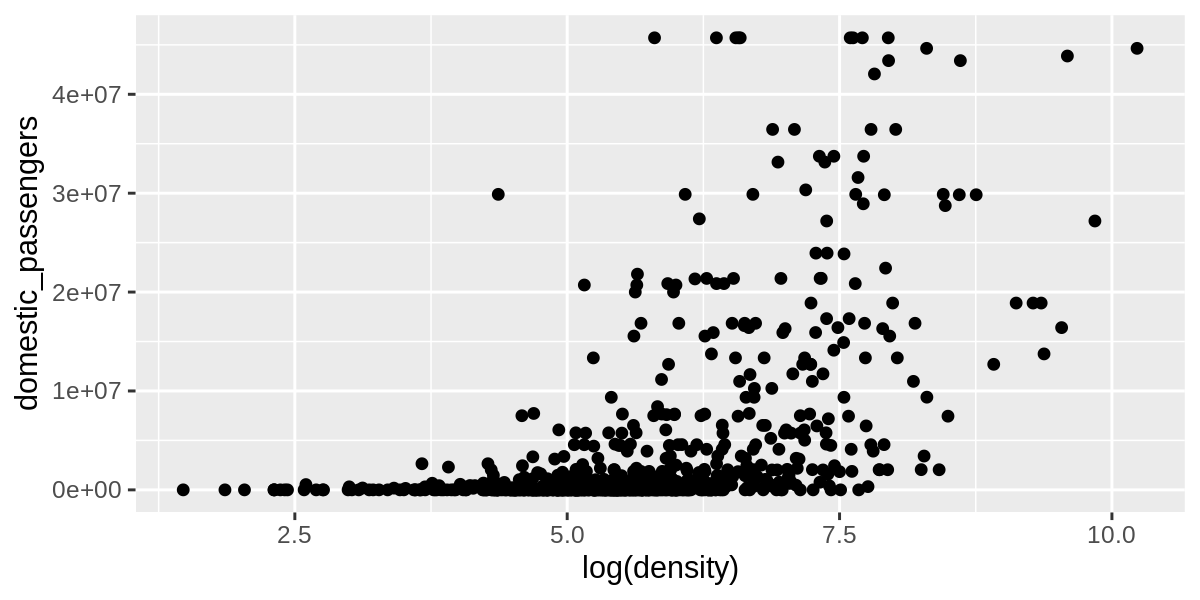

In [53]:
%%R -w 6 -h 3 --units in -r 200
# above is not very surprising if counties with larger population density also get larger number of domestic airplane passengers?

ggplot(abbrev, aes(log(density), domestic_passengers)) +  geom_jitter() 

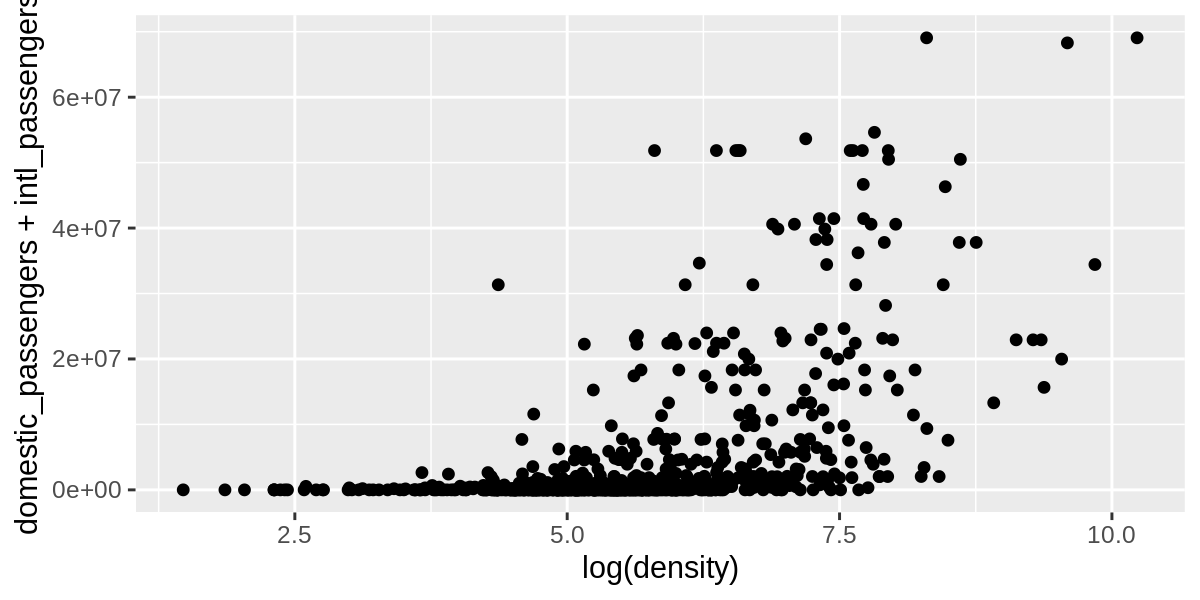

In [54]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(log(density), domestic_passengers + intl_passengers)) +  geom_jitter() 

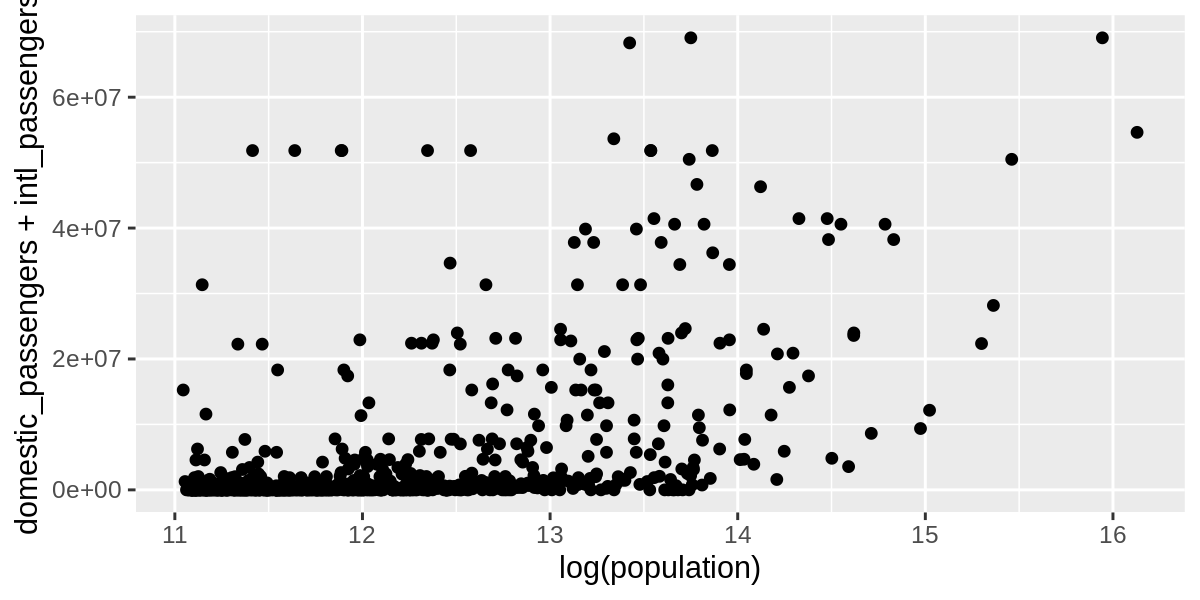

In [55]:
%%R -w 6 -h 3 --units in -r 200
# even less clear for population that it is for population density

ggplot(abbrev, aes(log(population), domestic_passengers + intl_passengers)) +  geom_jitter() 

In [56]:
abbrev.columns.values

array(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing',
       'empl_retail', 'prc_fam_poverty', 'avg_income',
       'prc_public_transp', 'population', 'pop_65_plus', 'health_ins',
       'county', 'state', 'area', 'prc_obese', 'domestic_passengers',
       'intl_passengers', 'deaths', 'cases_march1', 'cases_march15',
       'cases_april1', 'ten_plus', 'order', 'density'], dtype=object)

In [57]:
abbrev.prc_fam_poverty.mean()

9.007533050891846

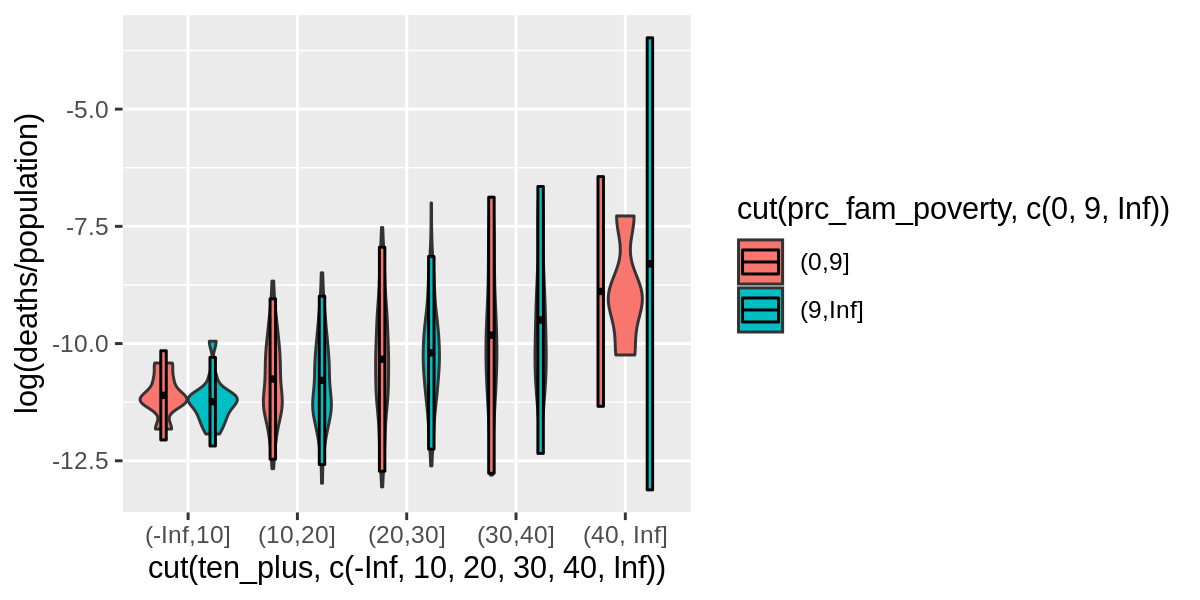

In [58]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), log(deaths/population), fill=cut(prc_fam_poverty, c(0, 9, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))
# looks like not a big difference in the first 2 weeks after 10+ cases detected, but the difference b/n means increases over time

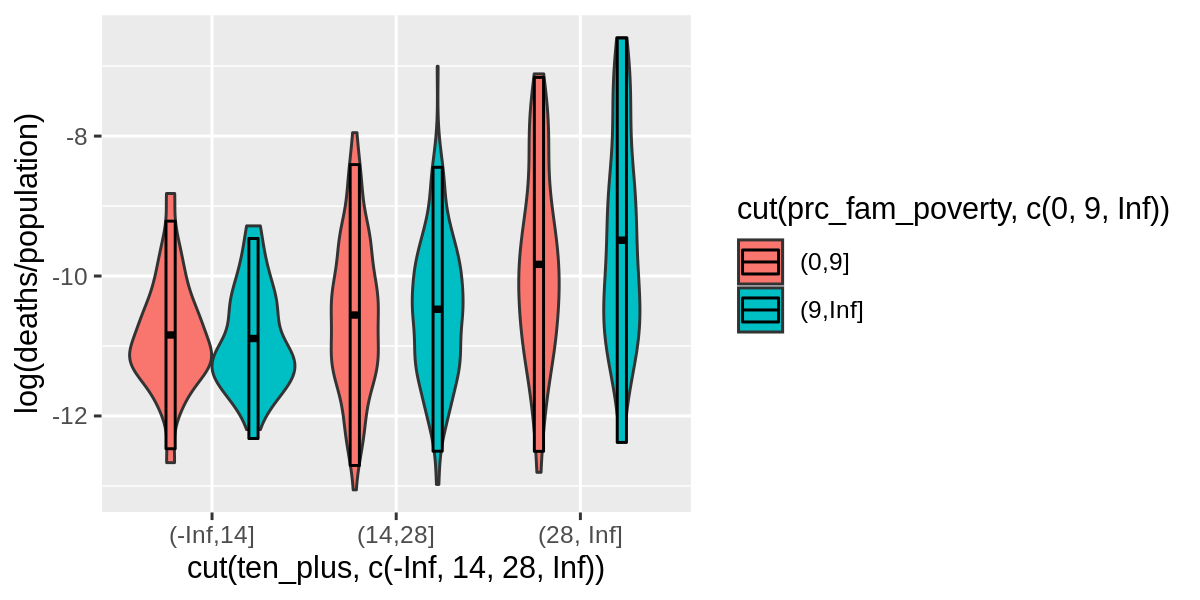

In [59]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 14, 28, Inf)), log(deaths/population), fill=cut(prc_fam_poverty, c(0, 9, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))
# looks like not a big difference in the first 2 weeks after 10+ cases detected, but the difference b/n means increases over time

In [60]:
abbrev[["order", "ten_plus"]].describe()

order  ten_plus
count  823.0     823.0
mean    22.9      20.7
std      7.6       7.9
min      0.0       0.0
25%     19.0      16.0
50%     22.0      21.0
75%     29.0      26.0
max     35.0      45.0

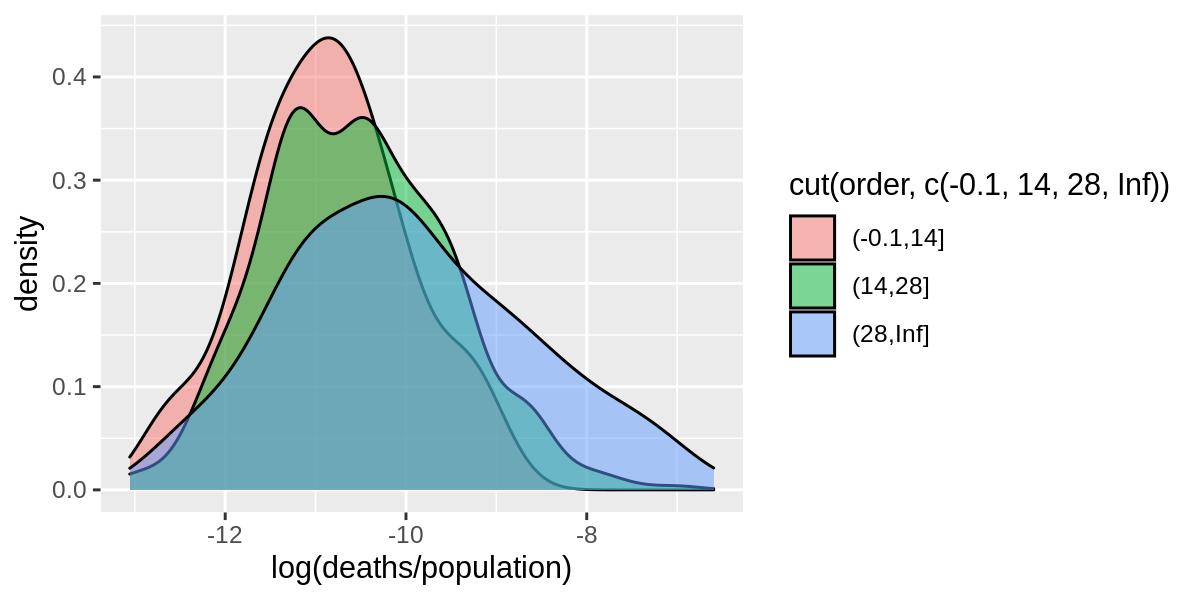

In [61]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(order, c(-0.1, 14.0, 28, Inf)))) + geom_density(alpha=.5)

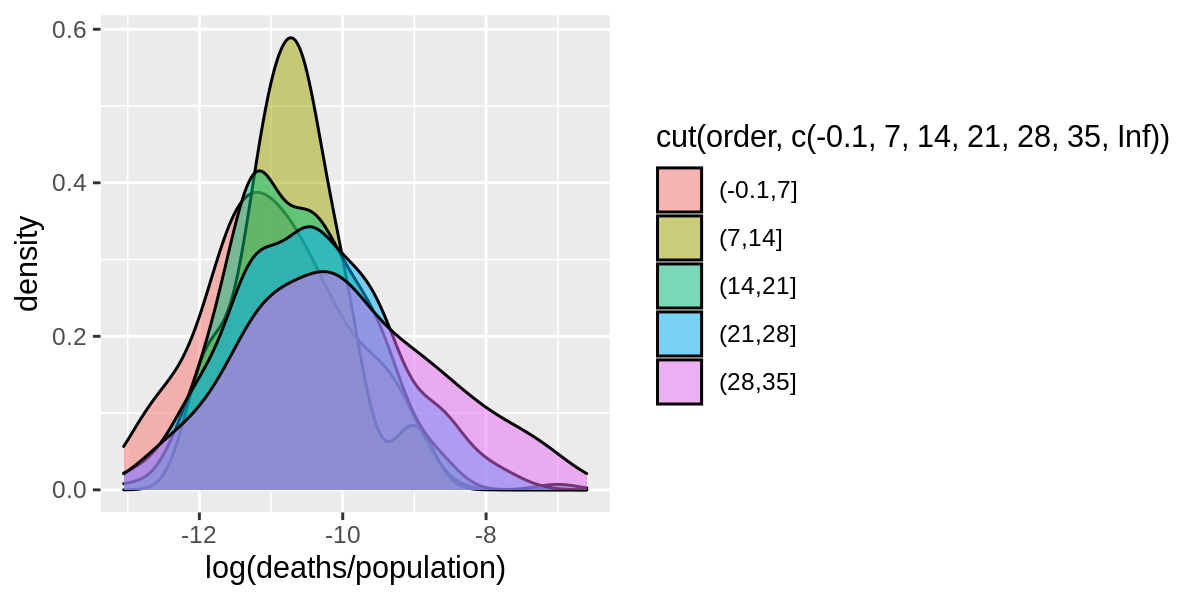

In [62]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(order, c(-0.1, 7, 14.0, 21, 28, 35, Inf)))) + geom_density(alpha=.5)

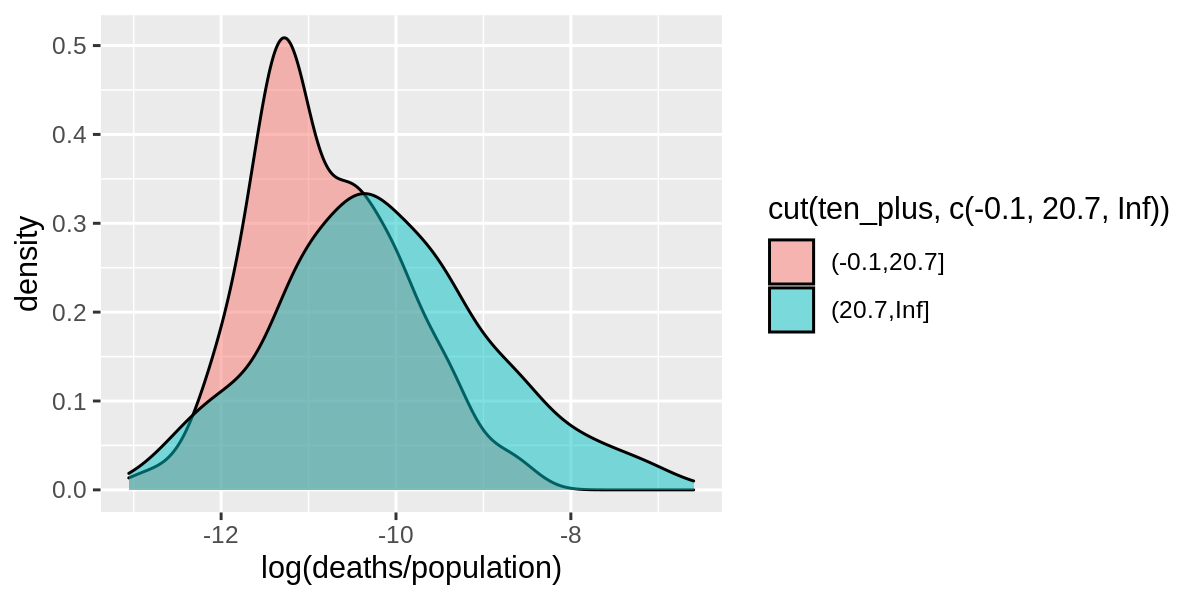

In [63]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(ten_plus, c(-0.1, 20.7, Inf)))) + geom_density(alpha=.5)
# not surprising that >avg time since 10+ cases detected on average have higher deaths/population

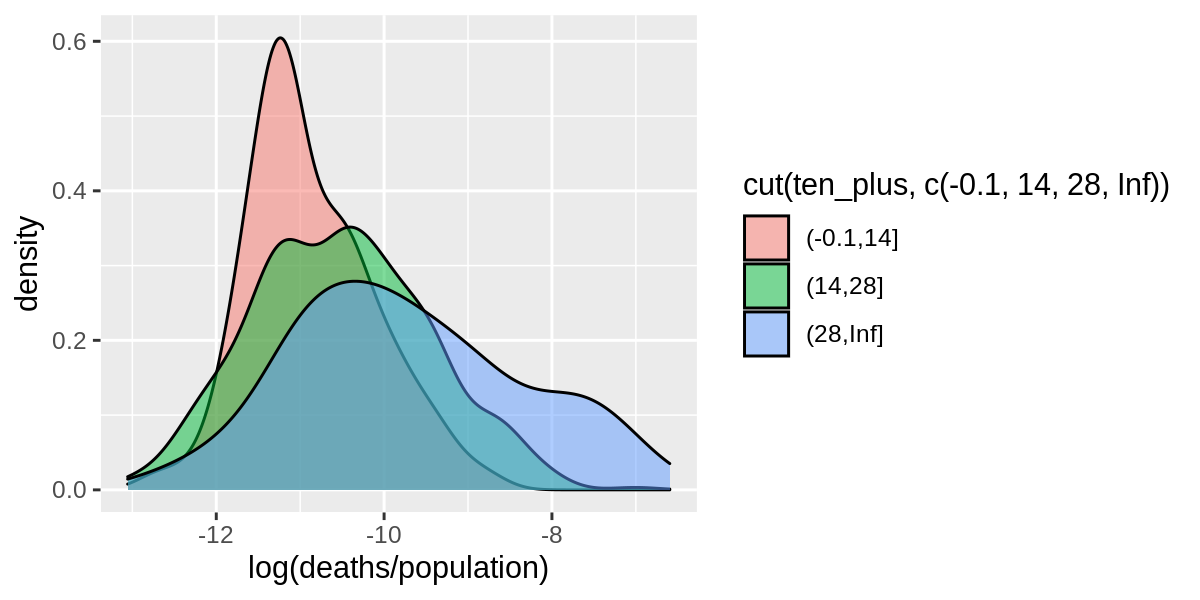

In [64]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(ten_plus, c(-0.1, 14, 28, Inf)))) + geom_density(alpha=.5)
# not surprising that >avg time since 10+ cases detected on average have higher deaths/population

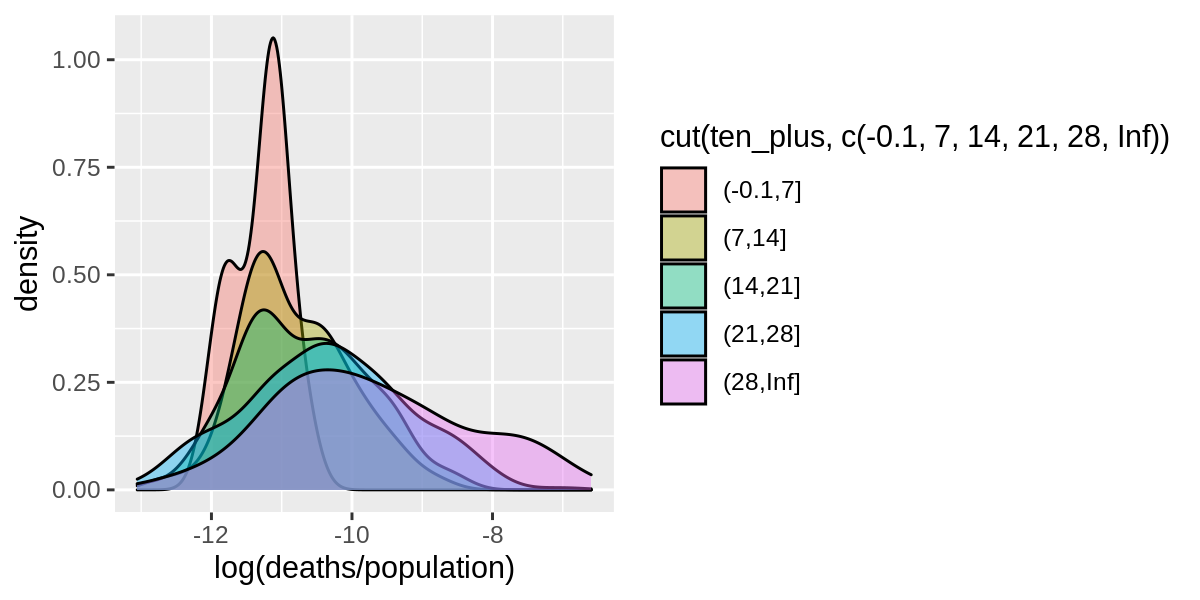

In [65]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(ten_plus, c(-0.1, 7, 14, 21, 28, Inf)))) + geom_density(alpha=.4)
# not surprising that >avg time since 10+ cases detected on average have higher deaths/population

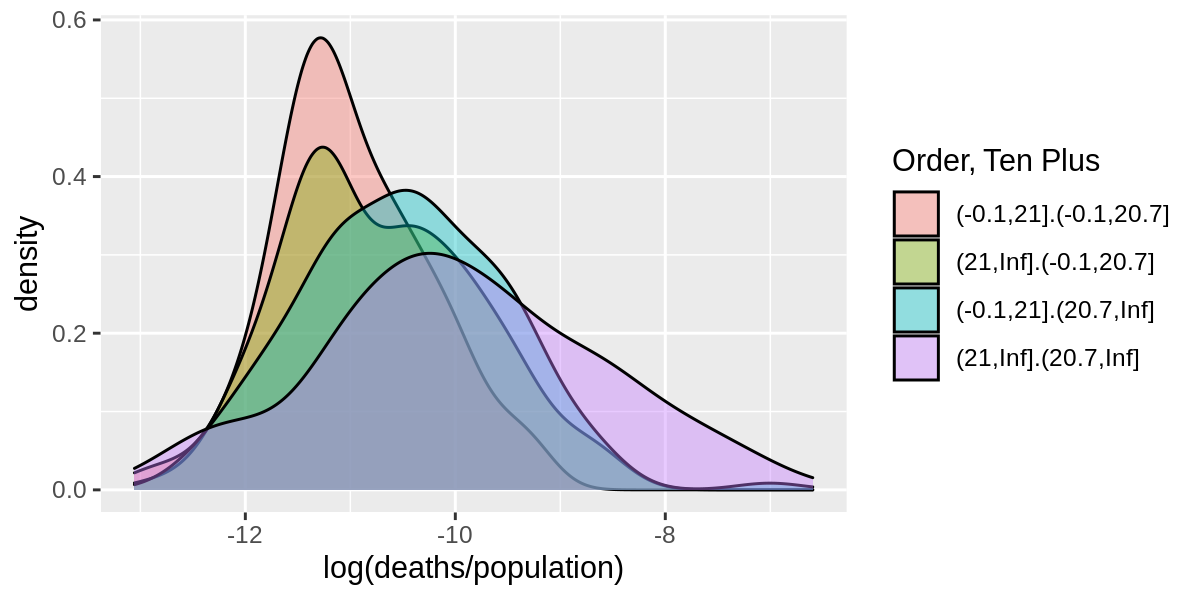

In [66]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=interaction(cut(order, c(-0.1, 21.0, Inf)), 
                                                              cut(ten_plus, c(-0.1, 20.7, Inf))))) + geom_density(alpha=.4) +
scale_fill_discrete(name  ="Order, Ten Plus")

In [67]:
abbrev.empl_retail.describe()

count    823.0
mean      11.5
std        2.0
min        0.0
25%       10.3
50%       11.4
75%       12.6
max       21.3
Name: empl_retail, dtype: float64

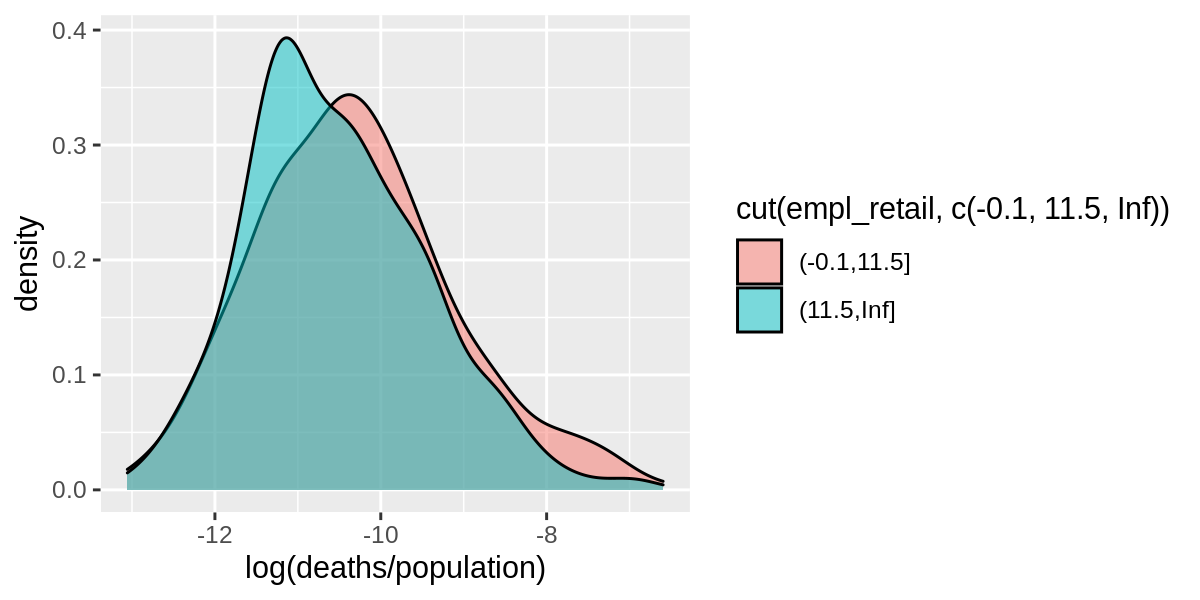

In [68]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(empl_retail, c(-0.1, 11.5, Inf)))) + geom_density(alpha=.5)
# opposite of what I had expected

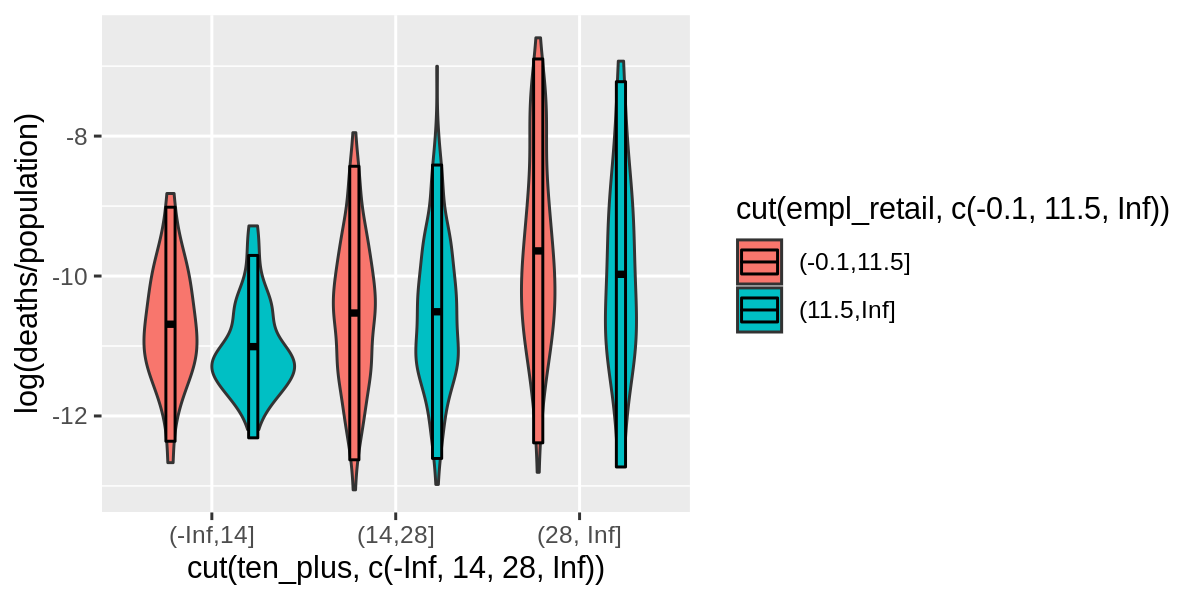

In [69]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 14, 28, Inf)), log(deaths/population), fill=cut(empl_retail, c(-0.1, 11.5, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))

In [70]:
abbrev.prc_public_transp.describe()

count    823.0
mean       1.9
std        4.3
min        0.0
25%        0.3
50%        0.7
75%        1.8
max       55.9
Name: prc_public_transp, dtype: float64

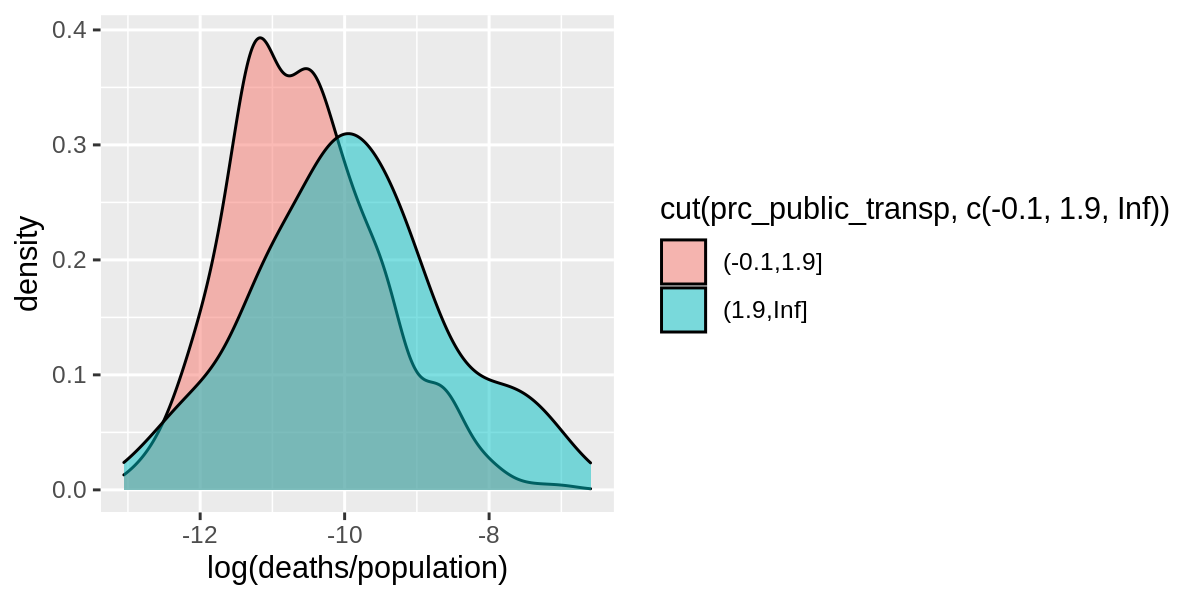

In [71]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(prc_public_transp, c(-0.1, 1.9, Inf)))) + geom_density(alpha=.5)
# does look like a higher mean deaths/population for counties with higher than average % of population commuting via public transportation

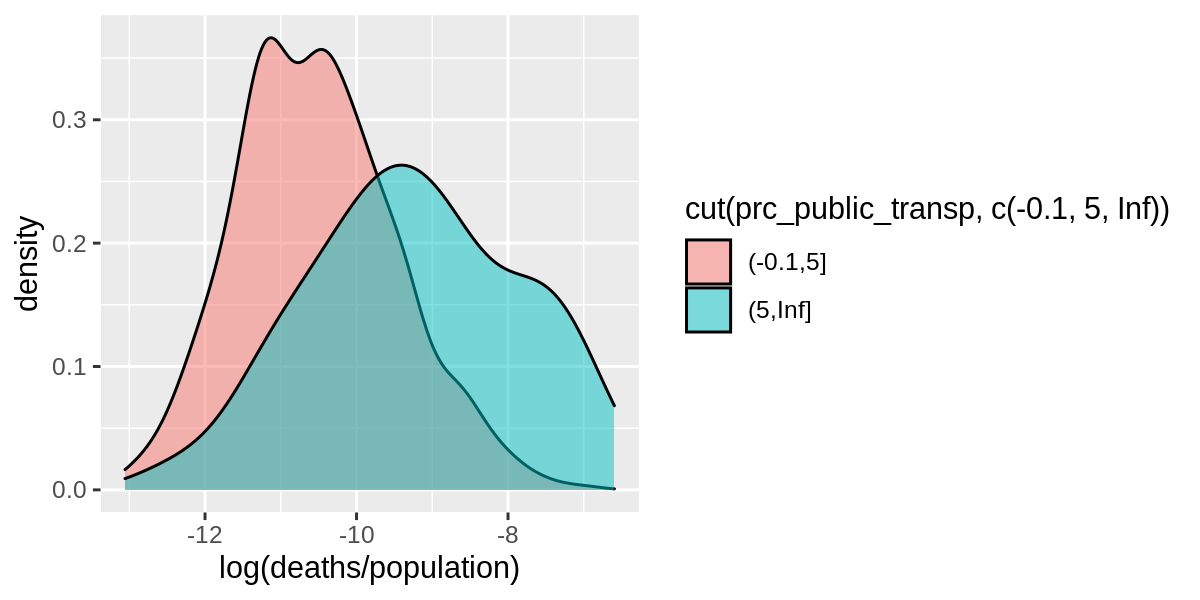

In [72]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(prc_public_transp, c(-0.1, 5, Inf)))) + geom_density(alpha=.5)

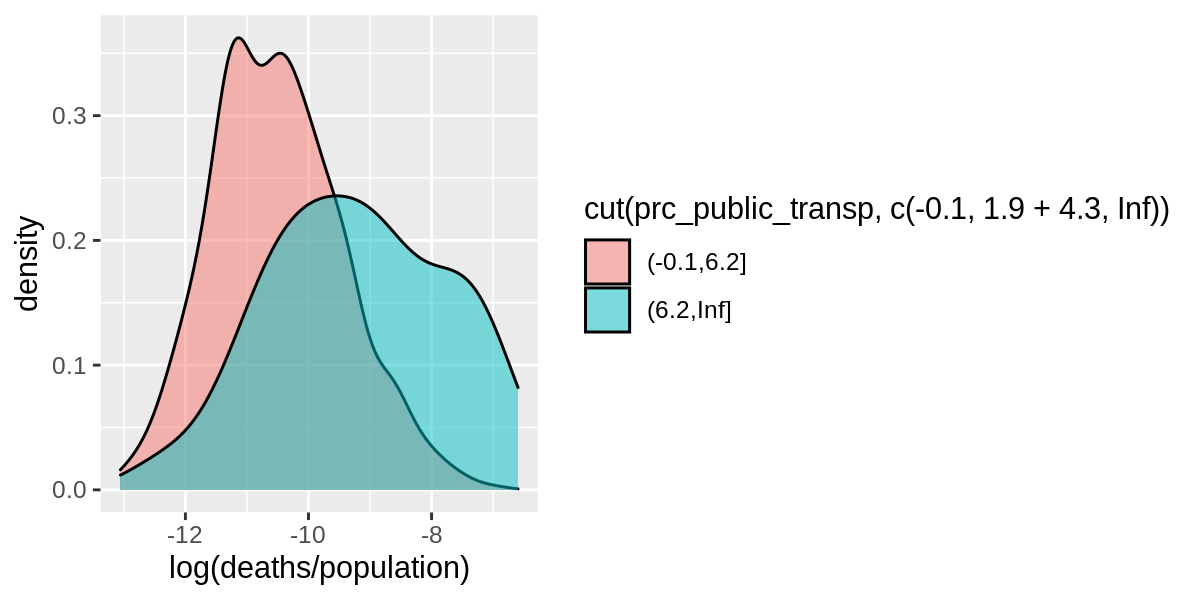

In [73]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(prc_public_transp, c(-0.1, 1.9+4.3, Inf)))) + geom_density(alpha=.5)

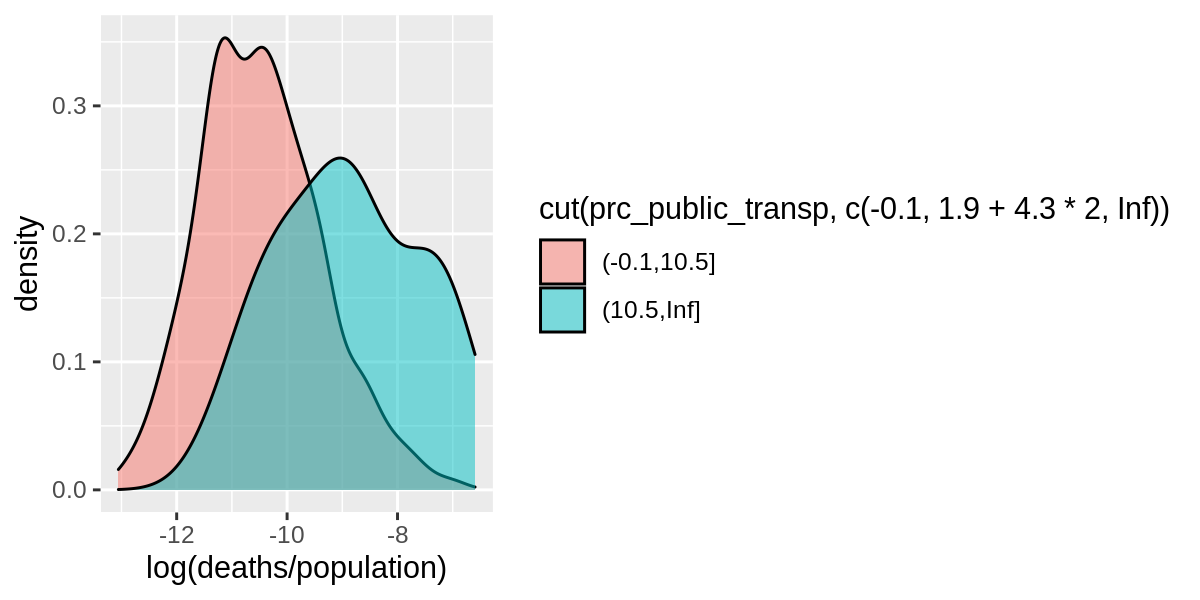

In [74]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(x=log(deaths/population), fill=cut(prc_public_transp, c(-0.1, 1.9+4.3*2, Inf)))) + geom_density(alpha=.5)

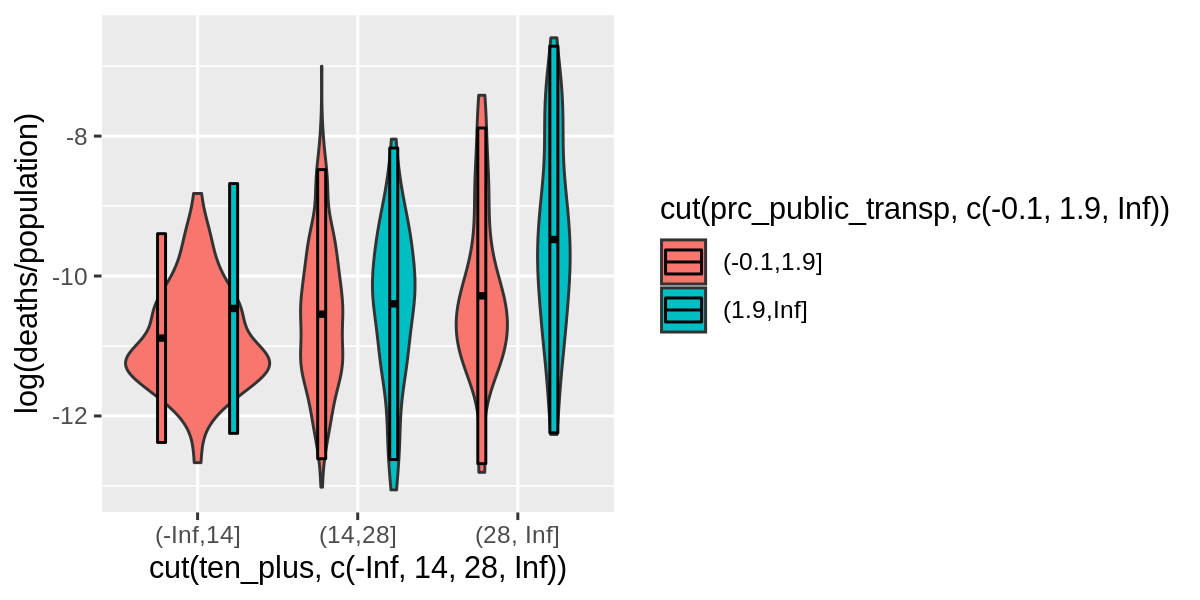

In [75]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 14, 28, Inf)), log(deaths/population), fill=cut(prc_public_transp, c(-0.1, 1.9, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))
# for each group of time since 10+ cases detected, looks like mean number of deaths/population higher for group with higher % using public transportation 

In [76]:
abbrev.pop_65_plus.mean()

16.681072606125227

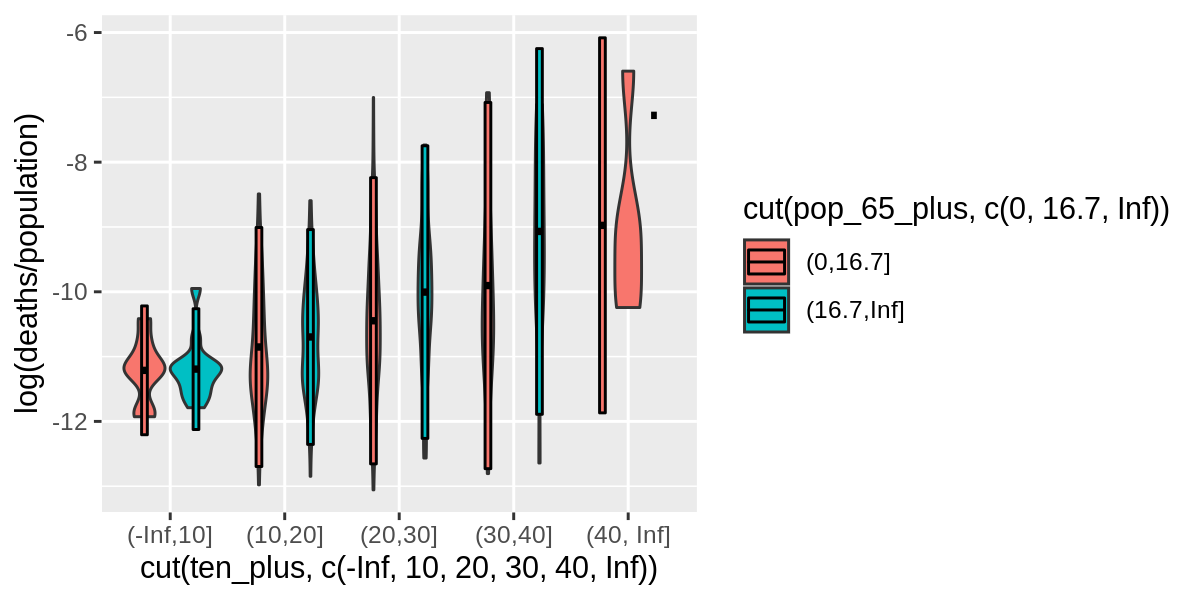

In [77]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), log(deaths/population), fill=cut(pop_65_plus, c(0, 16.7, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))
#geom_boxplot(width=0.1, position=position_dodge(0.9))

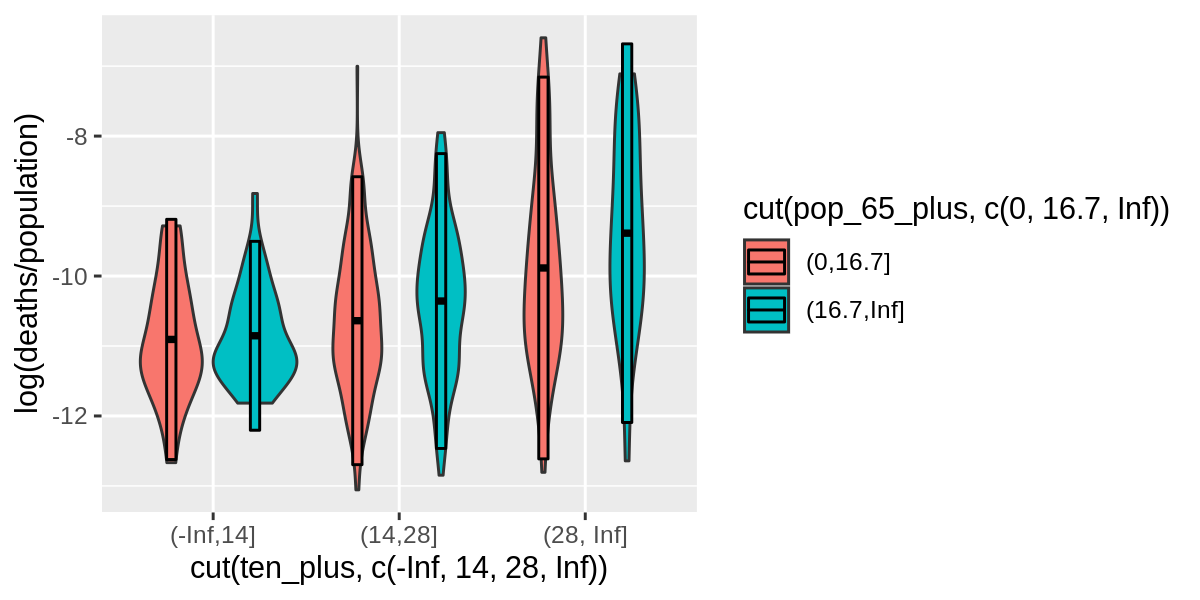

In [78]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 14, 28, Inf)), log(deaths/population), fill=cut(pop_65_plus, c(0, 16.7, Inf)))) +  
geom_violin() +  #stat_summary(fun.y=mean, geom="point", shape=23, size=2, position = position_dodge(0.9))
stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))

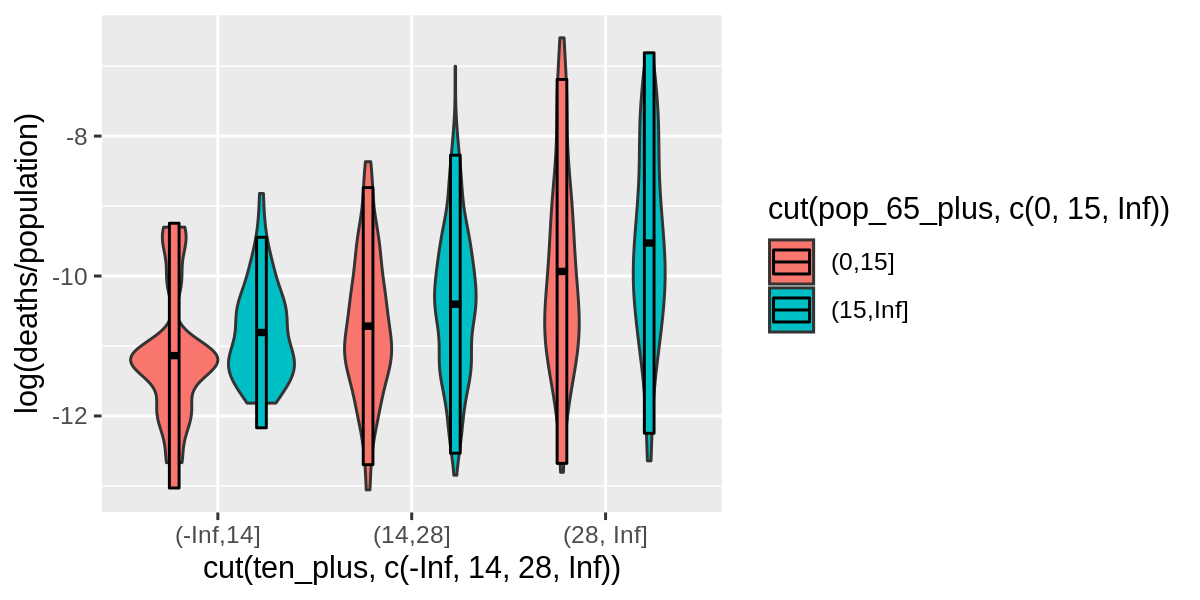

In [79]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 14, 28, Inf)), log(deaths/population), fill=cut(pop_65_plus, c(0, 15, Inf)))) +  
geom_violin() +  #stat_summary(fun.y=mean, geom="point", shape=23, size=2, position = position_dodge(0.9))
stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))

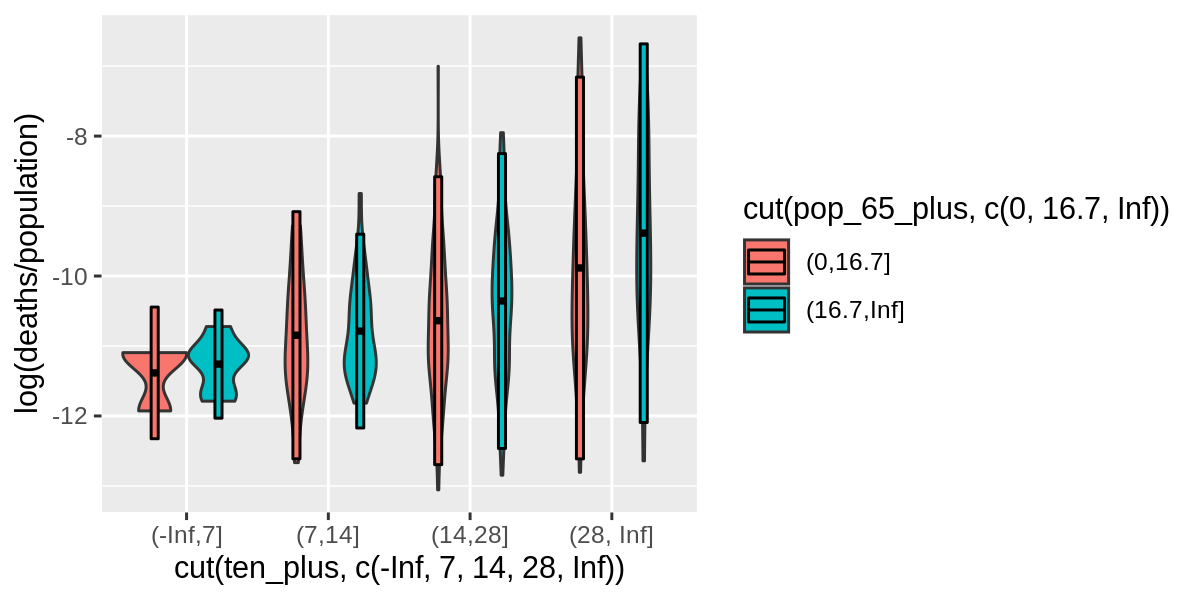

In [80]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 28, Inf)), log(deaths/population), fill=cut(pop_65_plus, c(0, 16.7, Inf)))) +  
geom_violin() + stat_summary(fun.data="mean_sdl", mult=1, geom="crossbar", width=0.1, position = position_dodge(0.9))

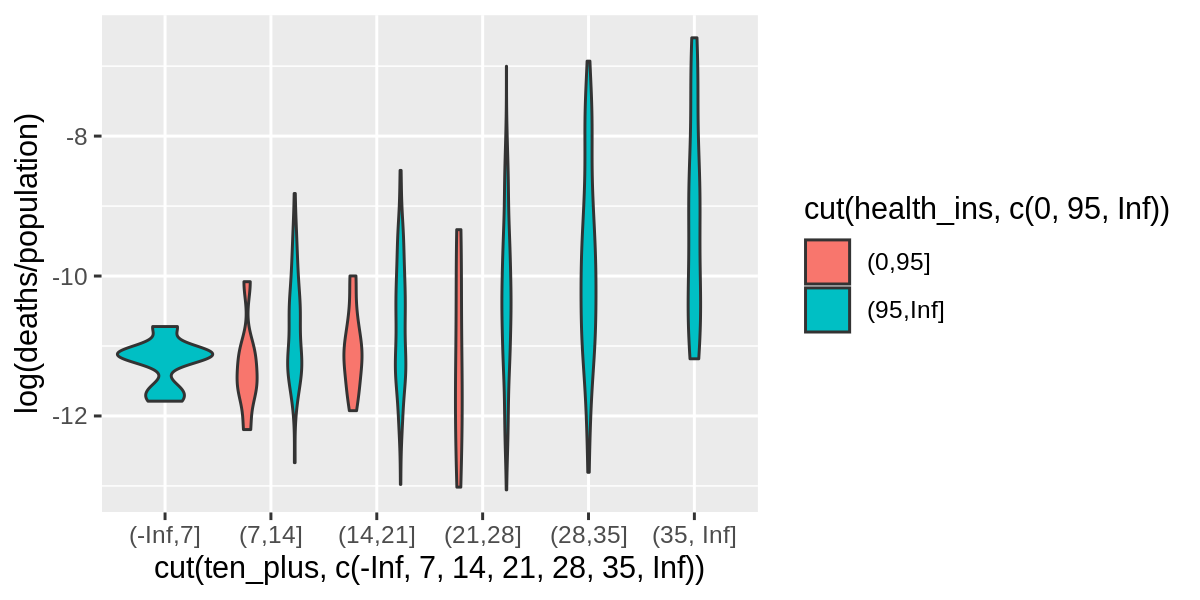

In [81]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf)), log(deaths/population), fill=cut(health_ins, c(0, 95, Inf)))) +  
geom_violin()

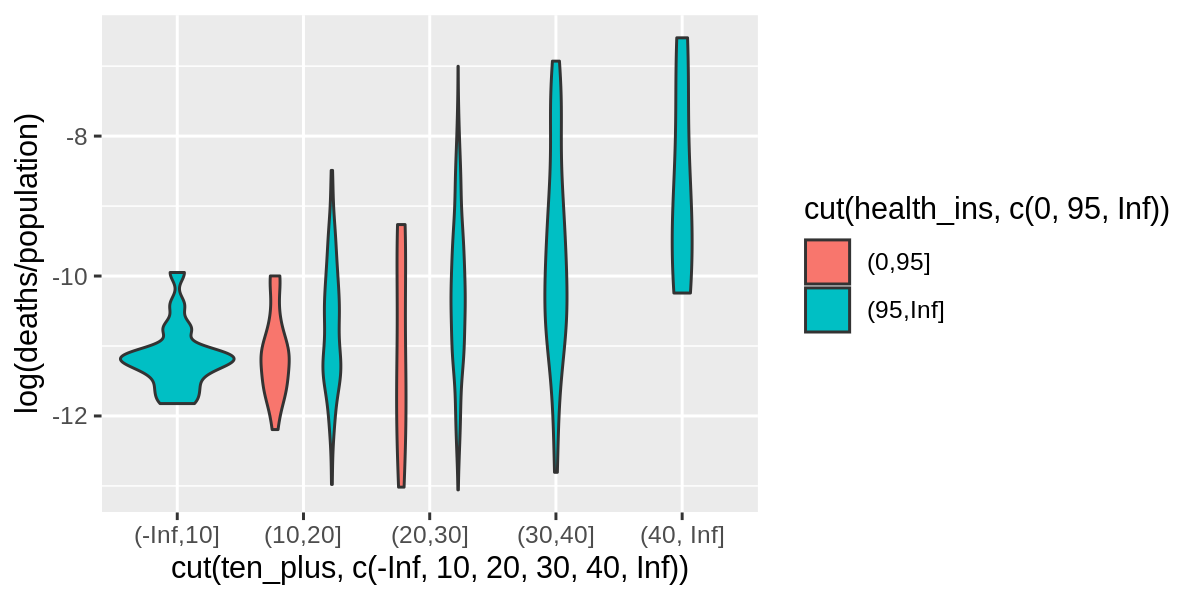

In [82]:
%%R -w 6 -h 3 --units in -r 200

# it does seem like counties with higher ratio of deaths/population -- did these counties see infections earlier, or were they better at detecting infections earlier?
ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf)), log(deaths/population), fill=cut(health_ins, c(0, 95, Inf)))) +  
geom_violin()

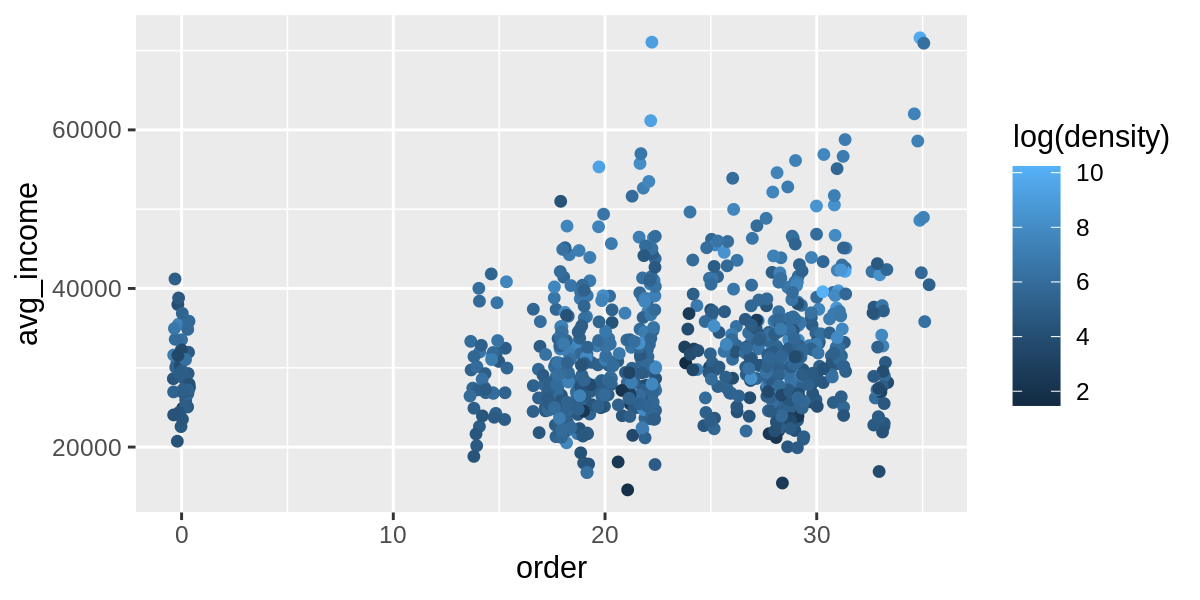

In [83]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, avg_income, color=log(density)))
# those counties without orders tend to have lower avg. income, though counties with a wide variety of 
# avg. income levels (probably due to statewide orders)

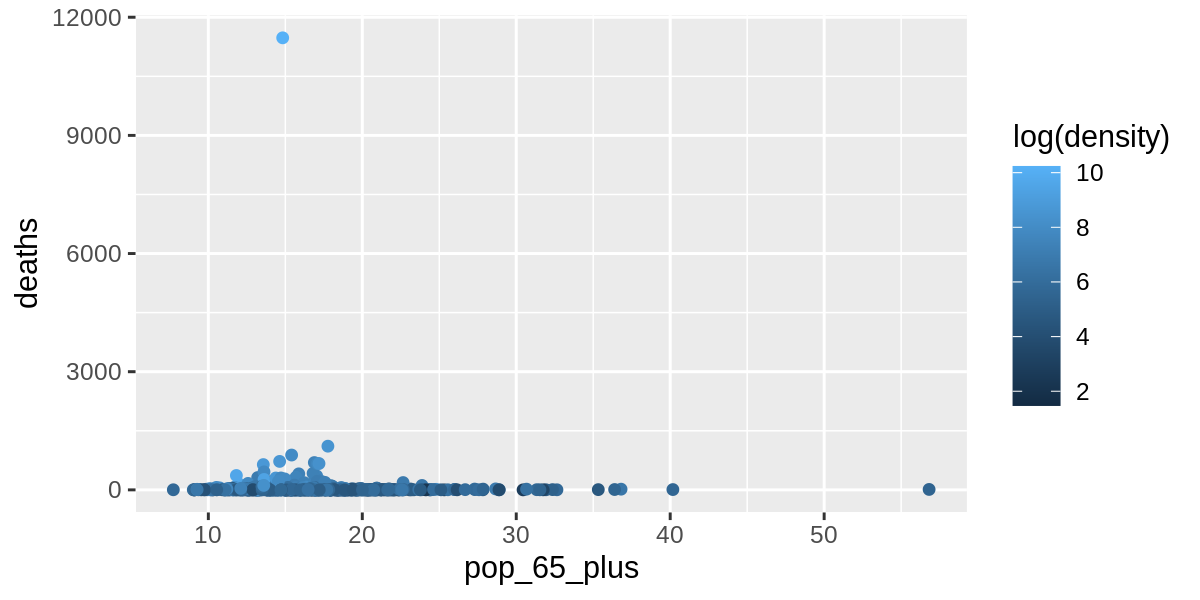

In [84]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(pop_65_plus, deaths, color=log(density)))

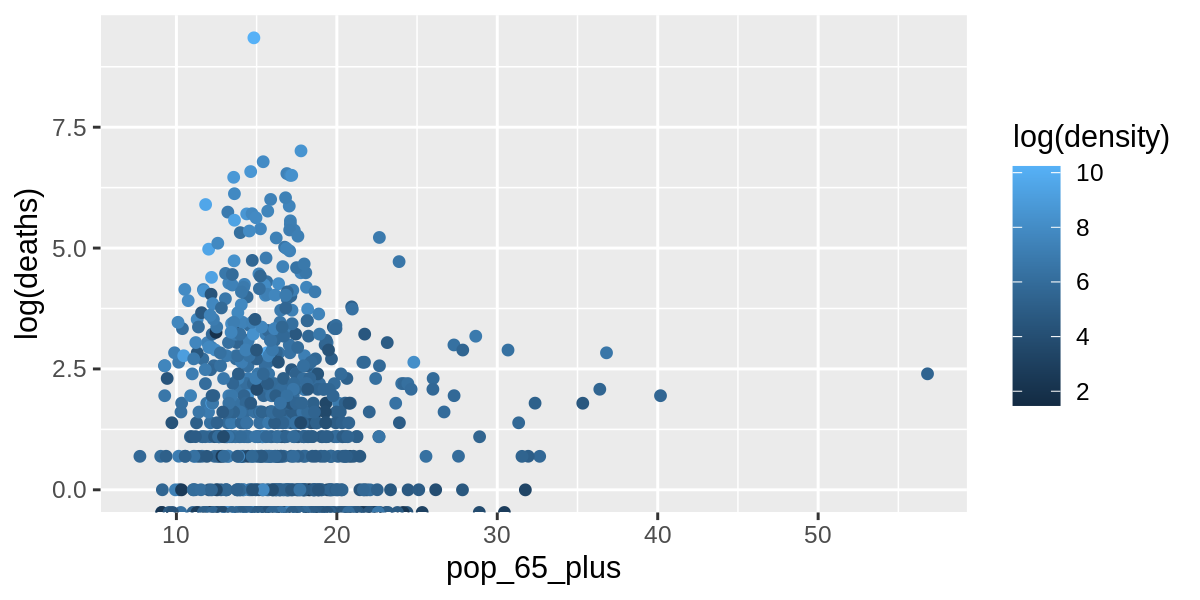

In [85]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(pop_65_plus, log(deaths), color=log(density)))

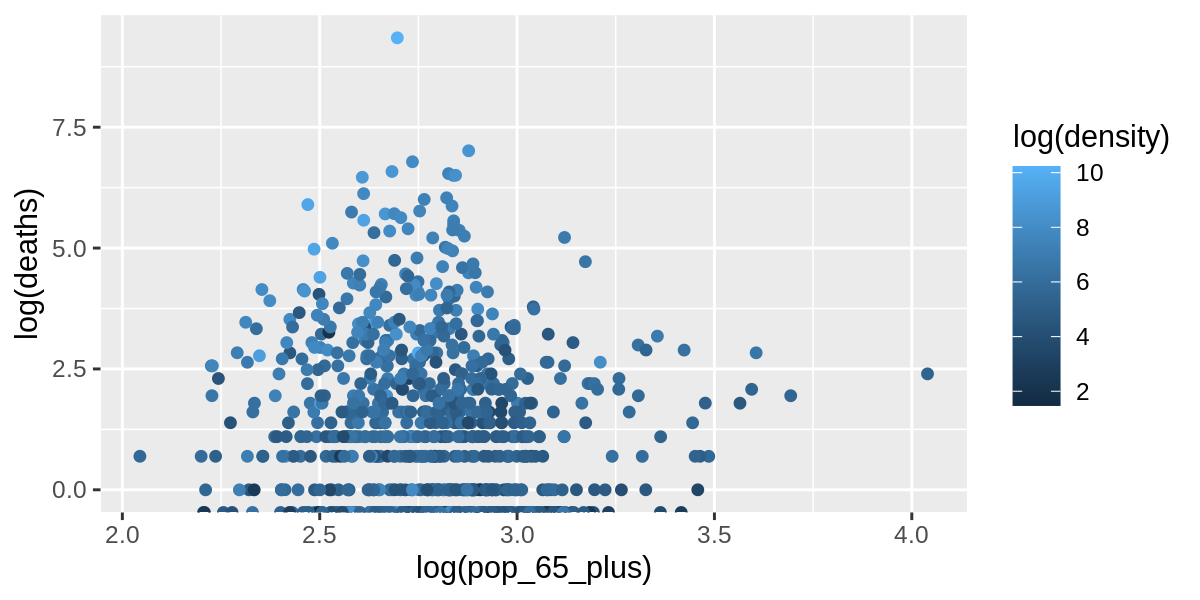

In [86]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(pop_65_plus), log(deaths), color=log(density)))

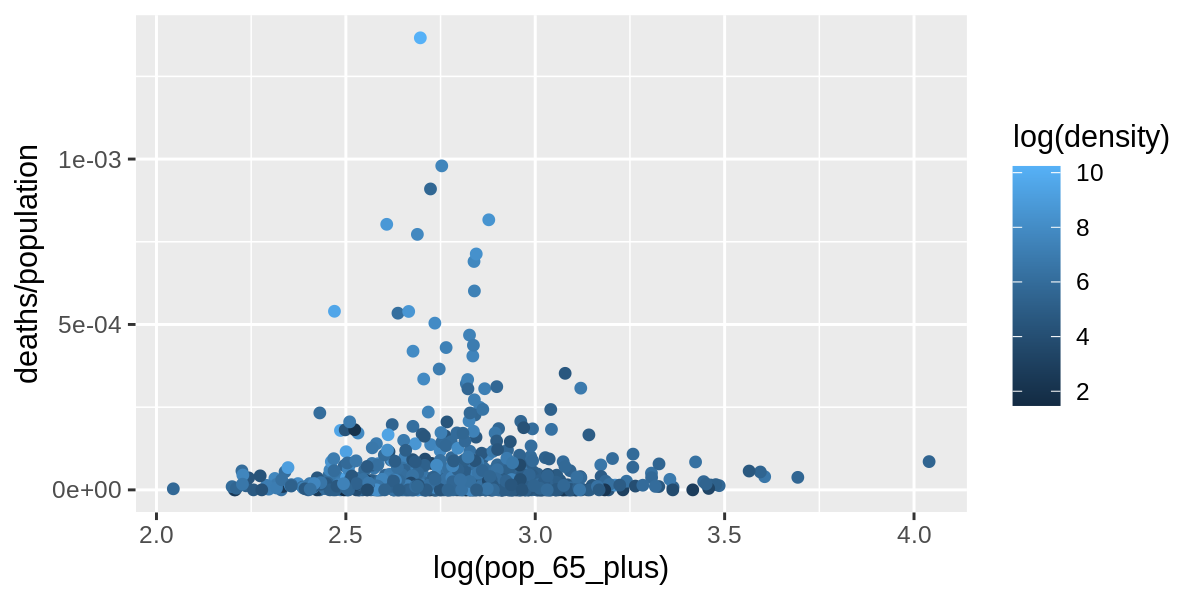

In [87]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(pop_65_plus), deaths/population, color=log(density)))

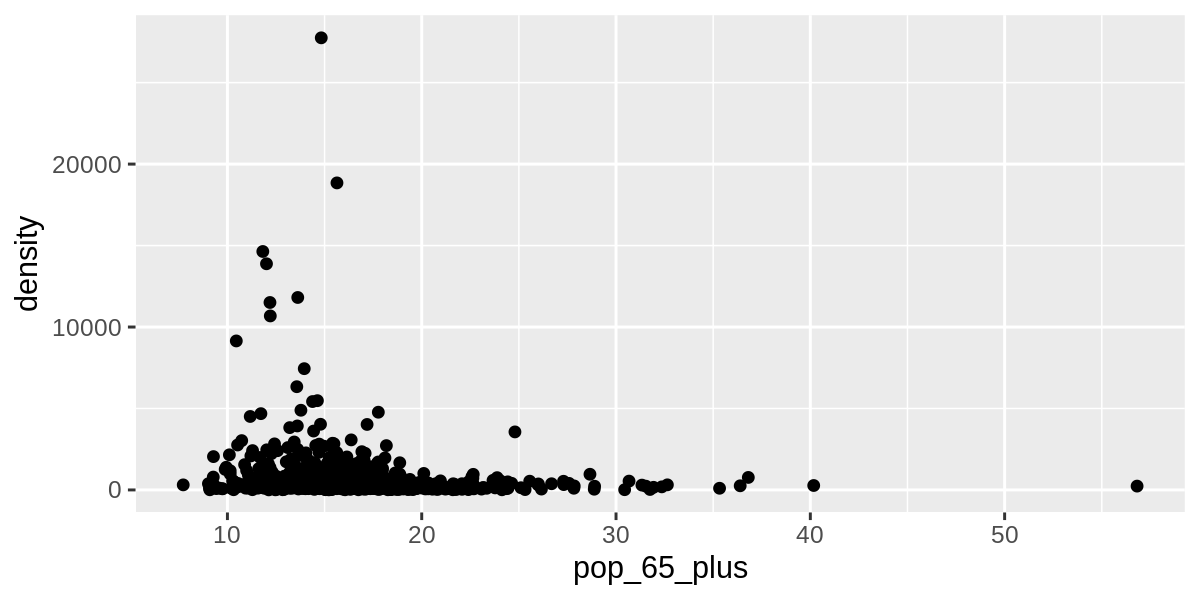

In [88]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(pop_65_plus, density))

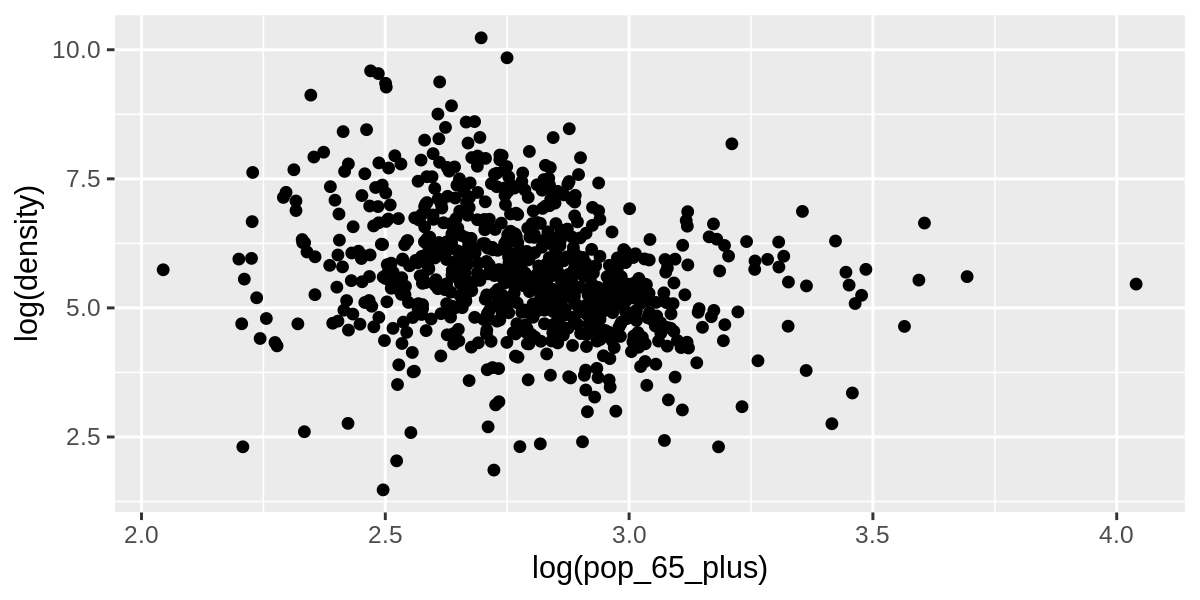

In [89]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(pop_65_plus), log(density)))
# no clear correlation b/n county density and % of population that is 65+ 

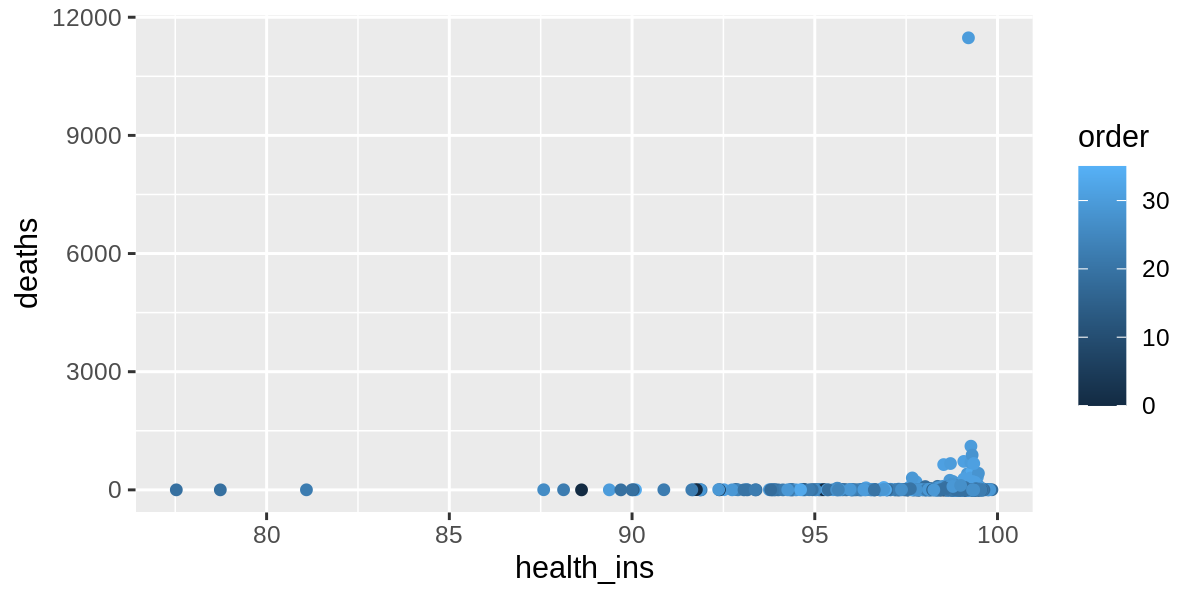

In [90]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(health_ins, deaths, color=order))

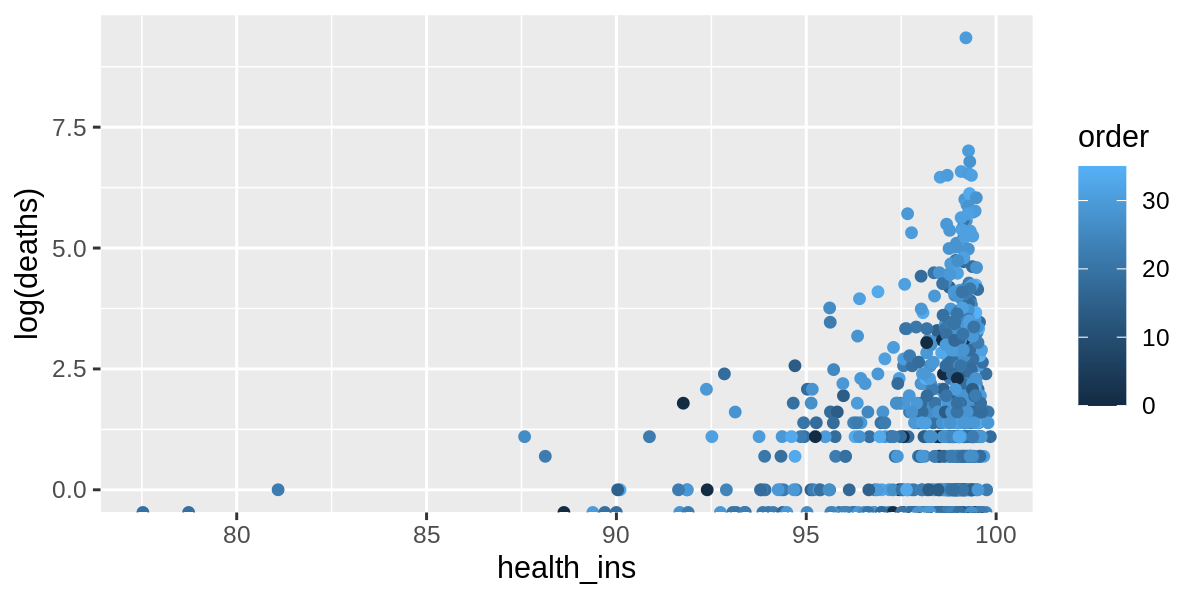

In [91]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(health_ins, log(deaths), color=order))

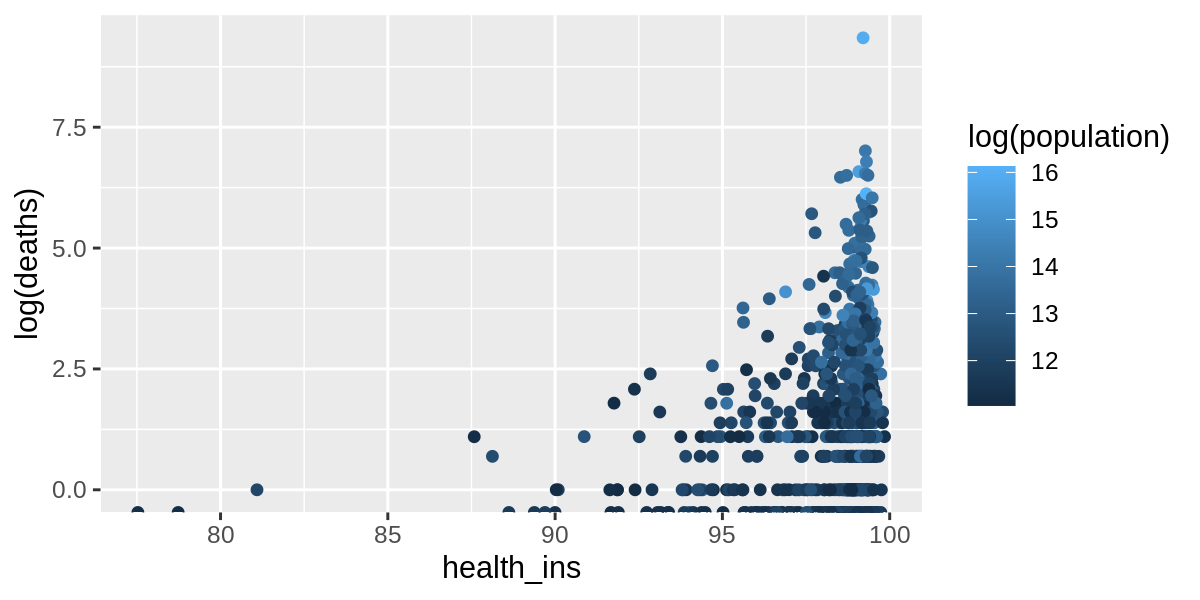

In [92]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(health_ins, log(deaths), color=log(population)))

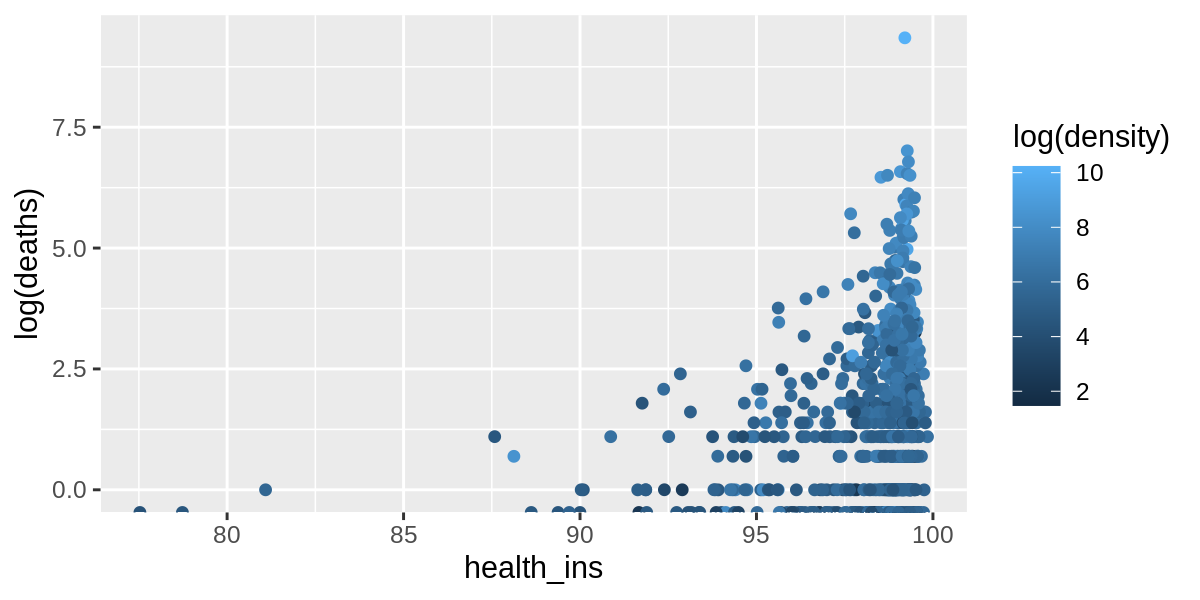

In [93]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(health_ins, log(deaths), color=log(density)))
# looks - is it that more covid19 deaths are tested when insured numbers are higher?  those with more
# insurance are probably healthier, no?

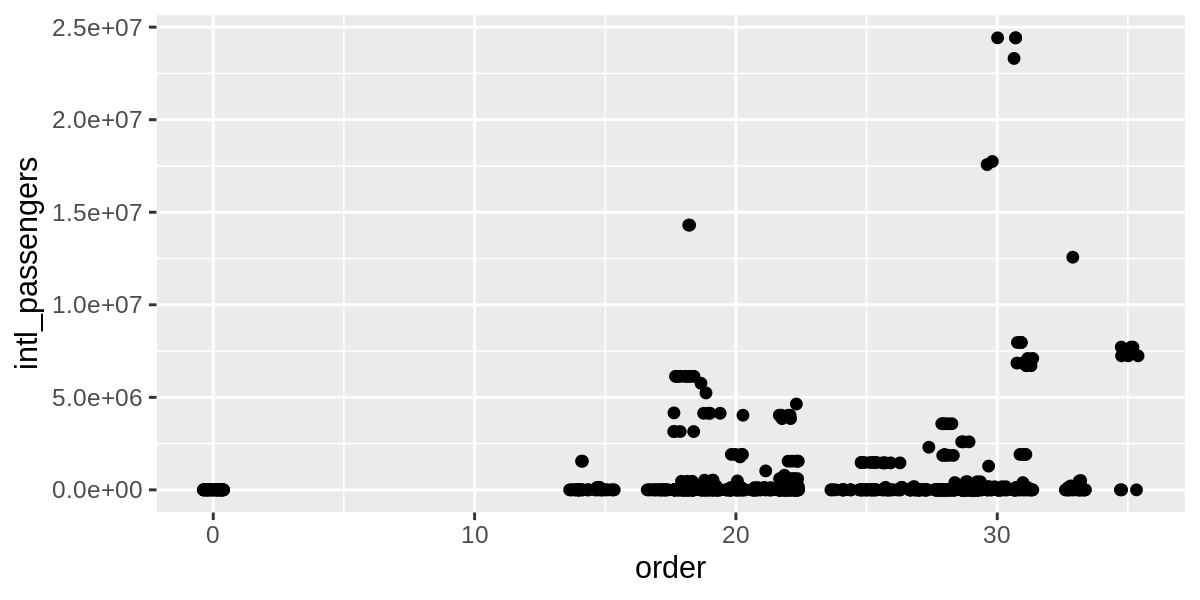

In [94]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes( order, intl_passengers)) 
# generally more international passengers had earlier orders? (sort of??)

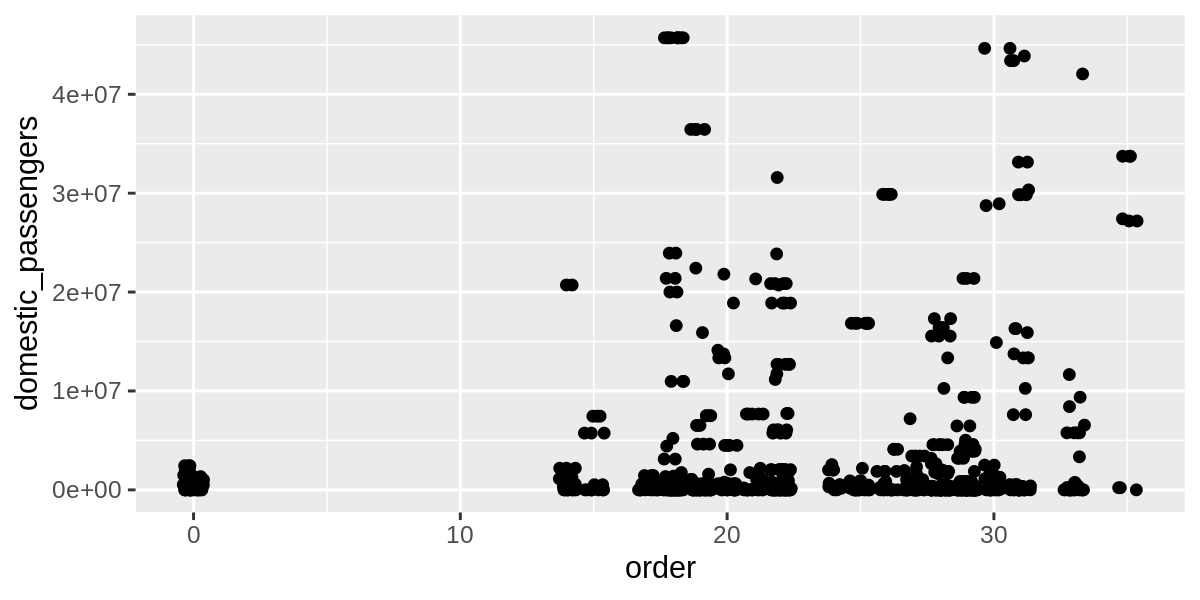

In [95]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes( order, domestic_passengers))
# kindof all over the place

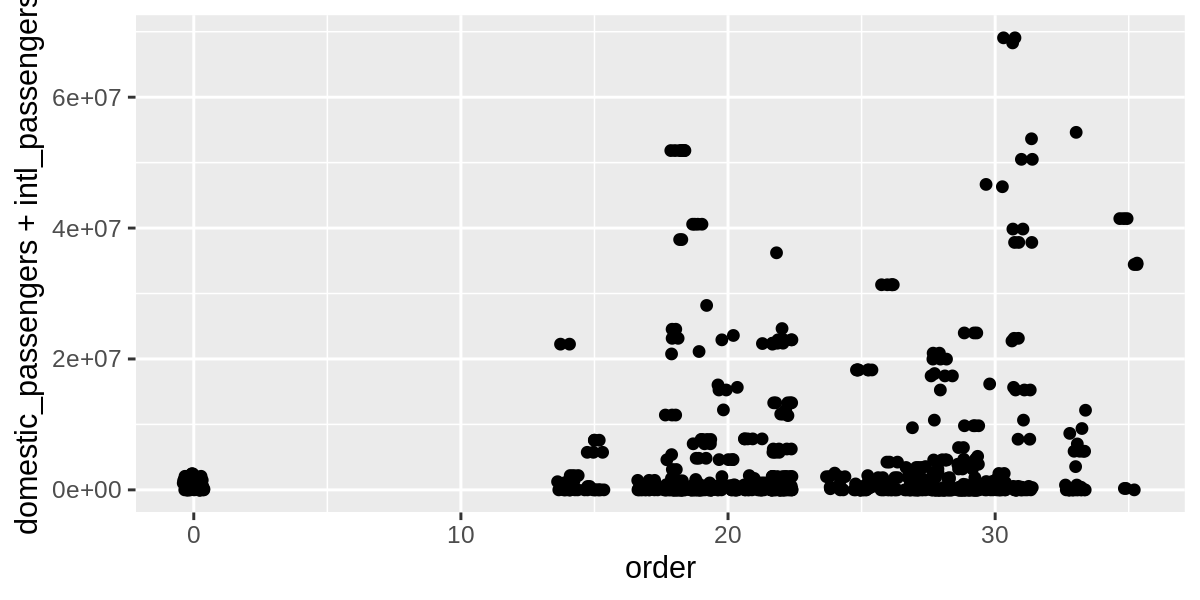

In [96]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes( order, domestic_passengers + intl_passengers))
# kindof all over the place

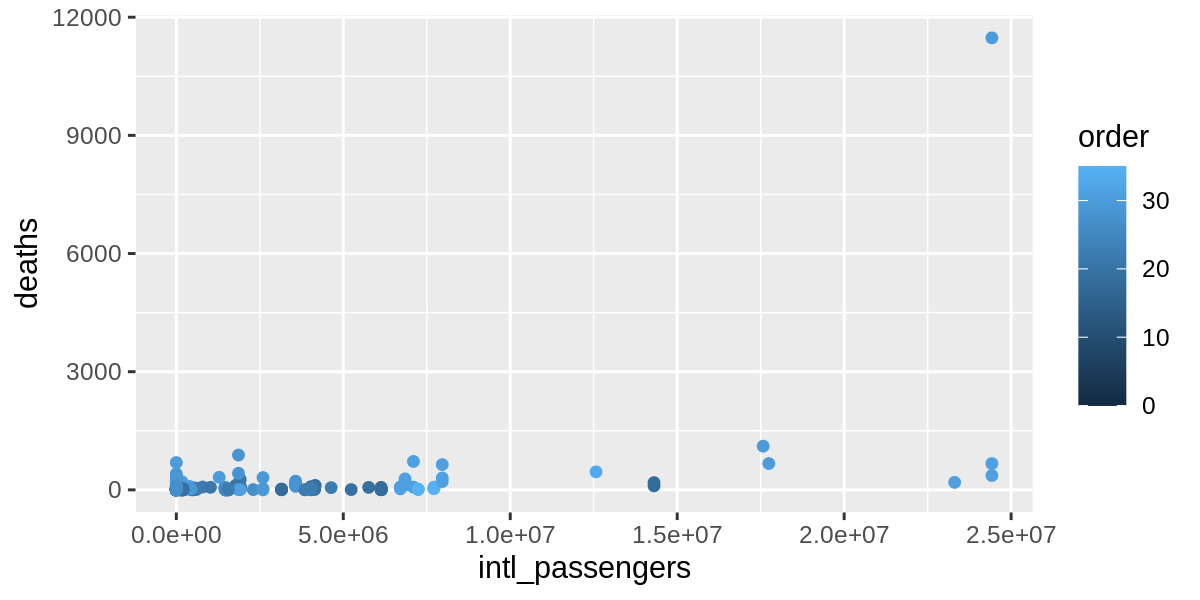

In [97]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(intl_passengers, deaths, color=order))

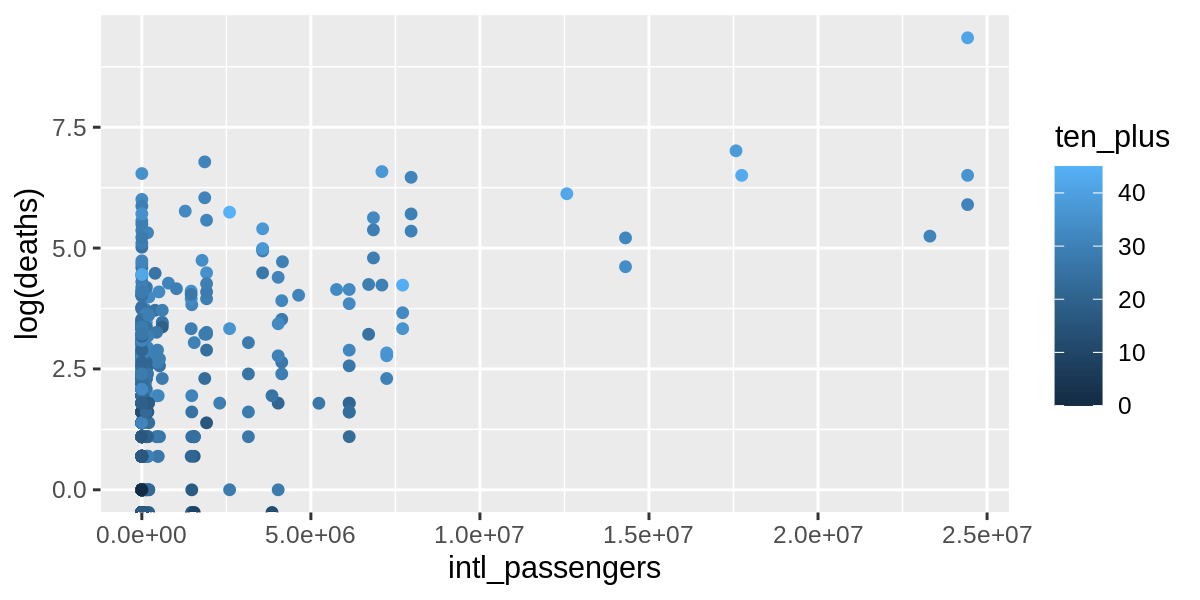

In [98]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(intl_passengers, log(deaths), color=ten_plus))

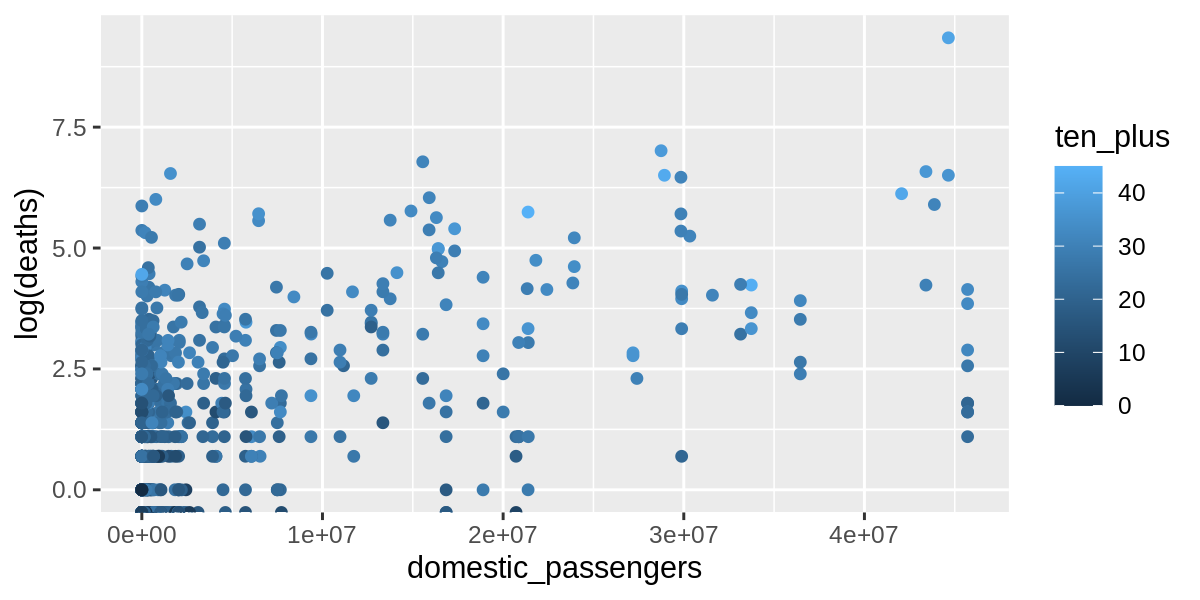

In [99]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(domestic_passengers, log(deaths), color=ten_plus))

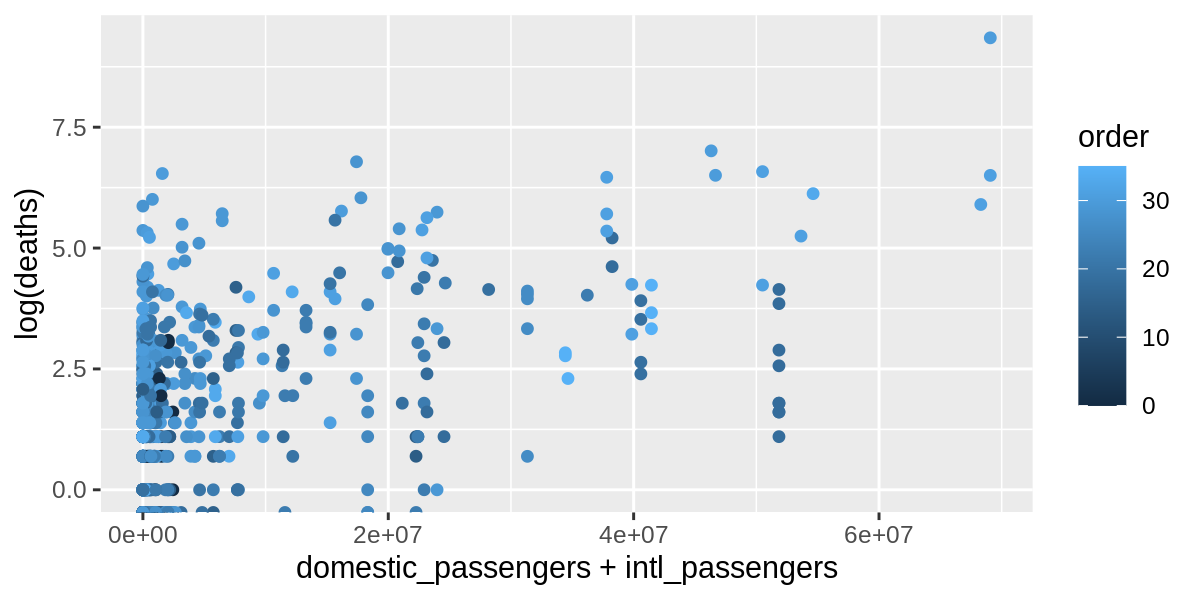

In [100]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(domestic_passengers+intl_passengers, log(deaths), color=order))

In [101]:
abbrev["death_prc"] = abbrev["deaths"]/abbrev["population"]

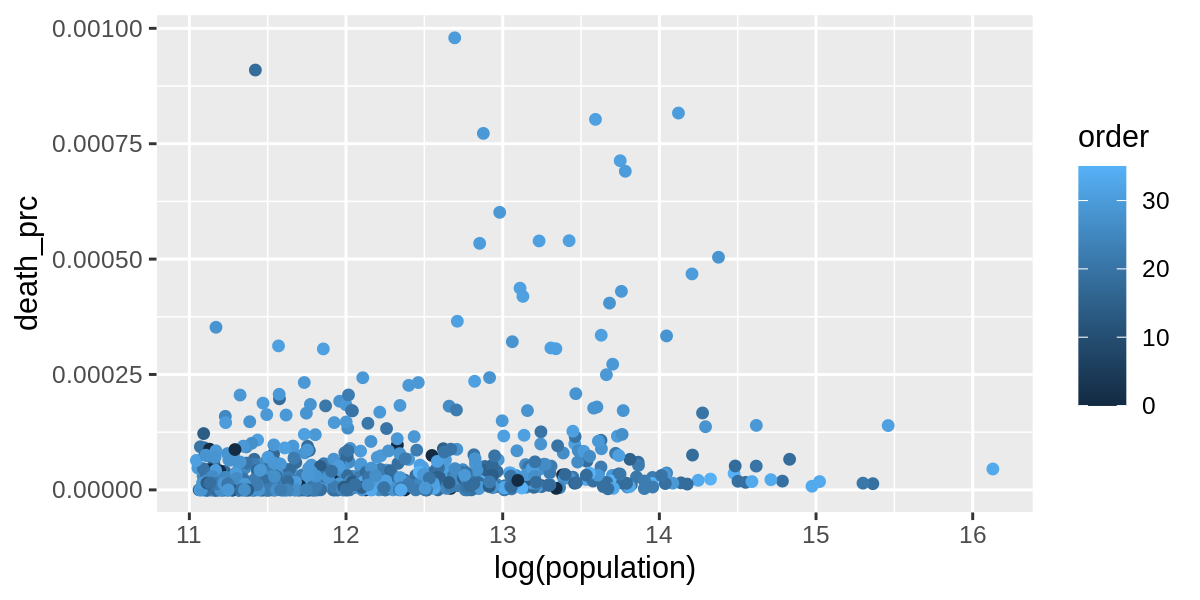

In [102]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(population), death_prc, color=order))

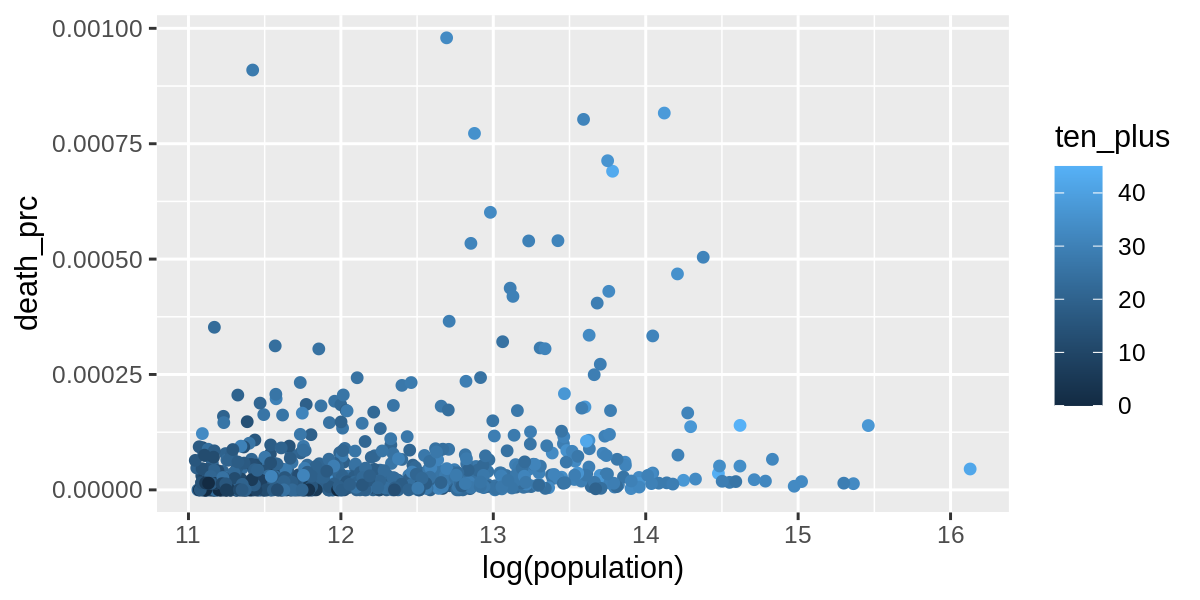

In [103]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(population), death_prc, color=ten_plus))

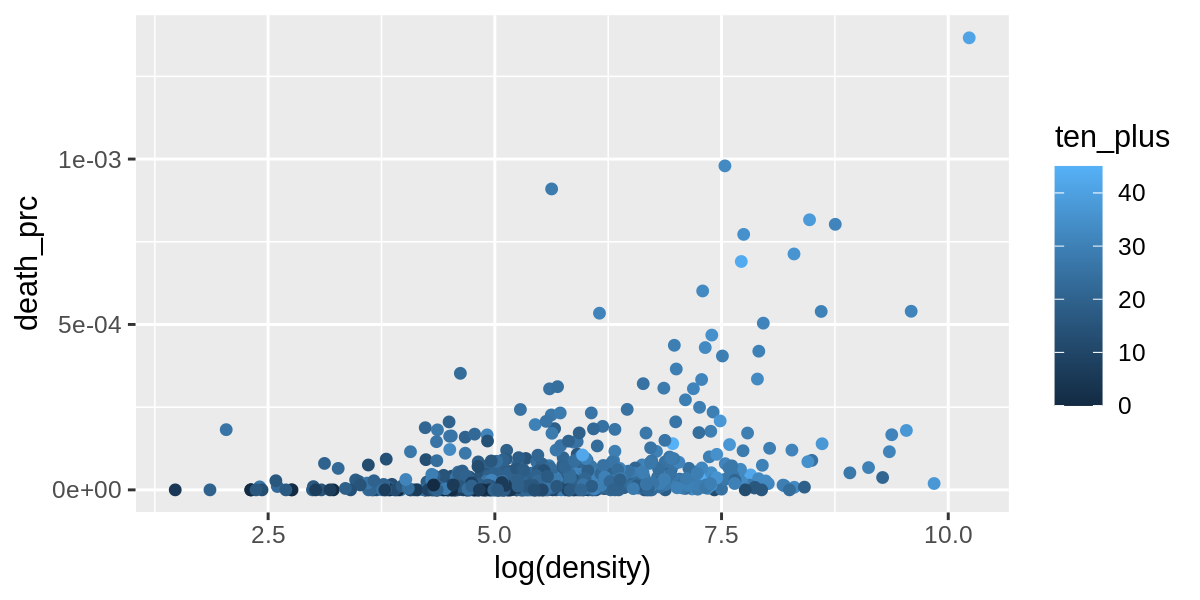

In [104]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(density), death_prc, color=ten_plus))

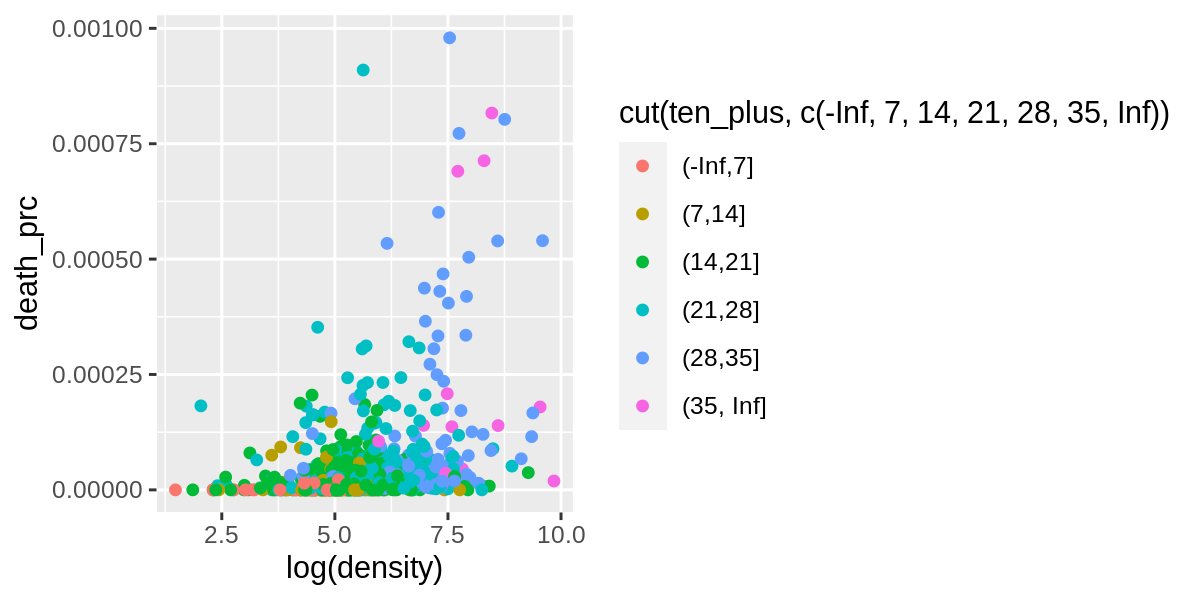

In [105]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(density), death_prc, 
                                                               color=cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf))))

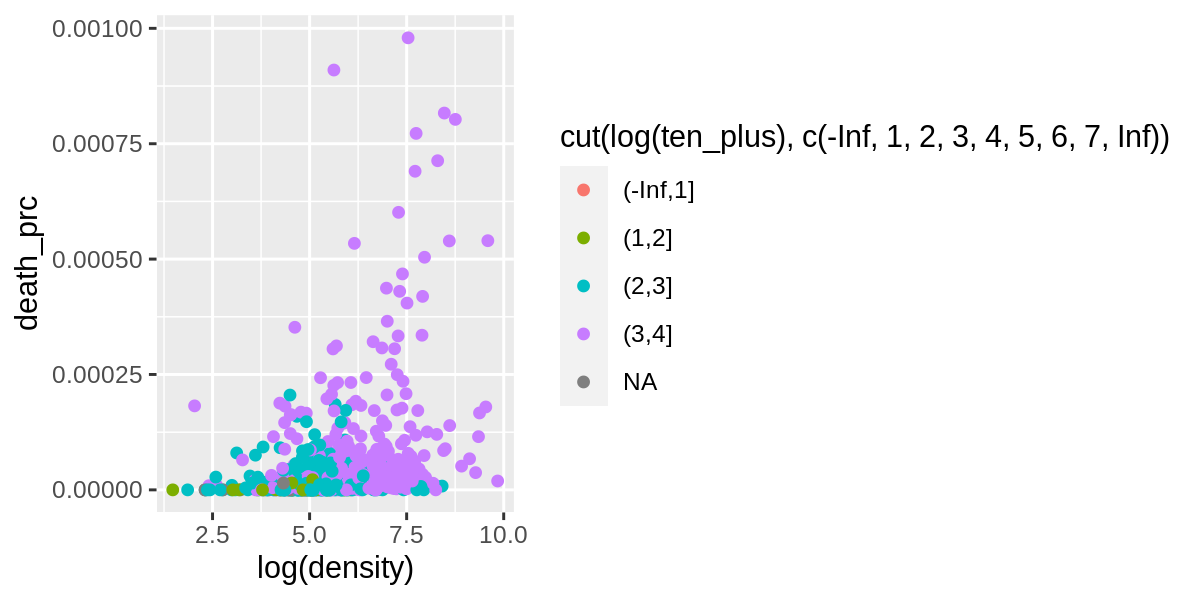

In [106]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(density), death_prc, 
                                                               color=cut(log(ten_plus), c(-Inf, 1, 2, 3, 4, 5, 6, 7, Inf))))

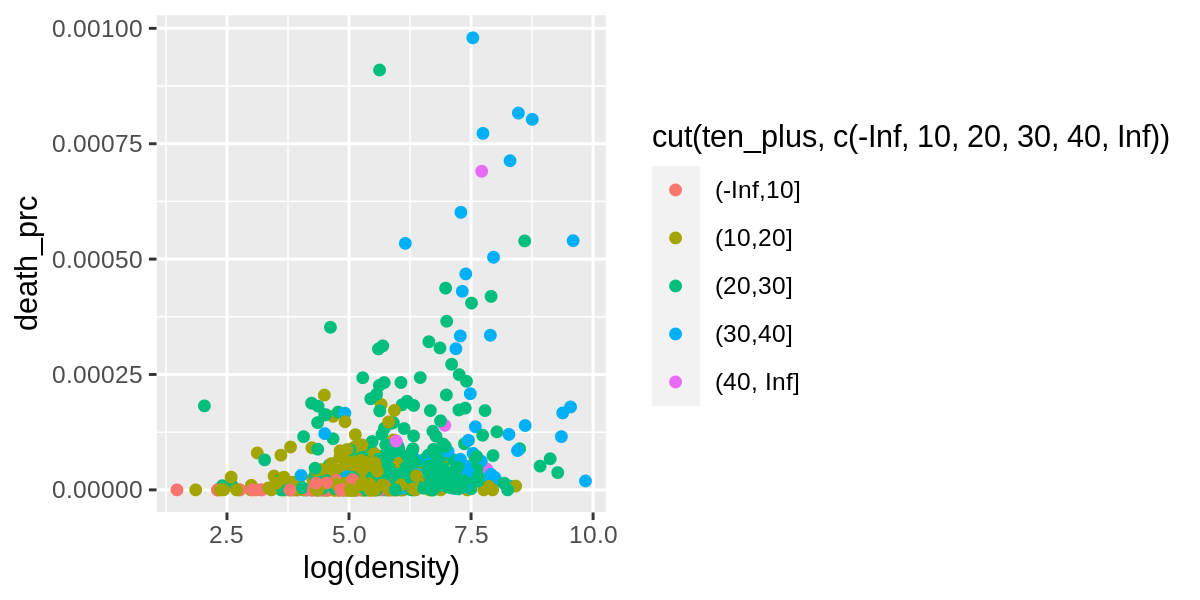

In [107]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(density), death_prc, 
                                                               color=cut(ten_plus, c(-Inf, 10, 20, 30, 40, Inf))))

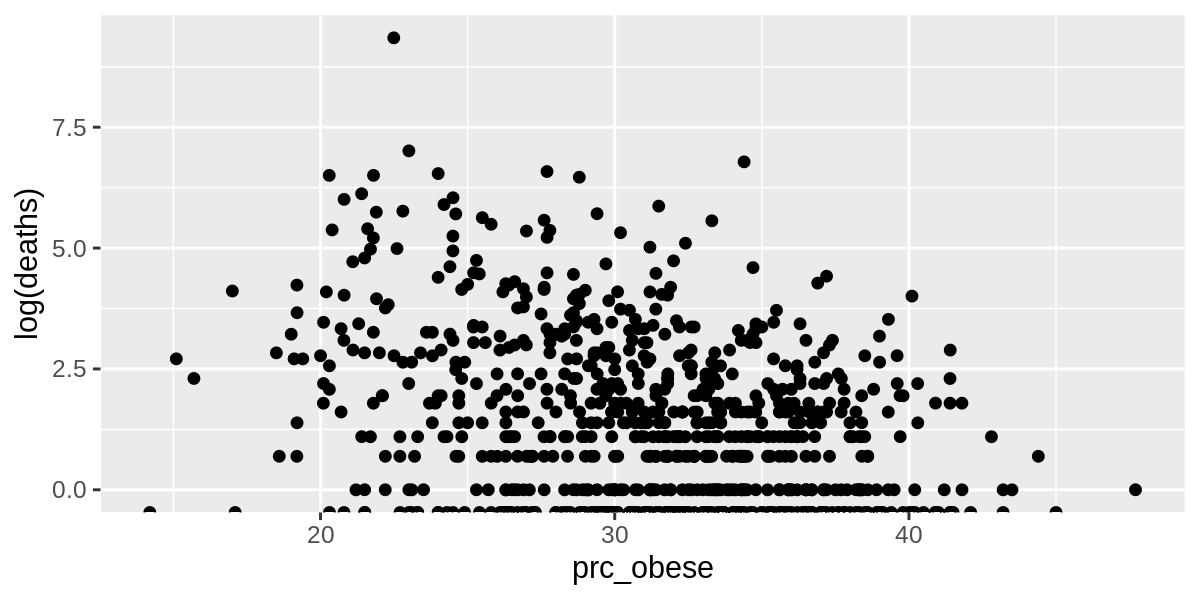

In [108]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(prc_obese, log(deaths))) + geom_jitter()

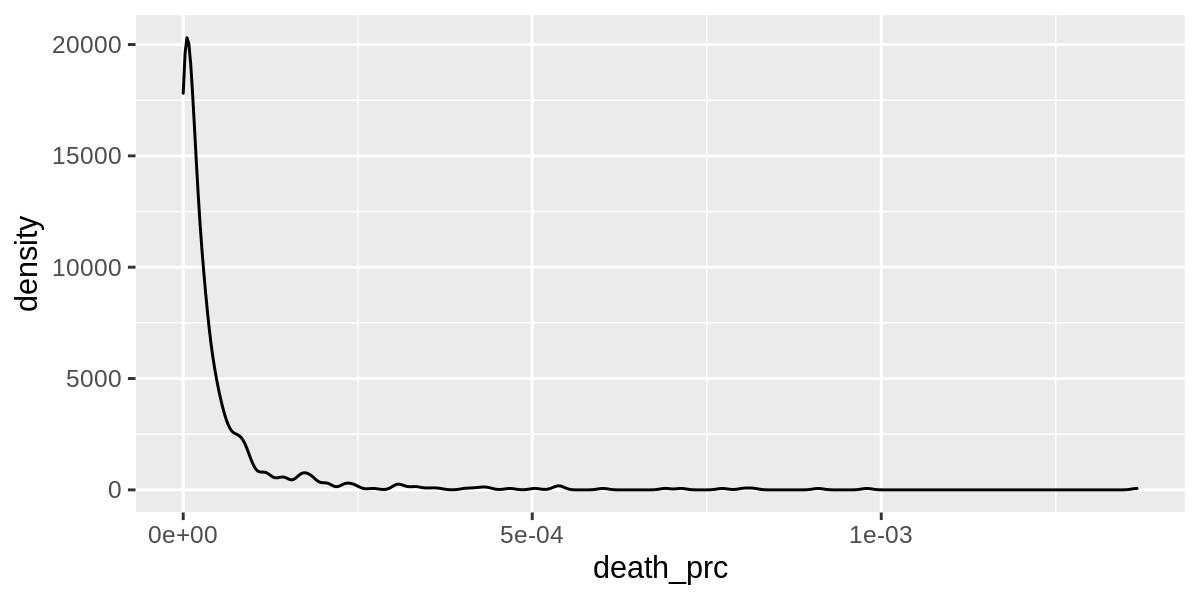

In [109]:
%%R -w 6 -h 3 --units in -r 200

# look at distribution of deaths as % of population?  
# any difference when the number of deaths (and assumption being # of infections) is lower in the population?
ggplot(abbrev, aes(death_prc)) + geom_density()

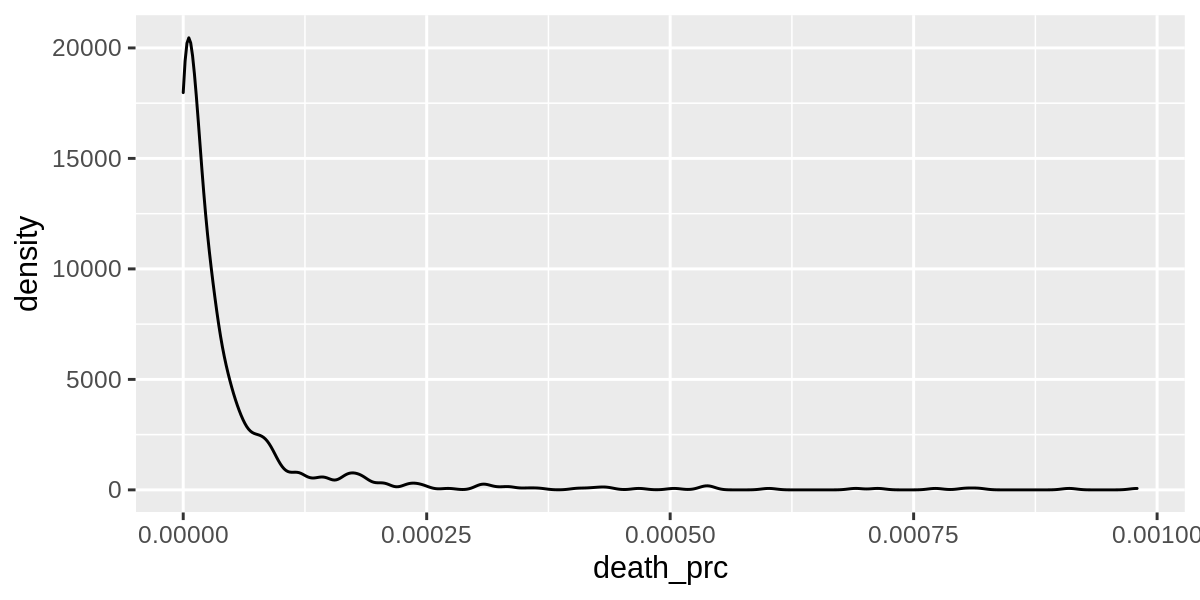

In [110]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$death_prc <0.001),], aes(death_prc)) + geom_density()
# vast majority of counties have a very low rate of covid19 deaths as percentage of their population

In [111]:
abbrev[(abbrev["ten_plus"] < 20) & (np.log(abbrev["density"]) > 8)]

household_size  empl_agriculture  empl_professional  empl_social  \
428             2.4               0.1               10.5         23.9   

     empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
428           12.9                 6.4         12.6             13.7   

     avg_income  prc_public_transp  ...  domestic_passengers  intl_passengers  \
428     30127.0                3.3  ...              2036000                0   

     deaths cases_march1 cases_march15  cases_april1  ten_plus  order  \
428       2            0             0            33        19     22   

     density  death_prc  
428   4509.9    8.2e-06  

[1 rows x 27 columns]

In [112]:
abbrev[(abbrev["death_prc"] < 0.001) & (np.log(abbrev["density"]) > 8)]
# all of these have an airport within 20 miles getting at least domestic passengers (most also intl.)
# 

household_size  empl_agriculture  empl_professional  empl_social  \
37              2.4           8.1e-02               16.8         30.6   
59              2.5           1.1e-01               16.8         18.2   
91              2.8           7.2e-01               14.5         17.2   
154             2.4           3.2e-01               12.7         30.7   
165             2.0           3.2e-01               13.1         29.4   
169             2.7           3.2e-01               14.5         25.0   
215             2.2           2.9e-02               23.4         16.7   
237             3.0           6.5e-01               14.7         19.2   
273             2.6           5.0e-01               11.1         28.2   
286             3.0           9.5e-02               13.8         28.8   
338             2.4           1.1e-01               25.2         18.0   
342             2.3           1.0e+00               18.8         20.3   
346             2.3           3.1e-01               23.9         18.8   
356             2.6           2.1e-01               14.9         23.1   
428             2.4           1.3e-01               10.5         23.9   
511             2.5           1.7e-01               12.3         31.4   
527             2.1           2.9e-01               28.0         14.6   
551             2.4           2.2e-01               14.6         21.3   
582             2.9           9.9e-02               13.2         23.2   
605             2.6           2.3e-01               12.6         29.7   
715             2.4           1.9e-01               15.3         24.6   
770             2.7           1.9e-01               13.4         25.8   
819             2.4           3.2e-01               10.7         26.3   

     empl_services  empl_manufacturing  empl_retail  prc_fam_poverty  \
37            10.3                 4.9          8.7             11.8   
59             9.5                 6.3         10.4             11.6   
91             9.4                 8.4         10.6             10.8   
154            9.2                 4.5          8.8             13.9   
165           12.3                 8.2          7.9             17.0   
169            7.6                 7.0          9.1             12.2   
215            9.6                 3.3          6.2              9.9   
237           11.1                11.6         10.5              7.3   
273            9.5                11.7          9.8              9.8   
286            7.3                 4.1          9.0              4.1   
338           10.6                 5.3          9.3              5.1   
342            9.7                 5.2          9.4              8.1   
346            9.7                 1.3          4.4             11.3   
356            9.5                 9.5          9.5             10.2   
428           12.9                 6.4         12.6             13.7   
511            9.3                 6.5          9.2             19.2   
527            6.7                 2.9          4.6              4.0   
551           11.1                 7.1         12.8              8.0   
582            6.3                 8.1         11.0              5.3   
605            8.3                 7.3         10.2              5.9   
715           10.9                 6.7         10.8             14.6   
770            6.5                 7.8         10.7              5.7   
819            9.1                14.8         11.2             14.1   

     avg_income  prc_public_transp  ...  domestic_passengers  intl_passengers  \
37      41657.0               31.4  ...             16407000          3572800   
59      42150.0               43.9  ...             43872000         24424000   
91      32467.0                2.5  ...             36450000          4138700   
154     31433.0               16.2  ...             12695000           604300   
165     31537.0               10.1  ...              7451000           136100   
169     39708.0               21.0  .

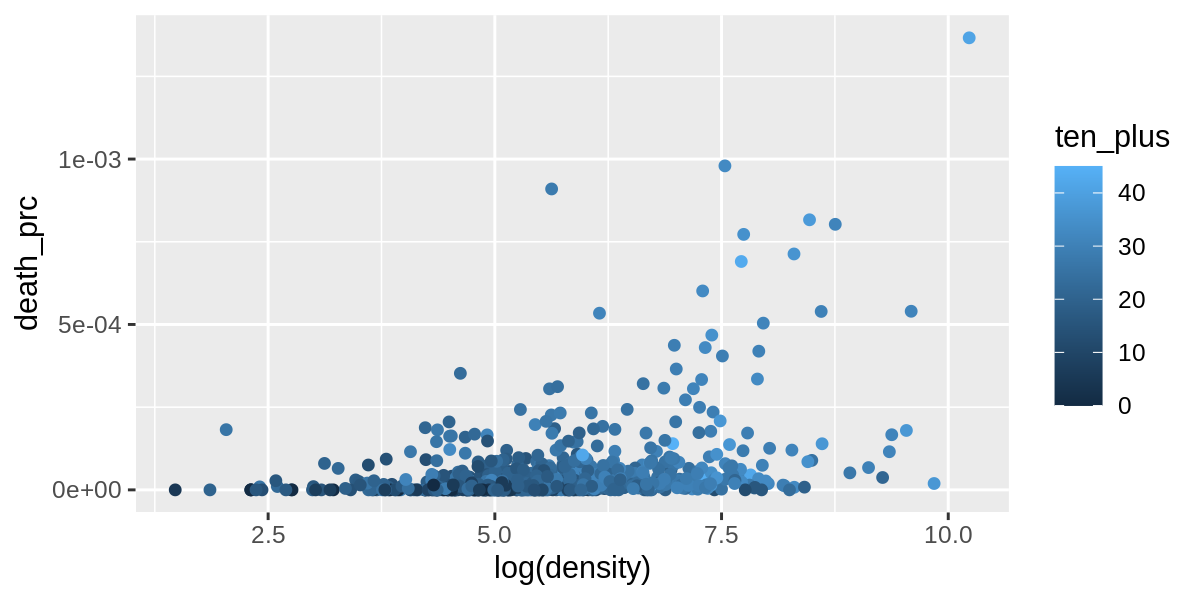

In [113]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(density), death_prc, color=ten_plus))

In [114]:
abbrev.to_csv("data/abbrev.csv")